In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as ss
import pickle
import sys
sys.path.append('synthetic_data/')
import extended_model as em
from itertools import combinations

# Graphical Abstract

In [2]:
# load data
error_sigma   = .2
n_metabolites = 60
path          = 'v3'
base          = 'synthetic_data/simulation_results'
with open(f'{base}/{path}_e_{error_sigma}_n_{n_metabolites}.pkl','rb') as file:
    results_time,results_sv,results_model,raw_values = pickle.load(file)
    
methods = ['PQN','PKM_full','PKM_mini','MIX_full','MIX_mini']
c_true  = np.array(raw_values['C'])
v_true  = np.array(results_sv['TRUE'])
m_tilde = np.array(raw_values['M'])

In [3]:
measures = {}
for method in methods:
    print(method)
    tmp_v = np.array(results_sv[method])
    rel_ = []
    abs_ = []
    for bla_true,bla_pred in zip(v_true,tmp_v):
        bla_true_rel = bla_true/bla_true[0]
        bla_pred_rel = bla_pred/bla_pred[0]
        rel_.append((bla_true_rel-bla_pred_rel))
        abs_.append((bla_true-bla_pred))
    measures[method] = [rel_,abs_]

PQN
PKM_full
PKM_mini
MIX_full
MIX_mini


In [4]:
def circle(r):
    x = np.linspace(-r,r,1000)
    return np.concatenate([x,-x]),np.concatenate([np.sqrt(r**2-x**2),-np.sqrt(r**2-x**2)])

def plot_target(center):
    tmpx, tmpy = circle(.5)
    plt.plot(tmpx+center[0],tmpy+center[1],'--',zorder=0,alpha=1,color='grey')
    tmpx, tmpy = circle(.25)
    plt.plot(tmpx+center[0],tmpy+center[1],'--',zorder=0,alpha=1,color='grey')
    plt.plot([center[0],center[0]],[center[1]-.5,center[1]+.5],color='grey',zorder=0)
    plt.plot([center[0]-.5,center[0]+.5],[center[1],center[1]],color='grey',zorder=0)

15.0 3.391191546527657
<class 'numpy.float64'> <class 'numpy.float64'>


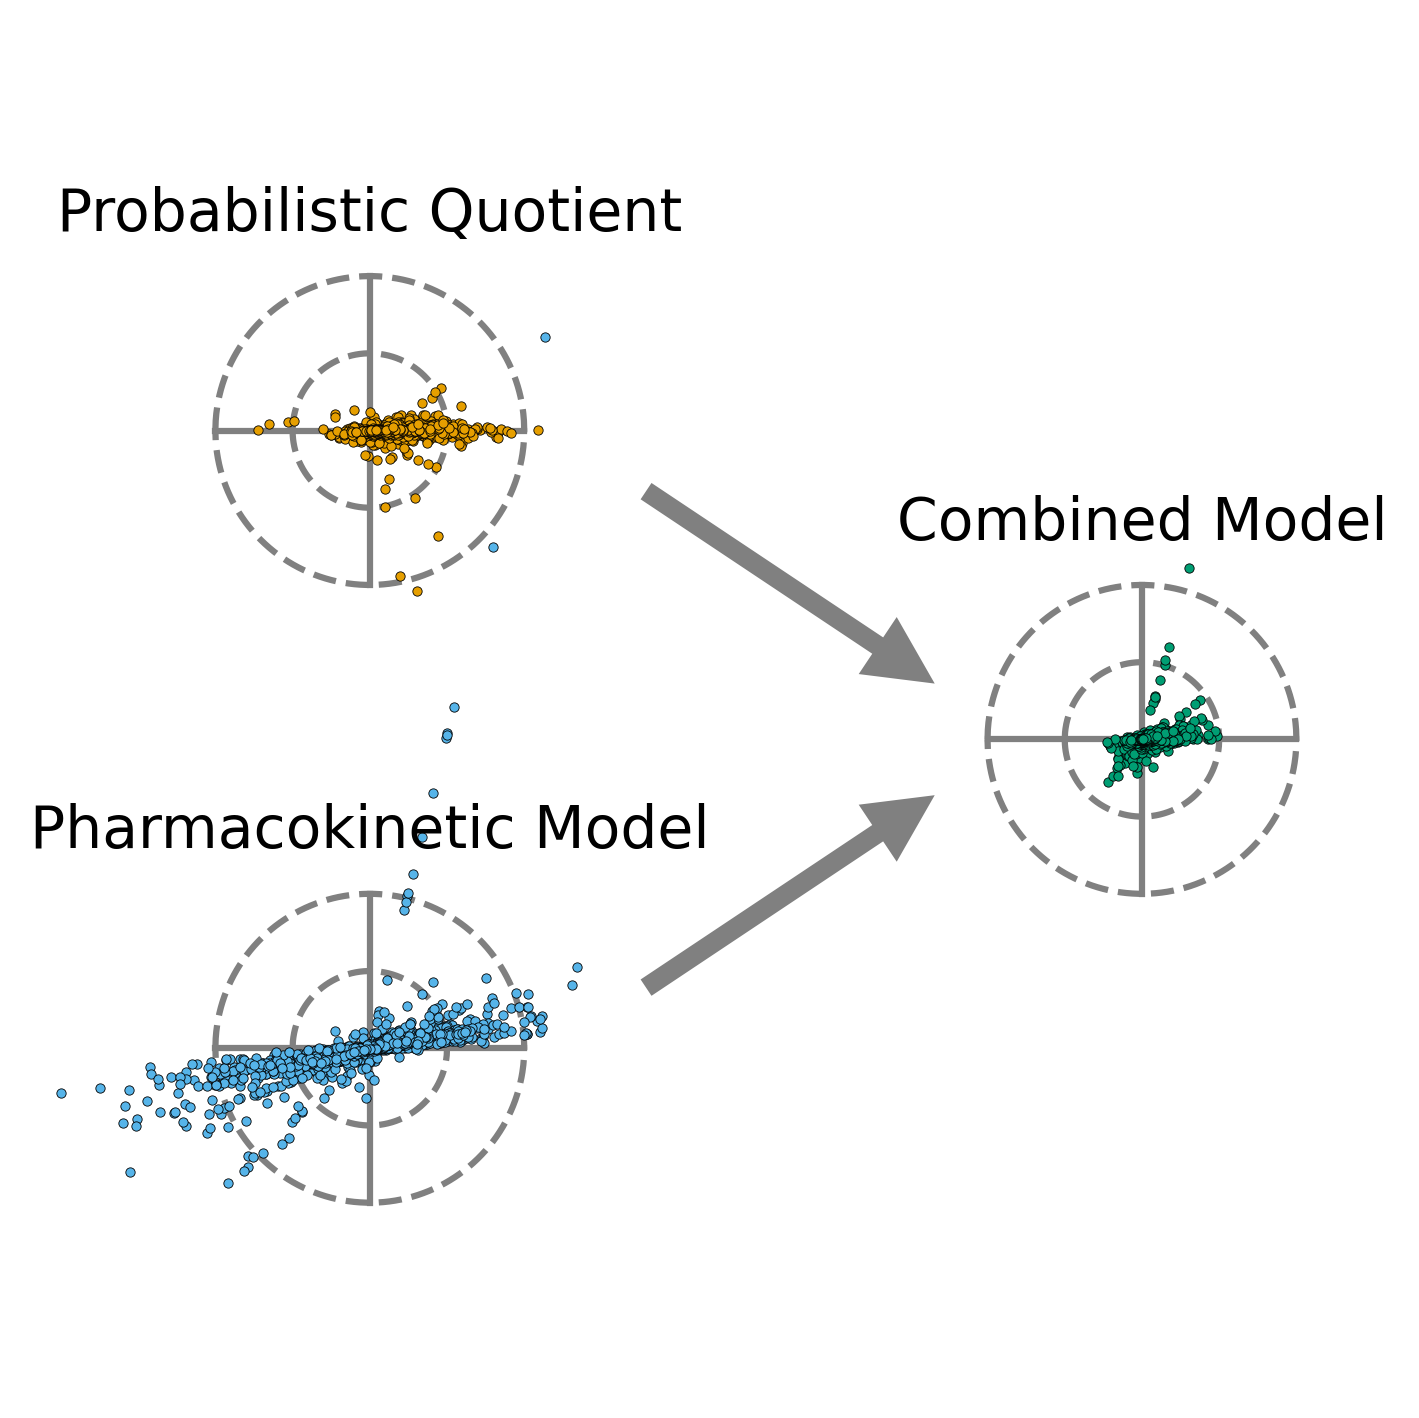

In [5]:
colors  = ['#E69F00','#56B4E9','#009E73','#009E73']
tmp_x, tmp_y = measures['PKM_mini']
x_max = np.max(np.abs(tmp_x))
y_max = np.max(np.abs(tmp_y))
x_max = x_max/x_max*15
print(x_max,y_max)
print(type(x_max),type(y_max))
offset = .1

plt.figure(dpi=300,figsize=(6,6))
plt.subplot(111,box_aspect=1)

# pqn
center = (-1,1)
tmp_x, tmp_y = measures['PQN']
tmp_x = tmp_x/x_max
tmp_y = tmp_y/y_max
plt.scatter(np.array(tmp_y)+center[0], np.array(tmp_x)+center[1],color=colors[0],marker='.',s=20,edgecolor='k',linewidth=.2)
plot_target(center)

# em_mini
center = (-1,-1)
tmp_x, tmp_y = measures['PKM_mini']
tmp_x = tmp_x/x_max
tmp_y = tmp_y/y_max
plt.scatter(np.array(tmp_y)+center[0], np.array(tmp_x)+center[1],color=colors[1],marker='.',s=20,edgecolor='k',linewidth=.2)
plot_target(center)


# mix_mini
center = (1.5,0)
tmp_x, tmp_y = measures['MIX_mini']
tmp_x = tmp_x/x_max
tmp_y = tmp_y/y_max
plt.scatter(np.array(tmp_y)+center[0], np.array(tmp_x)+center[1],color=colors[2],marker='.',s=20,edgecolor='k',linewidth=.2)
plot_target(center)

plt.axis('off')
plt.ylim(-2.1,2.3)
plt.xlim(-2.1,2.3)

plt.arrow(-.1,.8,1.5*.5,-1*.5,head_width=.2,head_length=.2,width=.05,fc='grey',ec='grey')
plt.arrow(-.1,-.8,1.5*.5,1*.5,head_width=.2,head_length=.2,width=.05,fc='grey',ec='grey')

# plt.text(-1,1.7,'PQN',ha='center',size=14)
# plt.text(-1,-.1,'PKM',ha='center',size=14)
# plt.text(1.5,.6,'MIX',ha='center',size=14)

plt.text(-1,1.65,'Probabilistic Quotient',ha='center',size=14)
plt.text(-1,-.35,'Pharmacokinetic Model',ha='center',size=14)
plt.text(1.5,.65,'Combined Model',ha='center',size=14)
plt.show()

# Figure 1

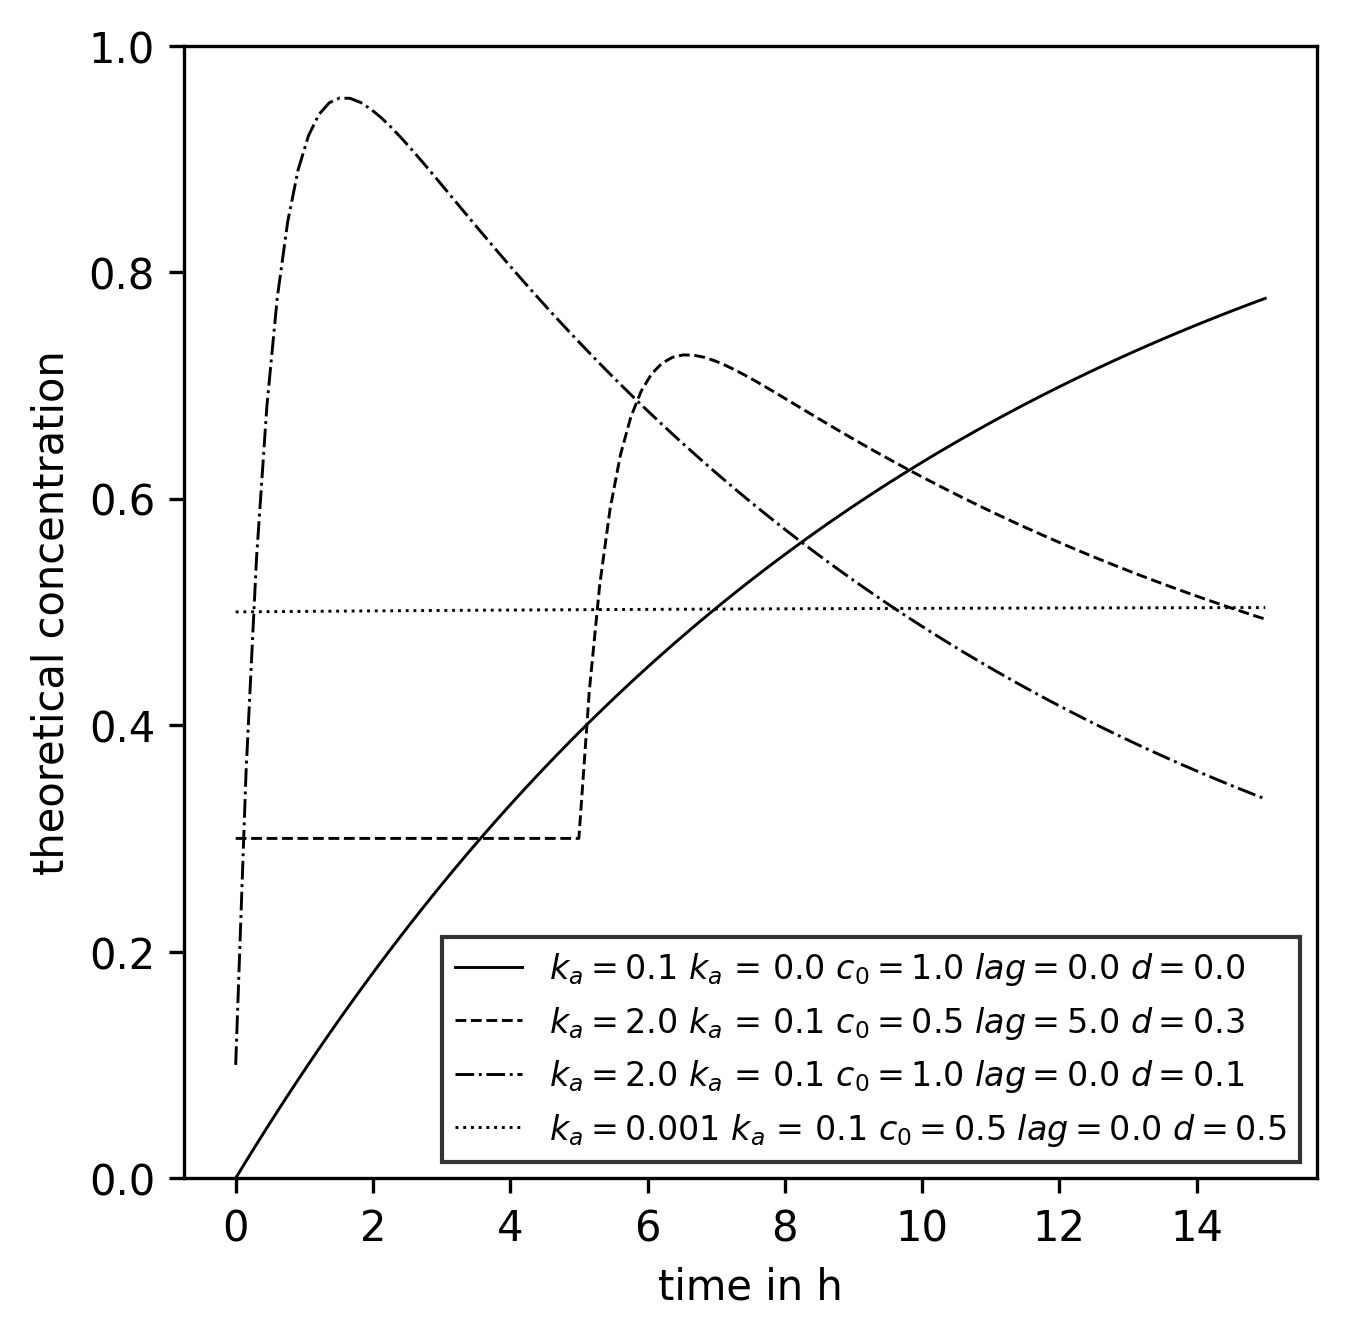

In [6]:
toy_k = np.array([[[.1,0,1,0,0],
                   [2,.1,.5,5,.3],
                   [2,.1,1,0,.1],
                   [.001,.1,.5,0,.5]]])
timepoints = np.linspace(0,15,100)
tmp_k = toy_k[0]

plt.figure(dpi=300,figsize=(5,5))
plt.subplot(111,box_aspect=1)
markers = ['-','--','-.',':']
i = 0
for k in tmp_k:
    l = r'$k_a = $'+str(k[0])+r' $k_a$ = '+str(k[1])+r' $c_0 = $'+str(k[2])+r' $lag = $'+str(k[3])+r' $d = $'+str(k[4])
    plt.plot(timepoints,em.bateman(timepoints,k),color='k',label=l,linestyle=markers[i],linewidth=.7)
    i += 1
plt.legend(edgecolor='k',fancybox=False,fontsize=8)
plt.xlabel('time in h')
plt.ylabel('theoretical concentration')
plt.ylim(0,1)
plt.show()

# Figure 2

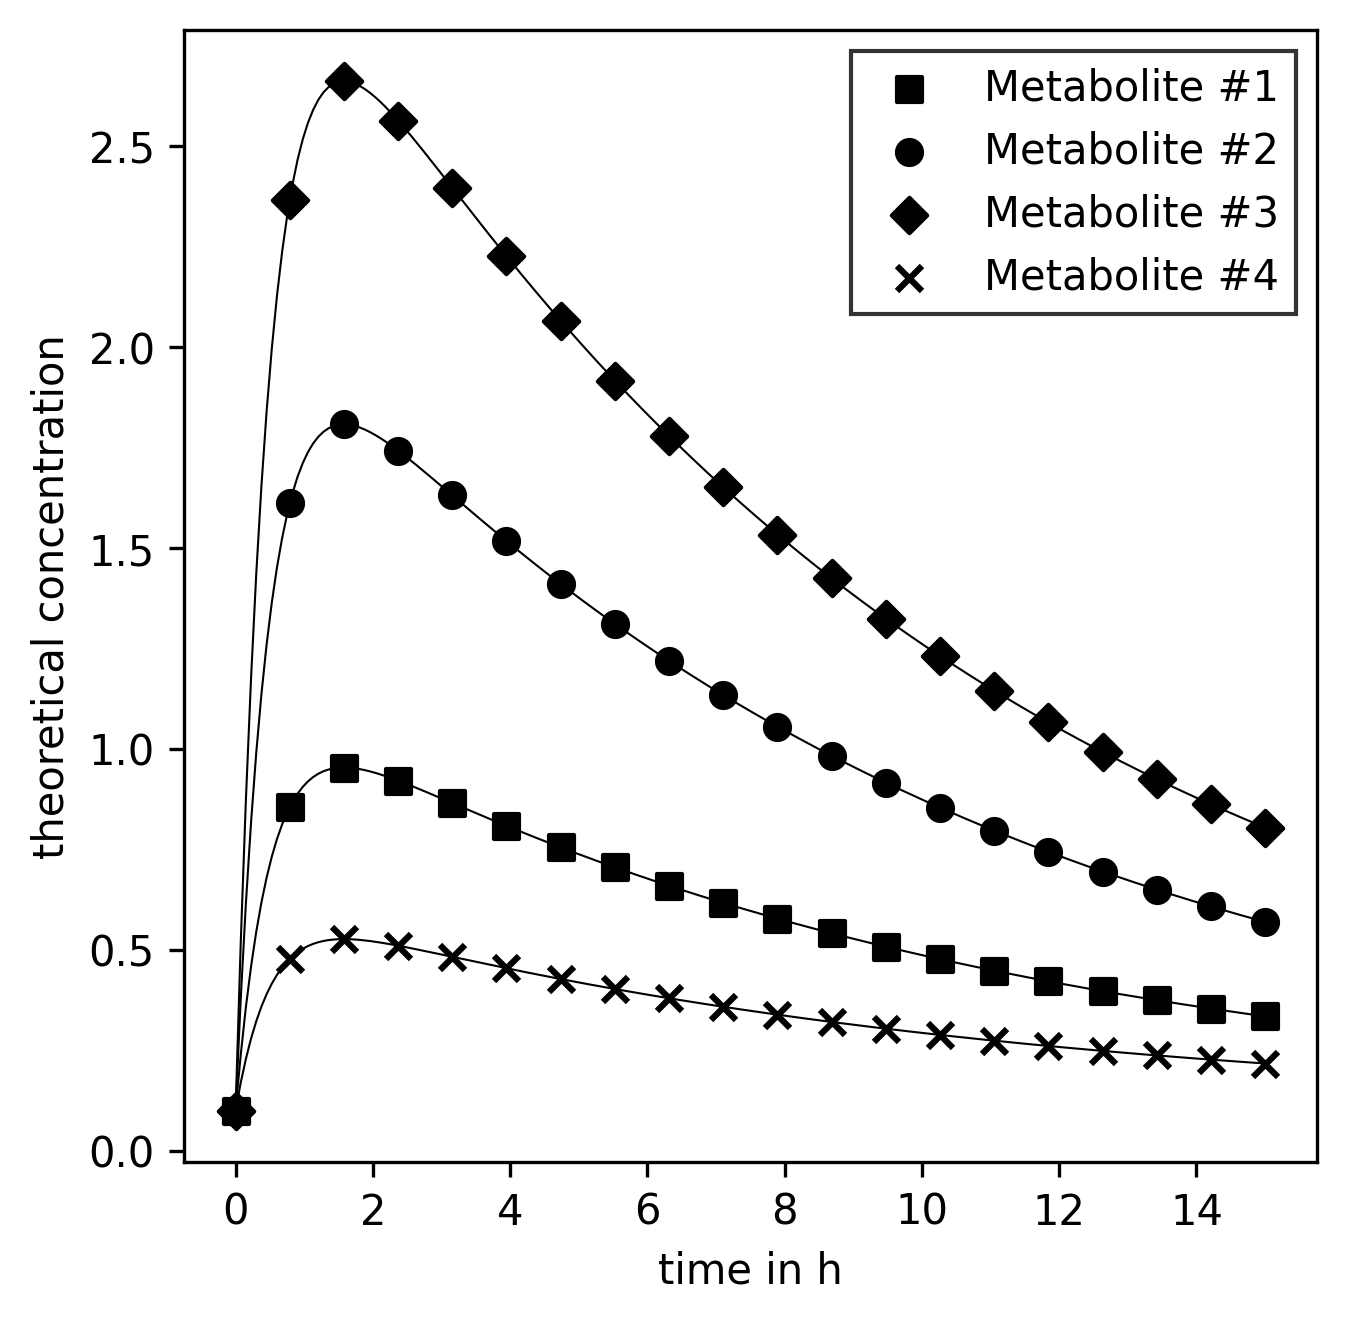

In [7]:
toy_k = np.array([[[2,.1,1,0,.1],
                   [2,.1,2,0,.1],
                   [2,.1,3,0,.1],
                   [2,.1,.5,0,.1]]])

tmp_k = toy_k[0]

plt.figure(dpi=300,figsize=(5,5))
plt.subplot(111,box_aspect=1)
markers = ['s','o','D','x']
i = 0
for k in tmp_k:
    timepoints = np.linspace(0,15,200)
    plt.plot(timepoints,em.bateman(timepoints,k),color='k',linewidth=.5)
    timepoints = np.linspace(0,15,20)
    plt.scatter(timepoints,em.bateman(timepoints,k),color='k',marker=markers[i],label='Metabolite #{}'.format(i+1))
    i += 1
plt.legend(edgecolor='k',fancybox=False)
plt.xlabel('time in h')
plt.ylabel('theoretical concentration')
plt.show()

# Figure 3

Figure 3 was not done with Python/ Matplotlib

# Synthetic Data Results

In [8]:
def significance_star(pvalue):
    '''
    Prints correct number of stars for the significance level.
    -
    Input
    pvalue      value of probability
    -
    Output      
    string      string with correct number of stars for significant results and - for no significance
    '''
    
    assert pvalue >= 0
    
    if pvalue <= .001:
        return '***'
    elif pvalue <= .01:
        return '**'
    elif pvalue <= .05:
        return '*'
    else:
        return '-'
    
def SD(true,fit):
    return np.sqrt(np.sum((true-fit)**2)/len(true))

def ratio_SD(true,fit):
    y = fit/true
    return np.std(y/np.mean(y))

diagnosis = {'SD':SD,
             'ratio_SD':ratio_SD,
             'rSD':ratio_SD,
             'RMSE':SD,
             'rRMSE':ratio_SD
            }

In [9]:
def plot_performance(diagnosis_name,results_sv,with_pqn=True):
    diagnosis_func = diagnosis[diagnosis_name]
    maximum = 0
    # list of all goodness of fit estimates
    tmp_pqn      = []
    tmp_em_full  = []
    tmp_mix_full = []
    tmp_em_mini  = []
    tmp_mix_mini = []
    # read out how many replicates there are in the dataset
    n_replicates = len(results_sv['PQN'])
    # loop over all replicates
    for n_replicate in range(n_replicates):
        sv_vector  = results_sv['TRUE'][n_replicate]
        # loop over all normalization methods
        for method, tmp_list in zip(methods,[tmp_pqn,tmp_em_full,tmp_em_mini,tmp_mix_full,tmp_mix_mini]):
            tmp_sv = results_sv[method][n_replicate]
            tmp_diagnosis = diagnosis_func(sv_vector,tmp_sv)
            tmp_list.append(tmp_diagnosis)
        
    # plot the diagnosis parameters
    rand = np.random.uniform(-.1,.1,n_replicates)
    nr = 0
    for method, tmp_list in zip(methods,[tmp_pqn,tmp_em_full,tmp_em_mini,tmp_mix_full,tmp_mix_mini]):
        if method == 'PQN' and with_pqn==False:
            pass
        else:
            plt.scatter(np.ones(n_replicates)*nr+rand,tmp_list,color=colors[nr],marker='.',s=20,edgecolor='k',linewidth=.2)
            plt.plot([nr-.2,nr+.2],[np.mean(tmp_list),np.mean(tmp_list)],color='k')
        print('{:10} mean = {:5.3f} std = {:5.3f}'.format(method,np.mean(tmp_list),np.std(tmp_list)))
        nr += 1
        

    # significances
#     tmp_dic = {'PQN':tmp_pqn,'PKM_full':tmp_em_full,'PKM_mini':tmp_em_mini,'MIX_full':tmp_mix_full,'MIX_mini':tmp_mix_mini}
#     tmp_loc = {'PQN':0,'PKM_full':1,'PKM_mini':2,'MIX_full':3,'MIX_mini':4}
    tmp_dic = {}
    tmp_loc = {}
    for nr_, (method, list_) in enumerate(zip(methods,[tmp_pqn,tmp_em_full,tmp_mix_full,tmp_em_mini,tmp_mix_mini ])):
        tmp_dic[method] = list_
        tmp_loc[method] = nr_
        
    if np.max([tmp_pqn,tmp_em_full,tmp_em_mini,tmp_mix_full,tmp_mix_mini]) > maximum:
        maximum = np.max([tmp_pqn,tmp_em_full,tmp_em_mini,tmp_mix_full,tmp_mix_mini])
    height          = maximum*1.1
    bracket_size    = .01
    text_offset     = .01
    height_increase = .05*maximum
    print('------- P VALUES ------')
    p_df = pd.DataFrame(columns=tmp_loc.keys(),index=tmp_loc.keys(),dtype=np.float64)
    for i,j in combinations(tmp_dic.keys(),2):
#         test_result = ss.mannwhitneyu(tmp_dic[i],tmp_dic[j])
        test_result = ss.wilcoxon(tmp_dic[i],tmp_dic[j])
        print('{:15} {:15} {:8.2e} {}'.format(i,j,test_result.pvalue,significance_star(test_result.pvalue)))
        p_df.loc[i,j] = test_result.pvalue
        if test_result.pvalue <= .05:
            if i == 'PQN' and with_pqn == False:
                pass
            else:
                plt.plot(np.array([tmp_loc[i],tmp_loc[i],tmp_loc[j],tmp_loc[j]]),
                         [height-maximum*bracket_size,height,height,height-maximum*bracket_size],
                         'k',
                         linewidth=.5
                        )
                plt.text(np.mean([tmp_loc[i],tmp_loc[j]]),
                         height+maximum*text_offset,
                         significance_star(test_result.pvalue),
                         ha='center',
                         va='center',
                         fontsize=8
                        )
                height += height_increase
    return nr, p_df

def plot_points(diagnosis_name,results_sv):
    diagnosis_func = diagnosis[diagnosis_name]
    maximum = 0
    # list of all goodness of fit estimates
    tmp_pqn      = []
    tmp_em_full  = []
    tmp_mix_full = []
    tmp_em_mini  = []
    tmp_mix_mini = []
    # read out how many replicates there are in the dataset
    n_replicates = len(results_sv['PQN'])
    # loop over all replicates
    for n_replicate in range(n_replicates):
        sv_vector  = results_sv['TRUE'][n_replicate]
        # loop over all normalization methods
        for method, tmp_list in zip(methods,[tmp_pqn,tmp_em_full,tmp_em_mini,tmp_mix_full,tmp_mix_mini]):
            tmp_sv = results_sv[method][n_replicate]
            tmp_diagnosis = diagnosis_func(sv_vector,tmp_sv)
            tmp_list.append(tmp_diagnosis)
    
    means = []
    stds   = []
    for tmp_list in [tmp_pqn,tmp_em_full,tmp_em_mini,tmp_mix_full,tmp_mix_mini]:
        means.append(np.mean(tmp_list))
        stds.append(np.std(tmp_list))
    return means, stds

## Figure 4

In [10]:
from sklearn.metrics import r2_score

def unflattener(vector,n_metabolites,n_timepoints):
    tensor = vector.reshape(n_metabolites,n_timepoints,order='F')
    return tensor

def normalizer(mtilde,vsweat):
    c = mtilde/vsweat[:,None,:]
    return c

rep = 11
# load data
error_sigma   = .2
n_metabolites = 60
path          = 'v3'
base          = 'synthetic_data/simulation_results'
with open(f'{base}/{path}_e_{error_sigma}_n_{n_metabolites}.pkl','rb') as file:
    results_time,results_sv,results_model,raw_values = pickle.load(file)
    
methods = ['PQN','EM_full','EM_mini','MIX_full','MIX_mini']
c_true  = np.array(raw_values['C'])
v_true  = np.array(results_sv['TRUE'])
m_tilde = np.array(raw_values['M'])
c_true0 = c_true[:,:,0]
c_true_rel = c_true/c_true0[:,:,None]

relative
R²    PQN                  0.831
rRMSE PQN                  0.064
R²    PKM_mini             0.392
rRMSE PKM_mini             0.291
R²    MIX_mini             0.831
rRMSE MIX_mini             0.066
absolute
R²   PKM_mini             0.425
RMSE PKM_mini             0.555
R²   MIX_mini             0.961
RMSE MIX_mini             0.150


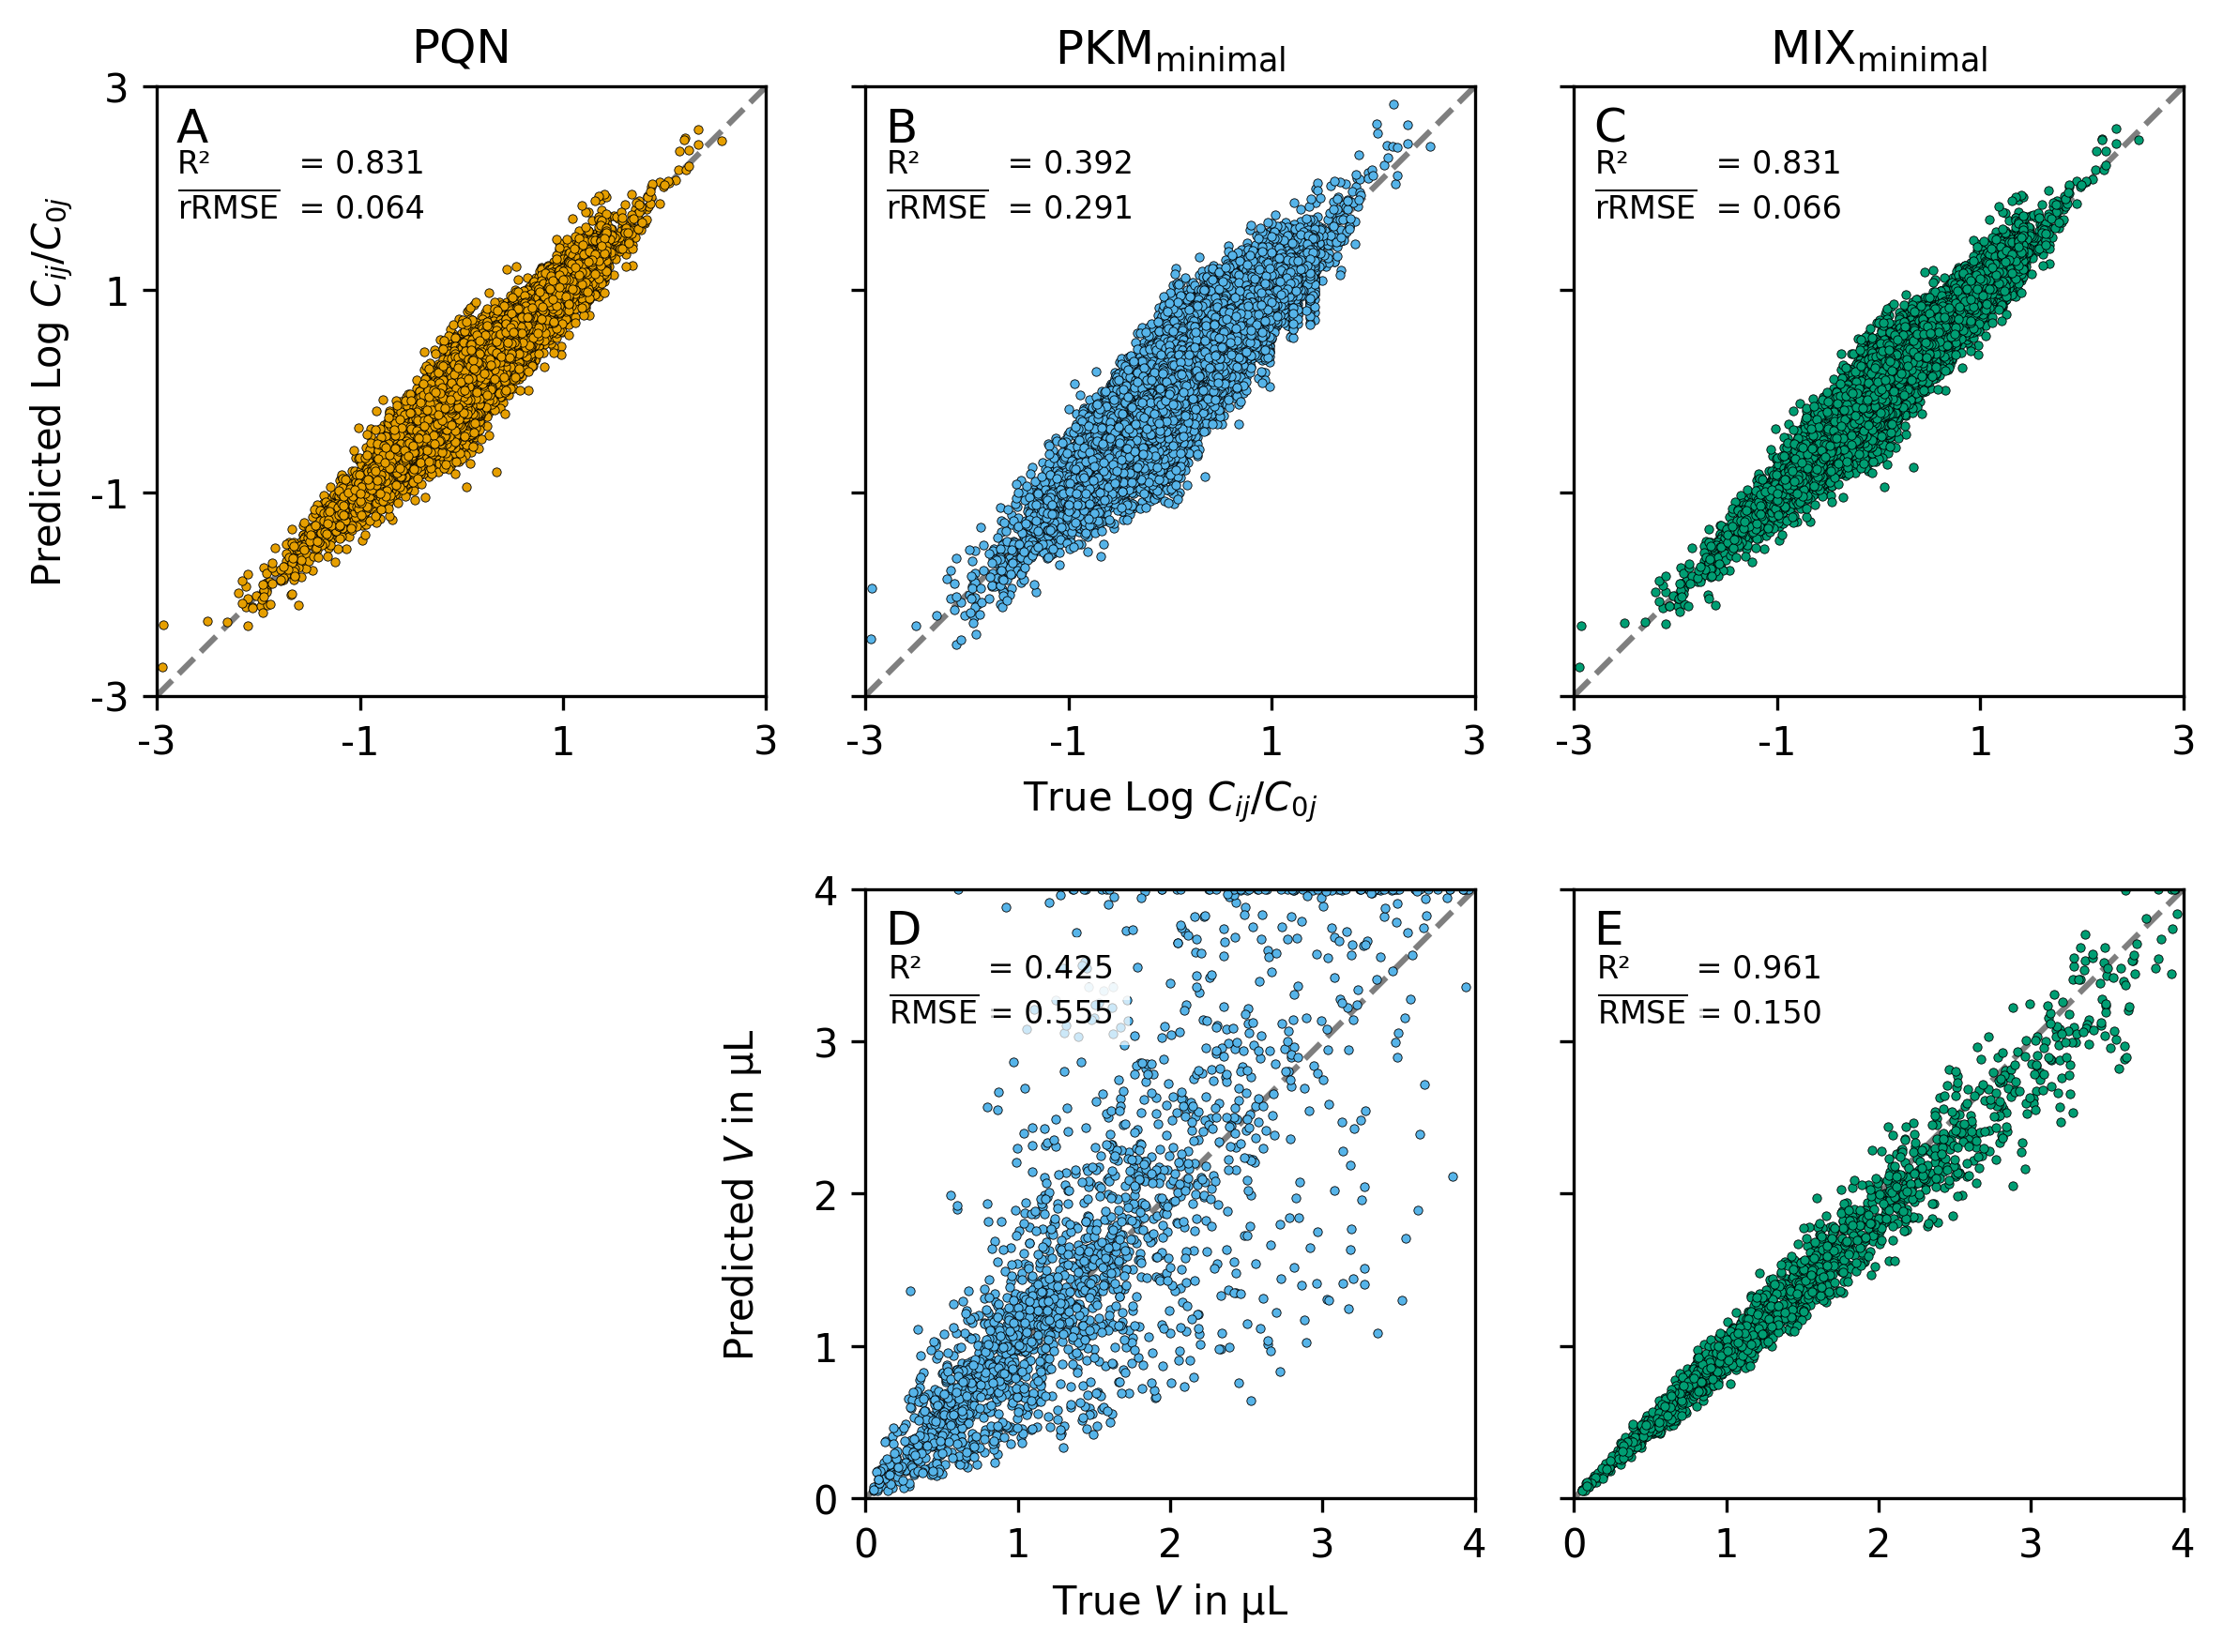

In [11]:
labels  = ['PQN',r'PKM$_{\rmminimal}$',r'MIX$_{\rmminimal}$']
methods = ['PQN','PKM_mini','MIX_mini']
colors  = ['#E69F00','#56B4E9','#009E73','#009E73']
c_true  = np.array(raw_values['C'])
v_true  = np.array(results_sv['TRUE'])
m_tilde = np.array(raw_values['M'])
c_true0 = c_true[:,:,0]
c_true_rel = c_true/c_true0[:,:,None]
n = 0
fig = plt.figure(dpi=300,figsize=(8,6))

#################
## FIRST ROW
#################
print('relative')

ax_list = []
for method in methods:
    tmp_v = np.array(results_sv[method])
    fit_c = normalizer(m_tilde,tmp_v)
    fit_c0 = fit_c[:,:,0]
    fit_c_rel = fit_c/fit_c0[:,:,None]
    n += 1
    ax = plt.subplot(2,3,n,box_aspect=1)
    ax_list.append(ax)
#     plt.scatter(c_true[:,:],fit_c[:,:],color=colors[n-1],marker='.',s=20,edgecolor='k',linewidth=.2)
    plt.scatter(c_true_rel.flatten(),fit_c_rel.flatten(),color=colors[n-1],marker='.',s=20,edgecolor='k',linewidth=.2)
    print('R²    {:20} {:.3f}'.format(method,r2_score(c_true_rel.flatten(),fit_c_rel.flatten())))
    # calculate rSD
    rsd_list = []
    for bla_true,bla_pred in zip(v_true,tmp_v):
        rsd_list.append(ratio_SD(bla_true,bla_pred))
    print('rRMSE {:20} {:.3f}'.format(method,np.mean(rsd_list)))
    y_shift = .4
    plt.text(0.02,354.81338923357606*y_shift,' = {:.3f}'.format(r2_score(c_true_rel.flatten(),fit_c_rel.flatten())),size=8)
    plt.text(0.02,125.89254117941663*y_shift,' = {:.3f}'.format(np.mean(rsd_list)),size=8)
    plt.text(0.0016,354.81338923357606*y_shift,'R²',size=8)
    plt.text(0.0016,125.89254117941663*y_shift,r'$\overline{\rm rRMSE}$',size=8)
    plt.title(labels[n-1])
    
    lb = np.min([ax.get_ylim(),ax.get_xlim()])
    ub = np.max([ax.get_ylim(),ax.get_xlim()])
    lb,ub = .001,1000
    plt.yscale('log')
    plt.xscale('log')
    plt.plot([lb,ub],[lb,ub],'k--',alpha=.5,zorder=0)
    plt.xlim(lb,ub)
    plt.ylim(lb,ub)
    if n == 1:
#         plt.ylabel(r'$Q^{\rm PQN}(t)/Q^{\rm PQN}(0)$')
        plt.ylabel(r'Predicted Log $C_{ij}/C_{0j}$')
        plt.yticks([.001,.1,10,1000],[-3,-1,1,3])
    elif n ==2:
#         plt.ylabel(r'$V_{\rm sweat}^{\rm PKM}(t)/V_{\rm sweat}^{\rm PKM}(0)$')
        plt.xlabel(r'True Log $C_{ij}/C_{0j}$')
    else:
#         plt.ylabel(r'$V_{\rm sweat}^{\rm MIX}(t)/V_{\rm sweat}^{\rm MIX}(0)$')
        pass
    if n > 1:
        plt.yticks([.001,.1,10,1000],[])
        pass
    plt.xticks([.001,.1,10,1000],[-3,-1,1,3])
    plt.minorticks_off()
        

#################
## SECOND ROW
#################
print('absolute')

labels  = [r'PKM$_{\rmfull}$',r'MIX$_{\rmfull}$',r'MIX$_{\rmminimal}$']
methods = ['PKM_mini','MIX_mini']
colors  = ['#56B4E9','#009E73','#009E73']

n = 4
for method in methods:
    tmp_v = np.array(results_sv[method])
    n += 1
    ax = plt.subplot(2,3,n,box_aspect=1)
    ax_list.append(ax)
#     plt.scatter(c_true[:,:],fit_c[:,:],color=colors[n-1],marker='.',s=20,edgecolor='k',linewidth=.2)
    plt.scatter(v_true,tmp_v,color=colors[n-5],marker='.',s=20,edgecolor='k',linewidth=.2)
    print('R²   {:20} {:.3f}'.format(method,r2_score(v_true.flatten(),tmp_v.flatten())))
#     plt.text(.2,3.6,'R² = {:.3f}'.format(r2_score(v_true.flatten(),tmp_v.flatten())))
    # calculate rSD
    sd_list = []
    for bla_true,bla_pred in zip(v_true,tmp_v):
        sd_list.append(SD(bla_true,bla_pred))
    print('RMSE {:20} {:.3f}'.format(method,np.mean(sd_list)))
    y_shift = .28
    t1 = plt.text(.74,1850/1000*2-y_shift,' = {:.3f}'.format(r2_score(v_true.flatten(),tmp_v.flatten())),size=8,backgroundcolor='w')
    t2 = plt.text(.74,1700/1000*2-y_shift,' = {:.3f}'.format(np.mean(sd_list)),size=8,backgroundcolor='w')
    t3 = plt.text(.15,1850/1000*2-y_shift,'R²',size=8,ha='left',backgroundcolor='w')
    t4 = plt.text(.15,1700/1000*2-y_shift,r'$\overline{\rm RMSE}$',size=8,backgroundcolor='w')
    for t in [t1,t2,t3,t4]:
        t.set_bbox(dict(facecolor='w', alpha=0.7, edgecolor='none'))
#     plt.title(labels[n-5])
    
#     lb = np.min([ax.get_ylim(),ax.get_xlim()])
#     ub = np.max([ax.get_ylim(),ax.get_xlim()])
    lb,ub = 0,4
    plt.plot([lb,ub],[lb,ub],'k--',alpha=.5,zorder=0)
    plt.xlim(lb,ub)
    plt.ylim(lb,ub)
    if n ==6:
        plt.yticks([0,1,2,3,4],[])
    else:
        plt.yticks([0,1,2,3,4])
#         plt.ylabel(r'Predicted $V_{\rm sweat}$ in µL')
        plt.xlabel(r'True $V$ in µL')

import matplotlib.transforms as mtransforms
for name, ax in zip(['A','B','C','D','E',],ax_list):
#     ax.set_title(name, loc='left', pad=-200)
    trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, name, transform=ax.transAxes + trans,
            fontsize='large', verticalalignment='top', fontfamily='sans',
            bbox=dict(facecolor='none', edgecolor='none', pad=3.0))

    
plt.subplot(2,3,4)
plt.xlim(lb,ub)
plt.ylim(lb,ub)
plt.text(3.7,2,r'Predicted $V$ in µL',rotation=90,size=10,va='center',ha='left')
plt.axis('off')
plt.tight_layout()
plt.show()

## Figure 5

v1


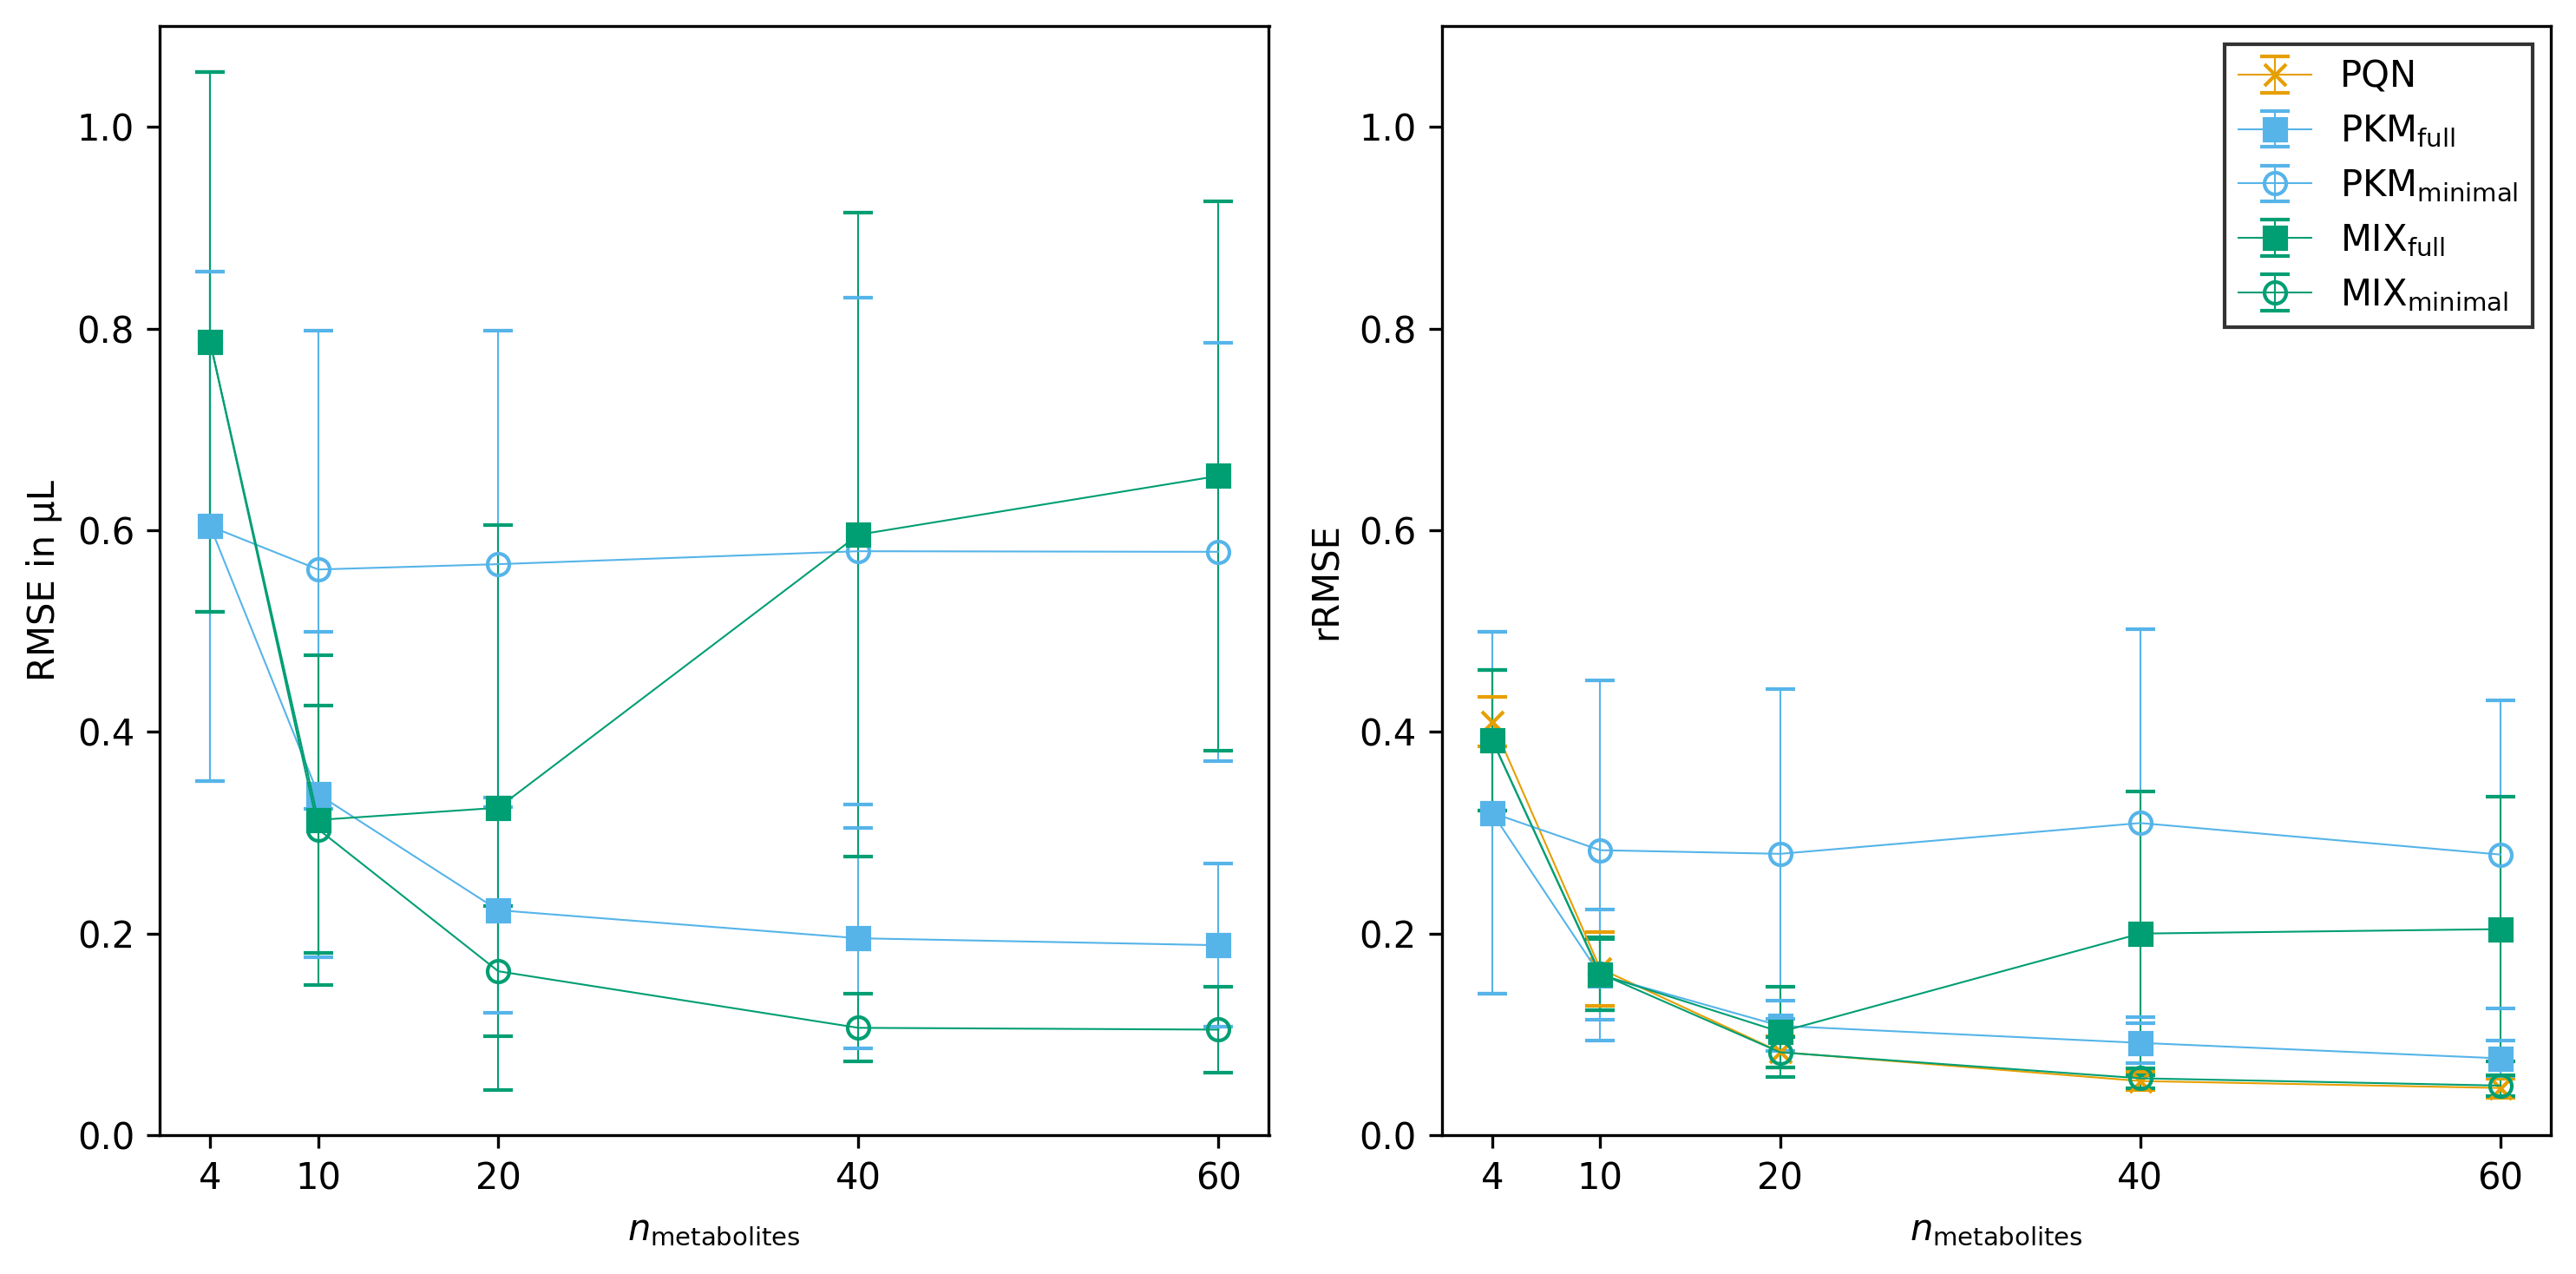

v2


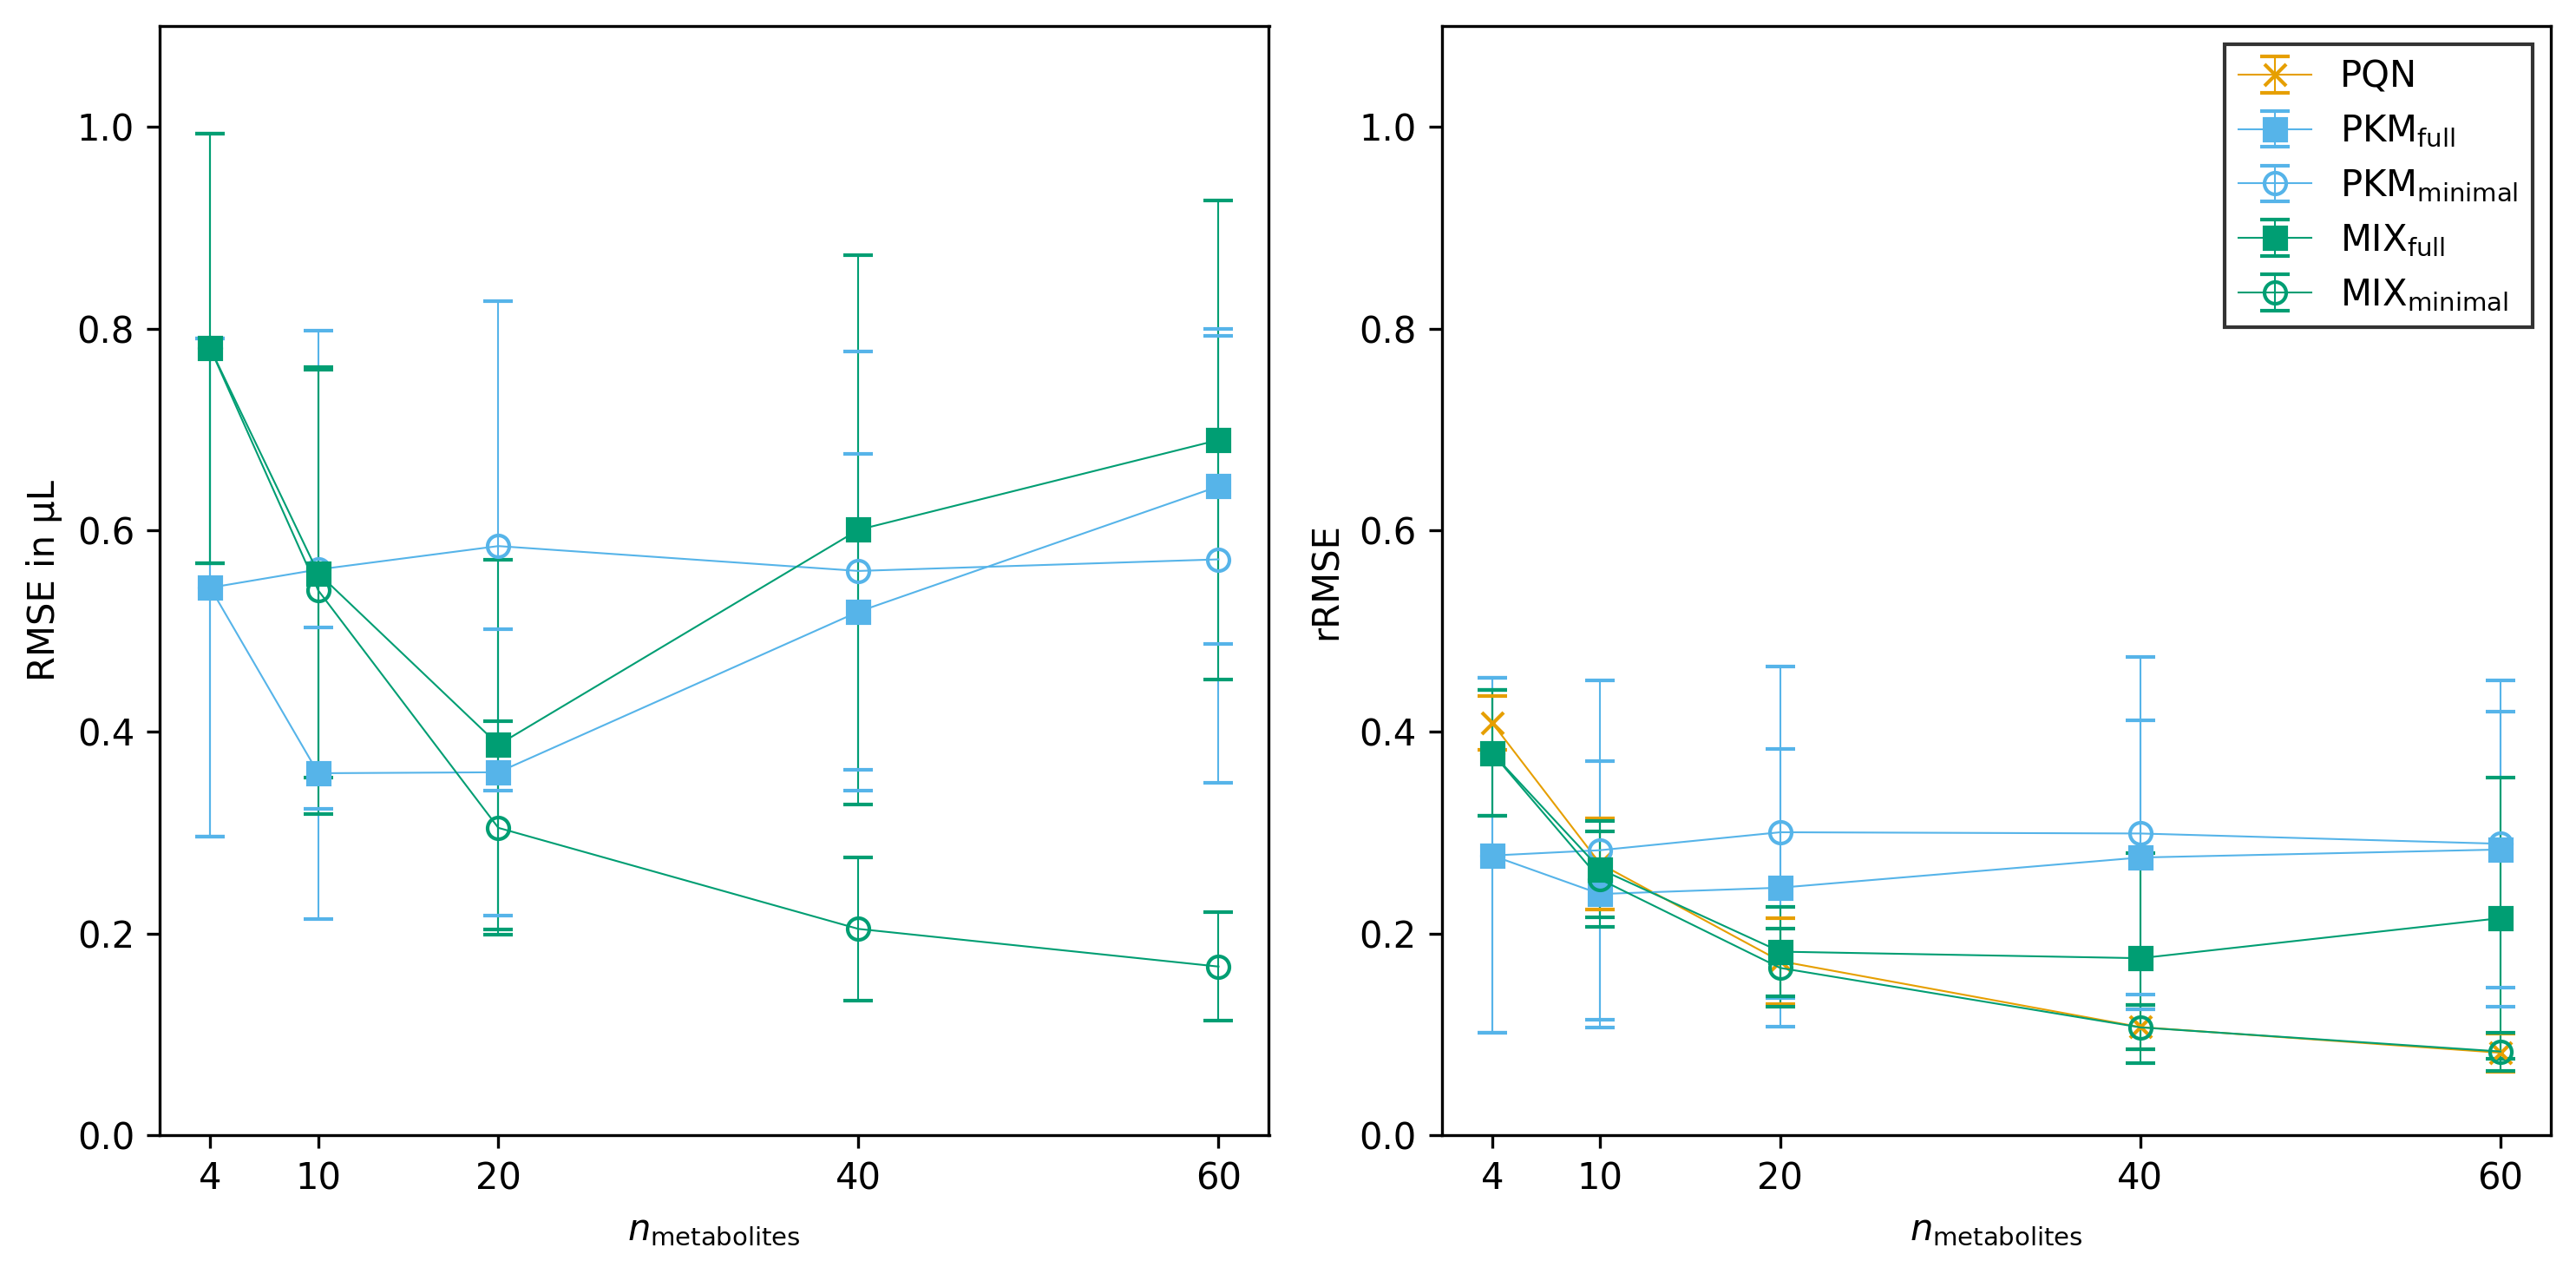

v3


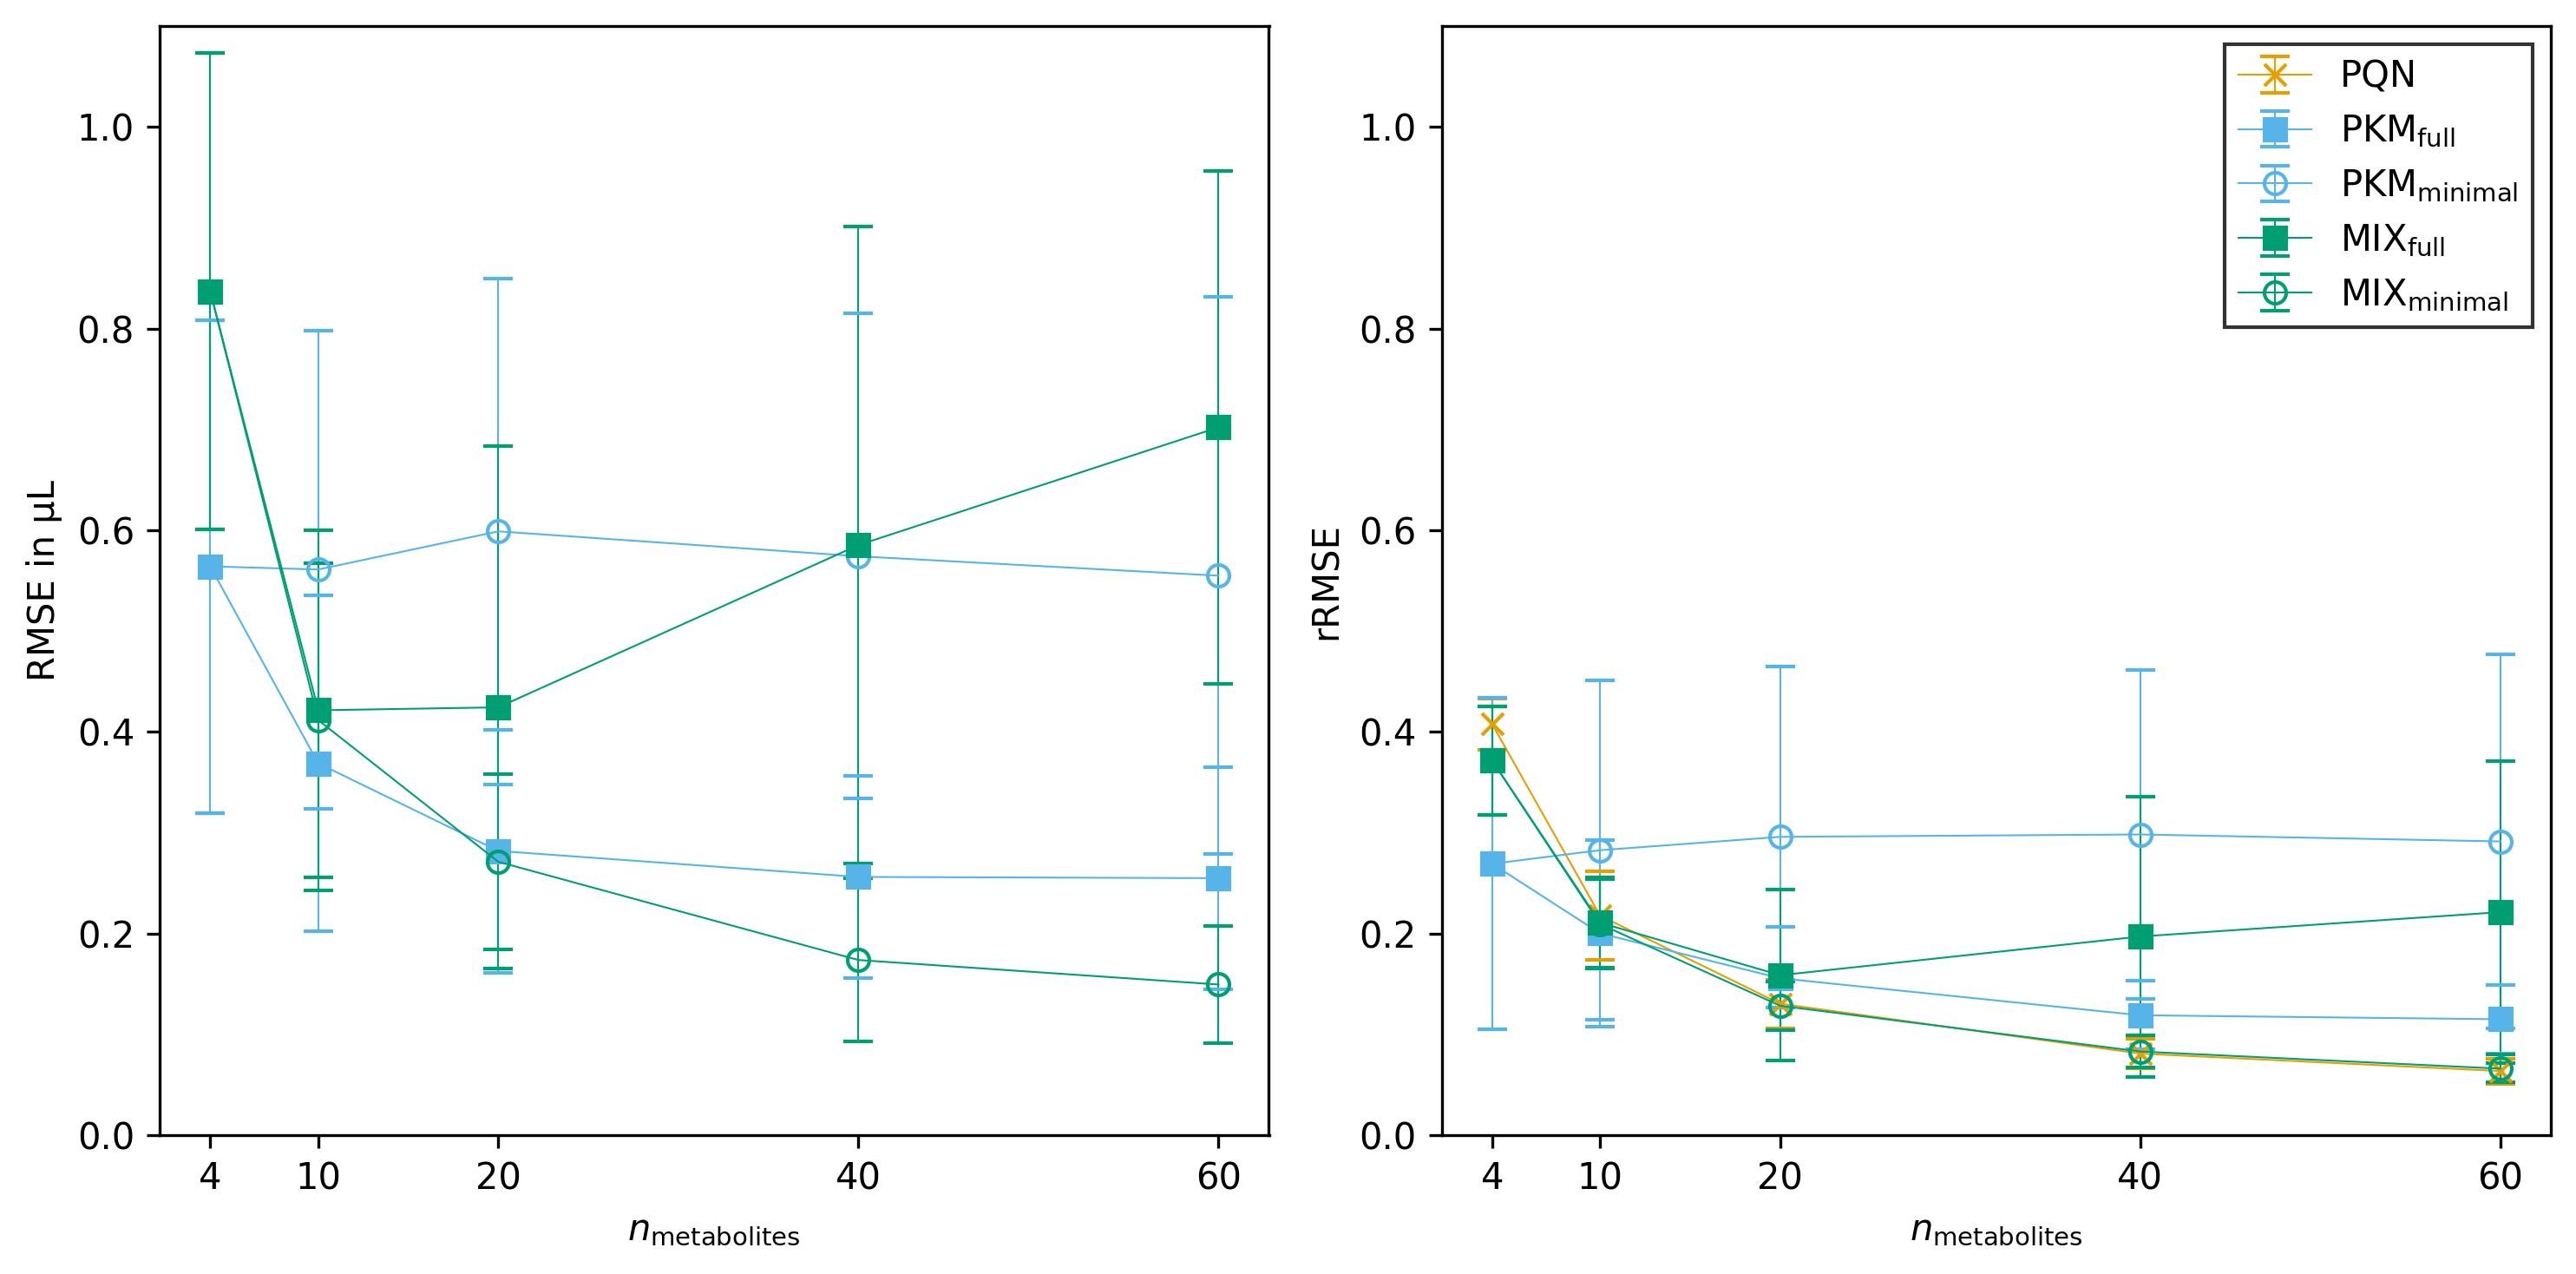

In [12]:
for path in ['v1','v2','v3']:
    print(path)
    # load data
    error_sigma   = .2
    base          = 'synthetic_data/simulation_results'
    n_metabolites_list = np.array([4,10,20,40,60])
    plt.figure(dpi=300,figsize=(10,5))


    ######## Subplot 1
    markers = ['x','s','o','s','o']
    colors  = ['#E69F00','#56B4E9','#56B4E9','#009E73','#009E73']
    fcolors = ['#E69F00','#56B4E9','none','#009E73','none']
    methods = ['PQN','PKM_full','PKM_mini','MIX_full','MIX_mini']
    labels  = ['PQN',r'PKM$_{\rmfull}$',r'PKM$_{\rmminimal}$',r'MIX$_{\rmfull}$',r'MIX$_{\rmminimal}$']
    plt.subplot(121,box_aspect=1)
    # plt.title('version = {} \nerror_sigma = {:.1f}'.format(path,error_sigma))
    diagnosis_name = 'RMSE'
    plt.ylabel(f'{diagnosis_name} in μL')
    points = []
    stds   = []
    for n_metabolites in n_metabolites_list:
        with open(f'{base}/{path}_e_{error_sigma}_n_{n_metabolites}.pkl','rb') as file:
            results_time,results_sv,results_model,raw_values = pickle.load(file)
        tmp, std = plot_points(diagnosis_name,results_sv)
        points.append(tmp)
        stds.append(std)
    points = np.array(points)
    stds = np.array(stds)

    # write out dataframes for means and stds 
    SD_results = pd.DataFrame(index=methods,columns=[f'{path} {i} mean' for i in n_metabolites_list]+[f'{path} {i} std' for i in n_metabolites_list])
    SD_results.iloc[:,:len(n_metabolites_list)] = points.T
    SD_results.iloc[:,len(n_metabolites_list):] = stds.T

    for nr, label in enumerate(methods):
        if nr == 0:
            pass
        else:
            plt.errorbar(n_metabolites_list,points[:,nr],yerr=stds[:,nr],color=colors[nr],marker=markers[nr],linewidth=.5,capsize=4,label=labels[nr],mfc=fcolors[nr])
    plt.xlabel(r'$n_{\rm metabolites}$')
    plt.xticks(n_metabolites_list)
    plt.ylim(0,1.1)

    ######## Subplot 2
    markers = ['x','s','o','s','o']
    colors  = ['#E69F00','#56B4E9','#56B4E9','#009E73','#009E73']
    fcolors  = ['#E69F00','#56B4E9','none','#009E73','none']
    methods = ['PQN','PKM_full','PKM_mini','MIX_full','MIX_mini']
    labels  = ['PQN',r'PKM$_{\rmfull}$',r'PKM$_{\rmminimal}$',r'MIX$_{\rmfull}$',r'MIX$_{\rmminimal}$']

    plt.subplot(122,box_aspect=1)
    # plt.title('version = {} \nerror_sigma = {:.1f}'.format(path,error_sigma))
    diagnosis_name = 'ratio_SD'
    plt.ylabel(f'rRMSE')
    points = []
    stds   = []
    for n_metabolites in n_metabolites_list:
        with open(f'{base}/{path}_e_{error_sigma}_n_{n_metabolites}.pkl','rb') as file:
            results_time,results_sv,results_model,raw_values = pickle.load(file)
        tmp, std = plot_points(diagnosis_name,results_sv)
        points.append(tmp)
        stds.append(std)
    points = np.array(points)
    stds = np.array(stds)

    # write out dataframes for means and stds 
    rSD_results = pd.DataFrame(index=methods,columns=[f'{path} {i} mean' for i in n_metabolites_list]+[f'{path} {i} std' for i in n_metabolites_list])
    rSD_results.iloc[:,:len(n_metabolites_list)] = points.T
    rSD_results.iloc[:,len(n_metabolites_list):] = stds.T

    for nr, label in enumerate(methods):
        plt.errorbar(n_metabolites_list,points[:,nr],yerr=stds[:,nr],color=colors[nr],marker=markers[nr],linewidth=.5,capsize=4,label=labels[nr],mfc=fcolors[nr])
    plt.xlabel(r'$n_{\rm metabolites}$')
    plt.xticks(n_metabolites_list)
    plt.ylim(0,1.1)

    ######## Concluding Commands
    plt.legend(edgecolor='k',fancybox=False)
    plt.tight_layout()
    plt.show()

## Figure 6, S9, S10

v1
PQN        mean = 0.346 std = 0.203
PKM_full   mean = 0.188 std = 0.081
PKM_mini   mean = 0.579 std = 0.207
MIX_full   mean = 0.654 std = 0.273
MIX_mini   mean = 0.105 std = 0.042
------- P VALUES ------
PQN             PKM_full        8.50e-11 ***
PQN             PKM_mini        1.79e-10 ***
PQN             MIX_full        2.62e-10 ***
PQN             MIX_mini        9.54e-17 ***
PKM_full        PKM_mini        1.64e-17 ***
PKM_full        MIX_full        5.77e-18 ***
PKM_full        MIX_mini        2.02e-13 ***
PKM_mini        MIX_full        1.85e-02 *
PKM_mini        MIX_mini        4.02e-18 ***
MIX_full        MIX_mini        3.90e-18 ***


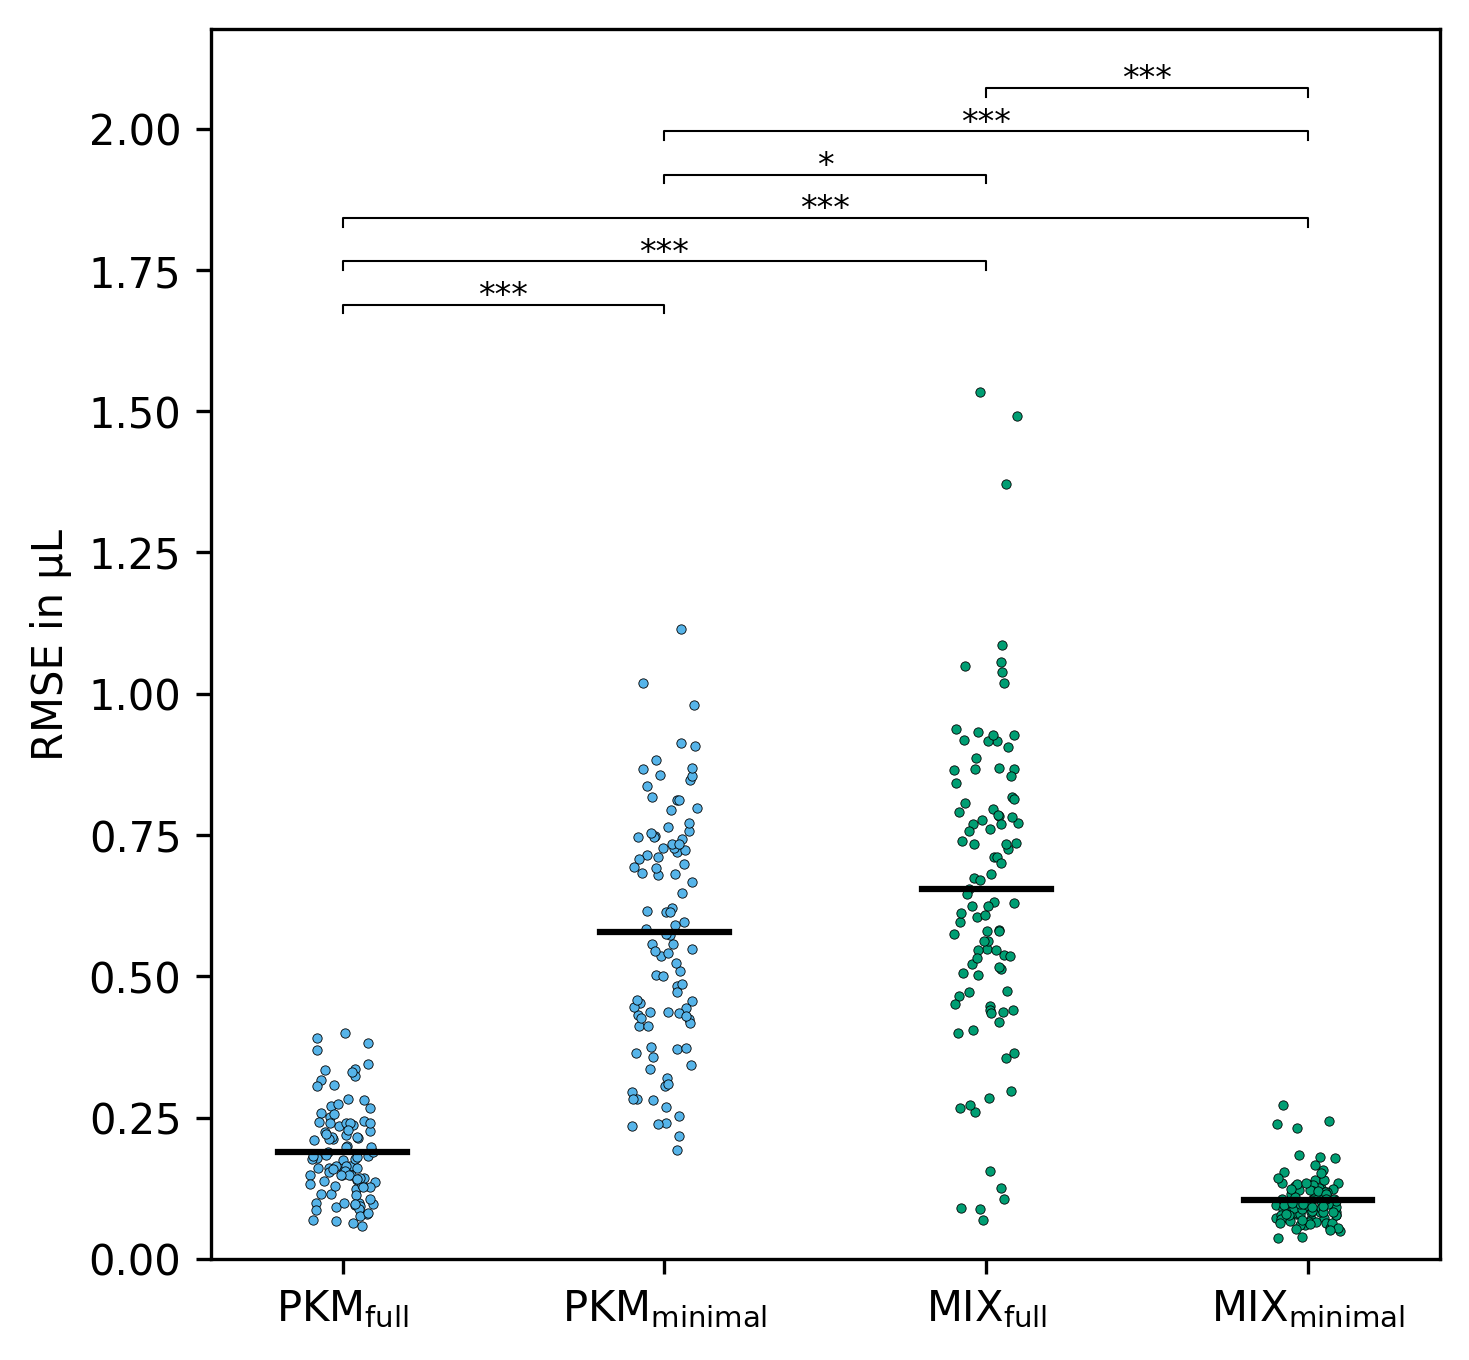

v2
PQN        mean = 0.331 std = 0.174
PKM_full   mean = 0.643 std = 0.156
PKM_mini   mean = 0.571 std = 0.221
MIX_full   mean = 0.689 std = 0.237
MIX_mini   mean = 0.167 std = 0.054
------- P VALUES ------
PQN             PKM_full        6.93e-17 ***
PQN             PKM_mini        6.43e-14 ***
PQN             MIX_full        1.22e-10 ***
PQN             MIX_mini        5.79e-15 ***
PKM_full        PKM_mini        1.39e-01 -
PKM_full        MIX_full        1.04e-02 *
PKM_full        MIX_mini        3.90e-18 ***
PKM_mini        MIX_full        3.18e-04 ***
PKM_mini        MIX_mini        4.96e-18 ***
MIX_full        MIX_mini        4.27e-18 ***


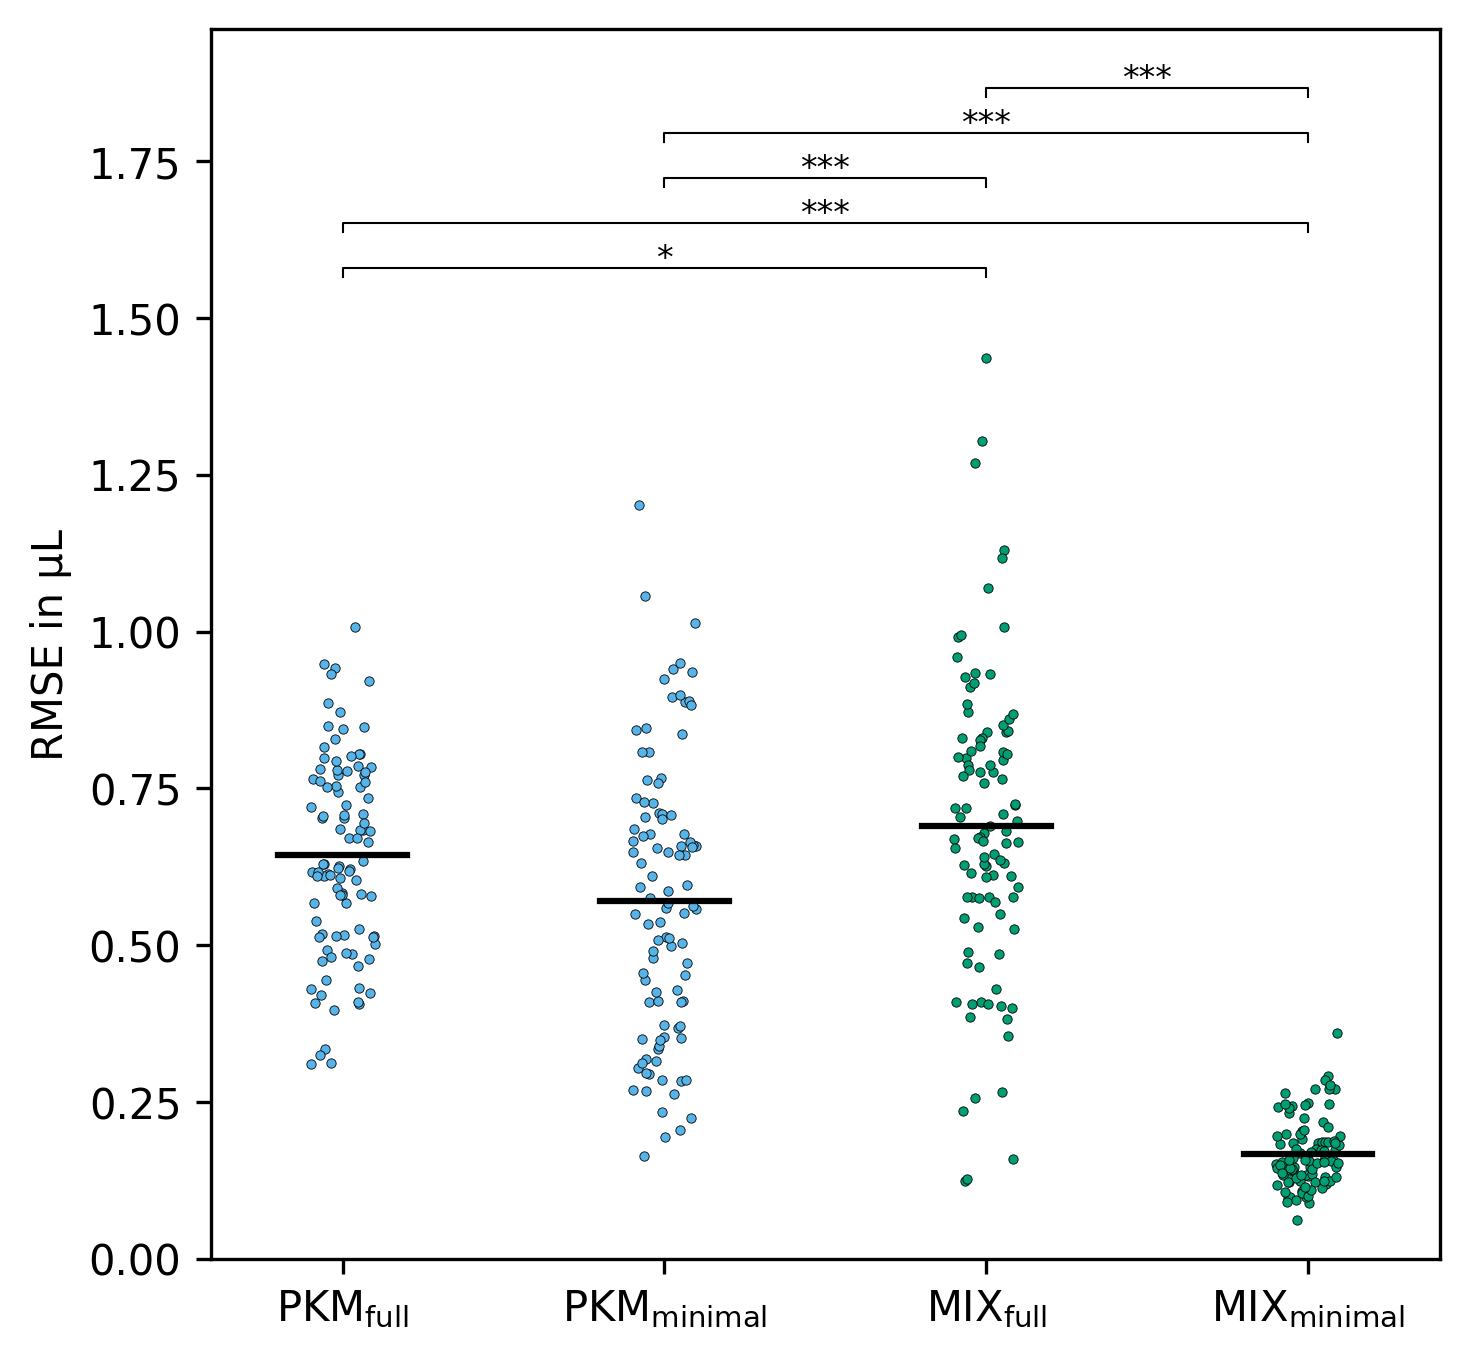

v3
PQN        mean = 0.324 std = 0.192
PKM_full   mean = 0.255 std = 0.110
PKM_mini   mean = 0.555 std = 0.276
MIX_full   mean = 0.702 std = 0.255
MIX_mini   mean = 0.150 std = 0.058
------- P VALUES ------
PQN             PKM_full        4.23e-03 **
PQN             PKM_mini        1.76e-12 ***
PQN             MIX_full        2.89e-09 ***
PQN             MIX_mini        5.59e-13 ***
PKM_full        PKM_mini        1.07e-16 ***
PKM_full        MIX_full        5.79e-14 ***
PKM_full        MIX_mini        7.01e-15 ***
PKM_mini        MIX_full        1.55e-04 ***
PKM_mini        MIX_mini        8.27e-18 ***
MIX_full        MIX_mini        5.27e-18 ***


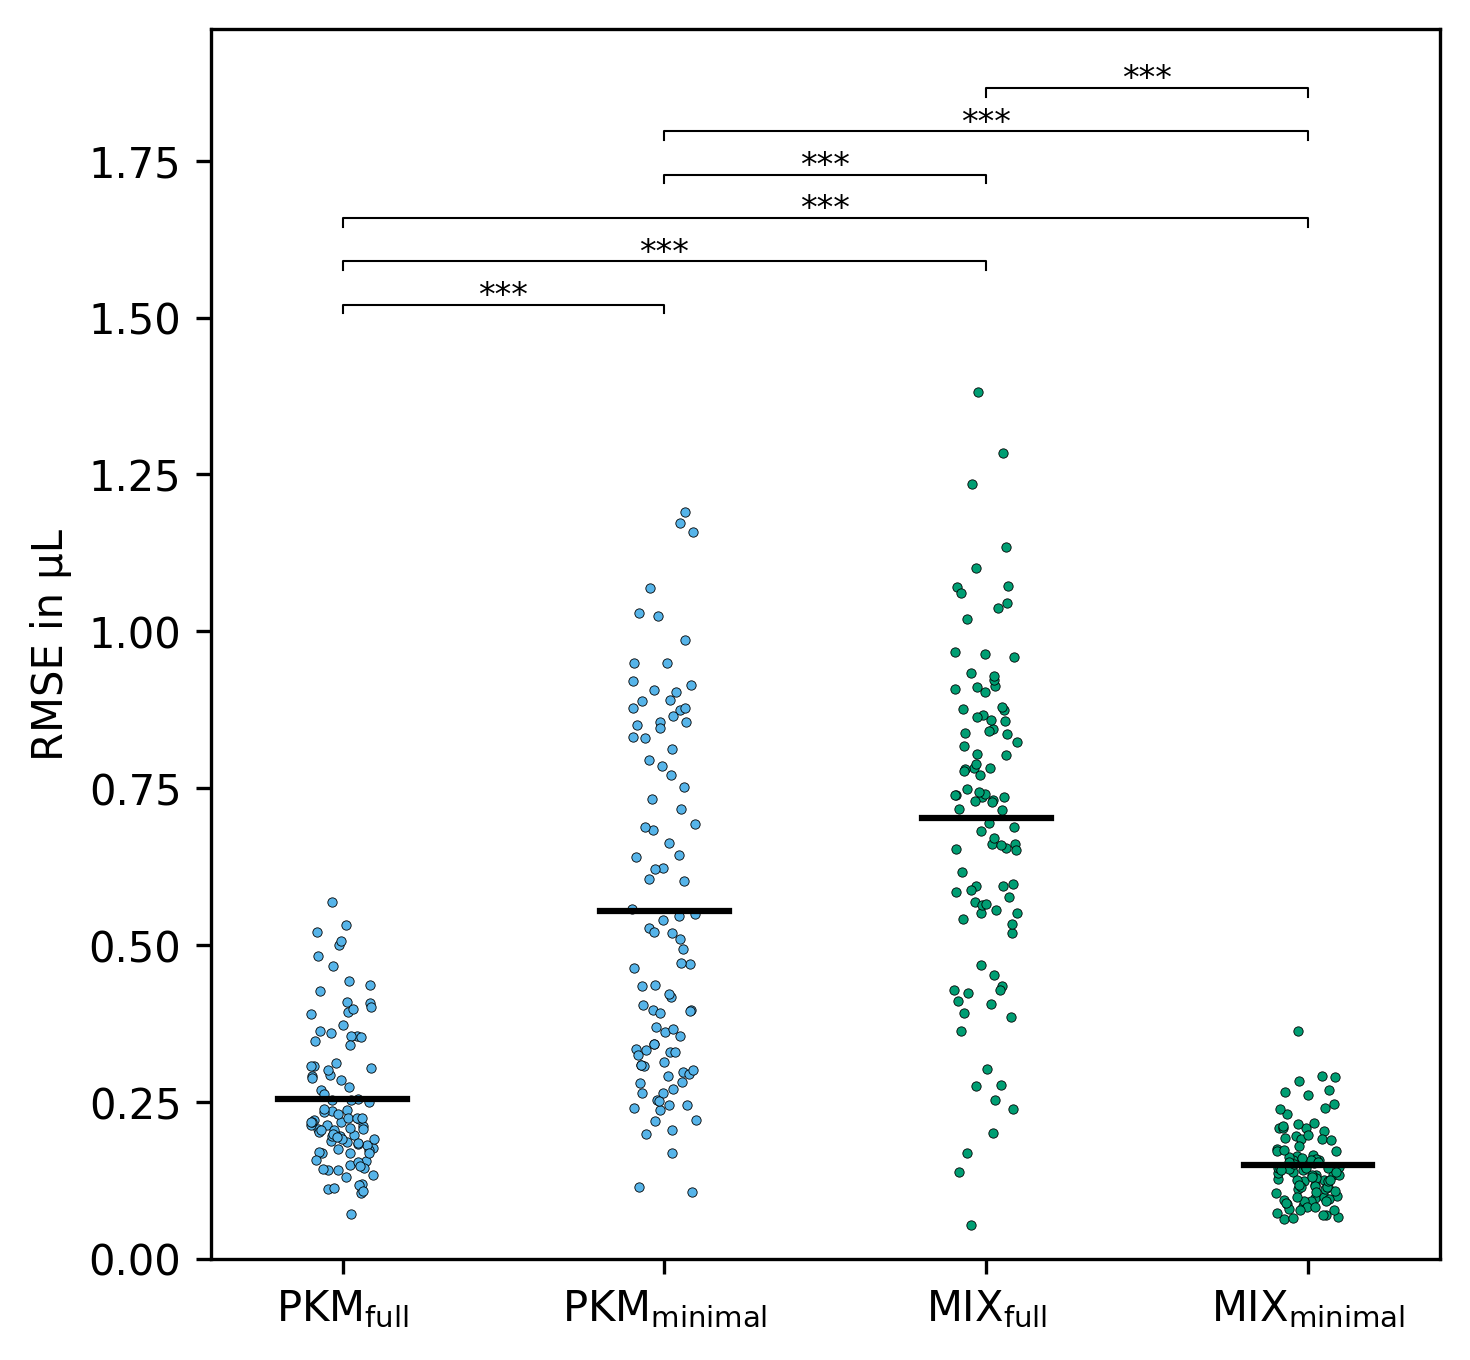

In [13]:
for path in ['v1','v2','v3']: # Figure S9, S10, 6
    print(path)# load data
    error_sigma   = .2
    n_metabolites = 60
    base          = 'synthetic_data/simulation_results'
    colors  = ['#E69F00','#56B4E9','#56B4E9','#009E73','#009E73']
    methods = ['PQN','PKM_full','PKM_mini','MIX_full','MIX_mini']
    with open(f'{base}/{path}_e_{error_sigma}_n_{n_metabolites}.pkl','rb') as file:
        results_time,results_sv,results_model,raw_values = pickle.load(file)

    labels  = [r'PKM$_{\rmfull}$',r'PKM$_{\rmminimal}$',r'MIX$_{\rmfull}$',r'MIX$_{\rmminimal}$']

    # plot figure
    plt.figure(dpi=300,figsize=(5,5))
    ax = plt.subplot(111,box_aspect=1)

    diagnosis_name = 'RMSE'
    nr,p_df = plot_performance(diagnosis_name,results_sv,with_pqn=False)

    plt.ylabel(diagnosis_name+' in μL')
    plt.plot(0,0,color='b',label='PQN')
    plt.plot(0,0,color='r',label='PKM')
    plt.plot(0,0,color='y',label='MIX')
    plt.xticks(range(1,nr),labels)
    plt.tight_layout()
    y_min,y_max = ax.get_ylim()
    x_min,x_max = ax.get_xlim()
    ax.set_ylim(0,y_max)
    ax.set_xlim(1+(4-x_max),x_max)
    plt.tight_layout()
    plt.show()

## Unused: Statistical Comparison of rRMSE

PQN        mean = 0.047 std = 0.009
PKM_full   mean = 0.076 std = 0.018
PKM_mini   mean = 0.278 std = 0.153
MIX_full   mean = 0.204 std = 0.131
MIX_mini   mean = 0.049 std = 0.010
------- P VALUES ------
PQN             PKM_full        1.74e-17 ***
PQN             PKM_mini        5.77e-18 ***
PQN             MIX_full        3.90e-18 ***
PQN             MIX_mini        2.87e-03 **
PKM_full        PKM_mini        1.14e-15 ***
PKM_full        MIX_full        3.90e-18 ***
PKM_full        MIX_mini        1.51e-16 ***
PKM_mini        MIX_full        3.23e-04 ***
PKM_mini        MIX_mini        9.04e-18 ***
MIX_full        MIX_mini        3.90e-18 ***


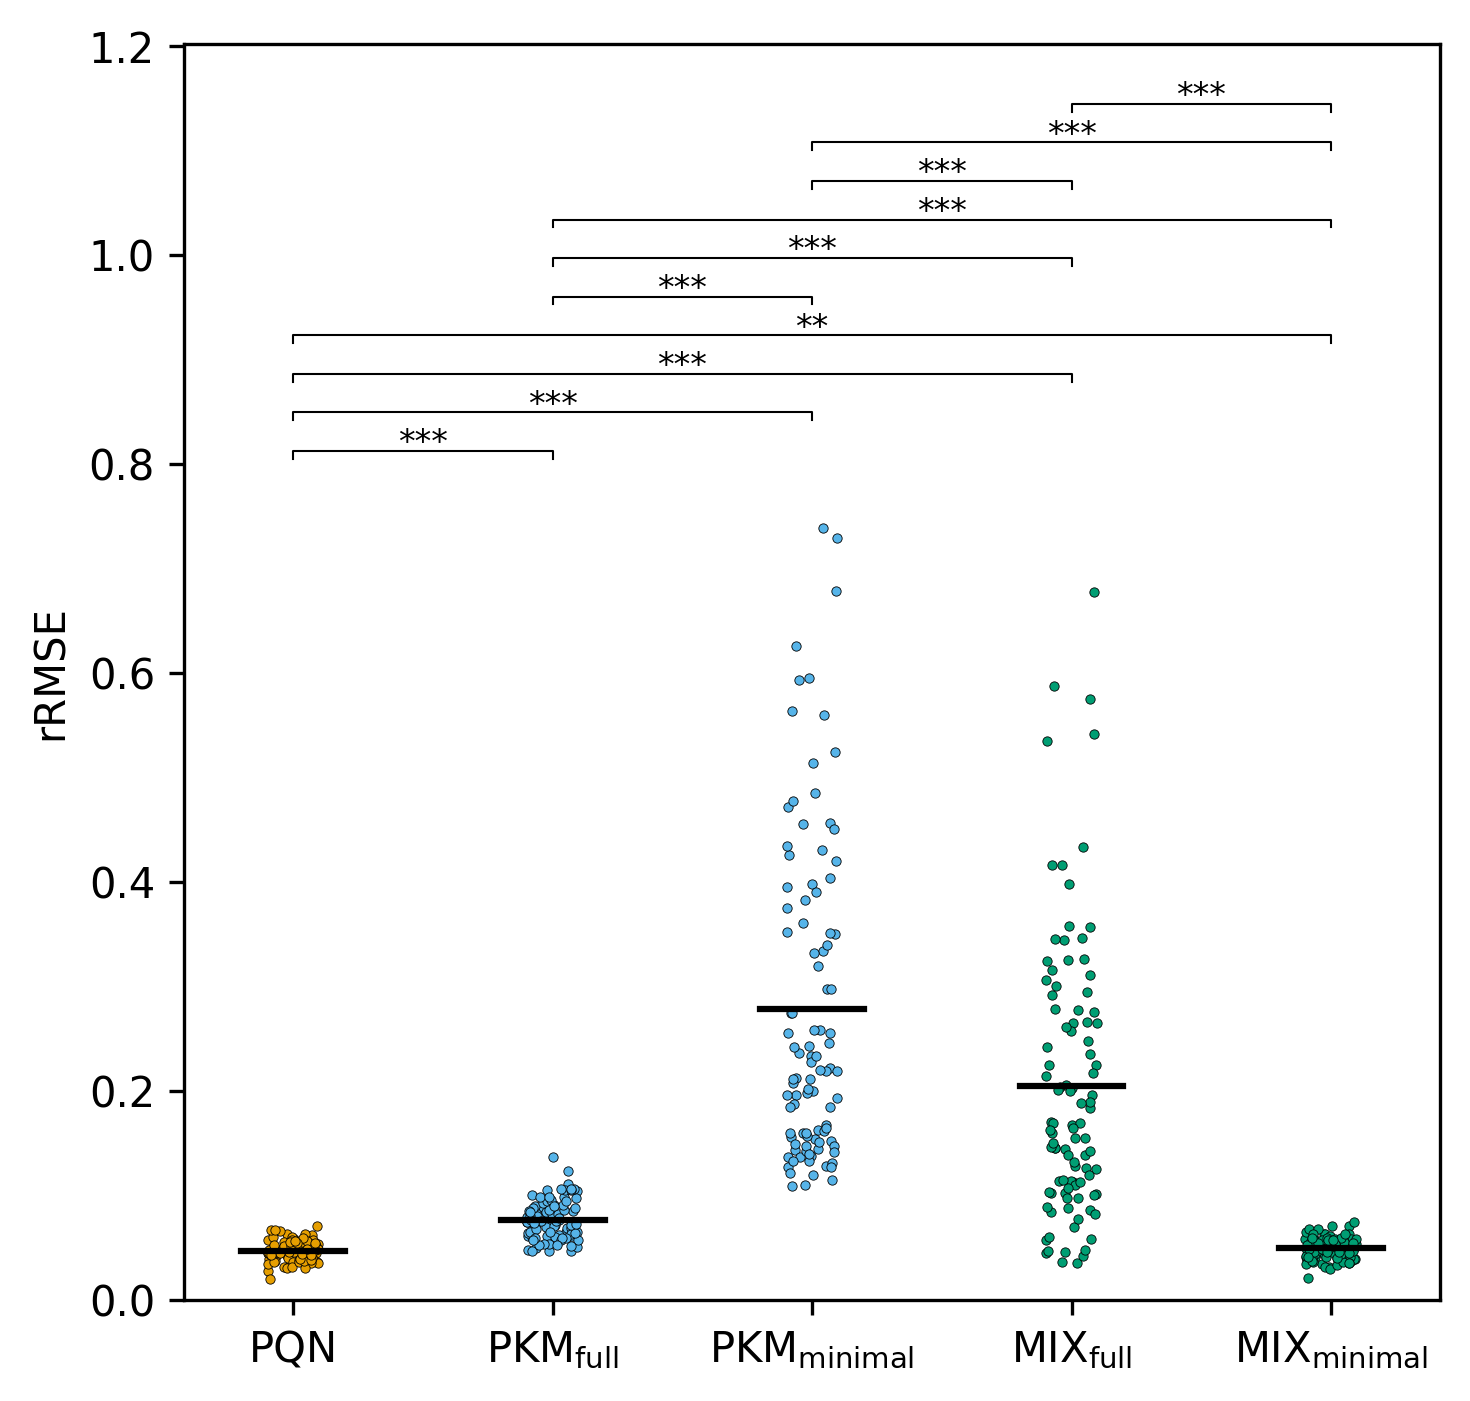

In [14]:
# load data
error_sigma   = .2
n_metabolites = 60
path          = 'v1' # v1, v2 also possible
base          = 'synthetic_data/simulation_results'
methods = ['PQN','PKM_full','PKM_mini','MIX_full','MIX_mini']    
labels  = ['PQN',r'PKM$_{\rmfull}$',r'PKM$_{\rmminimal}$',r'MIX$_{\rmfull}$',r'MIX$_{\rmminimal}$']

with open(f'{base}/{path}_e_{error_sigma}_n_{n_metabolites}.pkl','rb') as file:
    results_time,results_sv,results_model,raw_values = pickle.load(file)

# plot figure
plt.figure(dpi=300,figsize=(5,5))
ax = plt.subplot(111,box_aspect=1)

diagnosis_name = 'rRMSE'
nr, p_df = plot_performance(diagnosis_name,results_sv)

plt.ylabel(diagnosis_name)
plt.plot(0,0,color='b',label='PQN')
plt.plot(0,0,color='r',label='PKM')
plt.plot(0,0,color='y',label='MIX')
plt.xticks(range(nr),labels)
plt.tight_layout()
y_min,y_max = ax.get_ylim()
ax.set_ylim(0,y_max)
plt.tight_layout()
plt.show()

## Figure 7

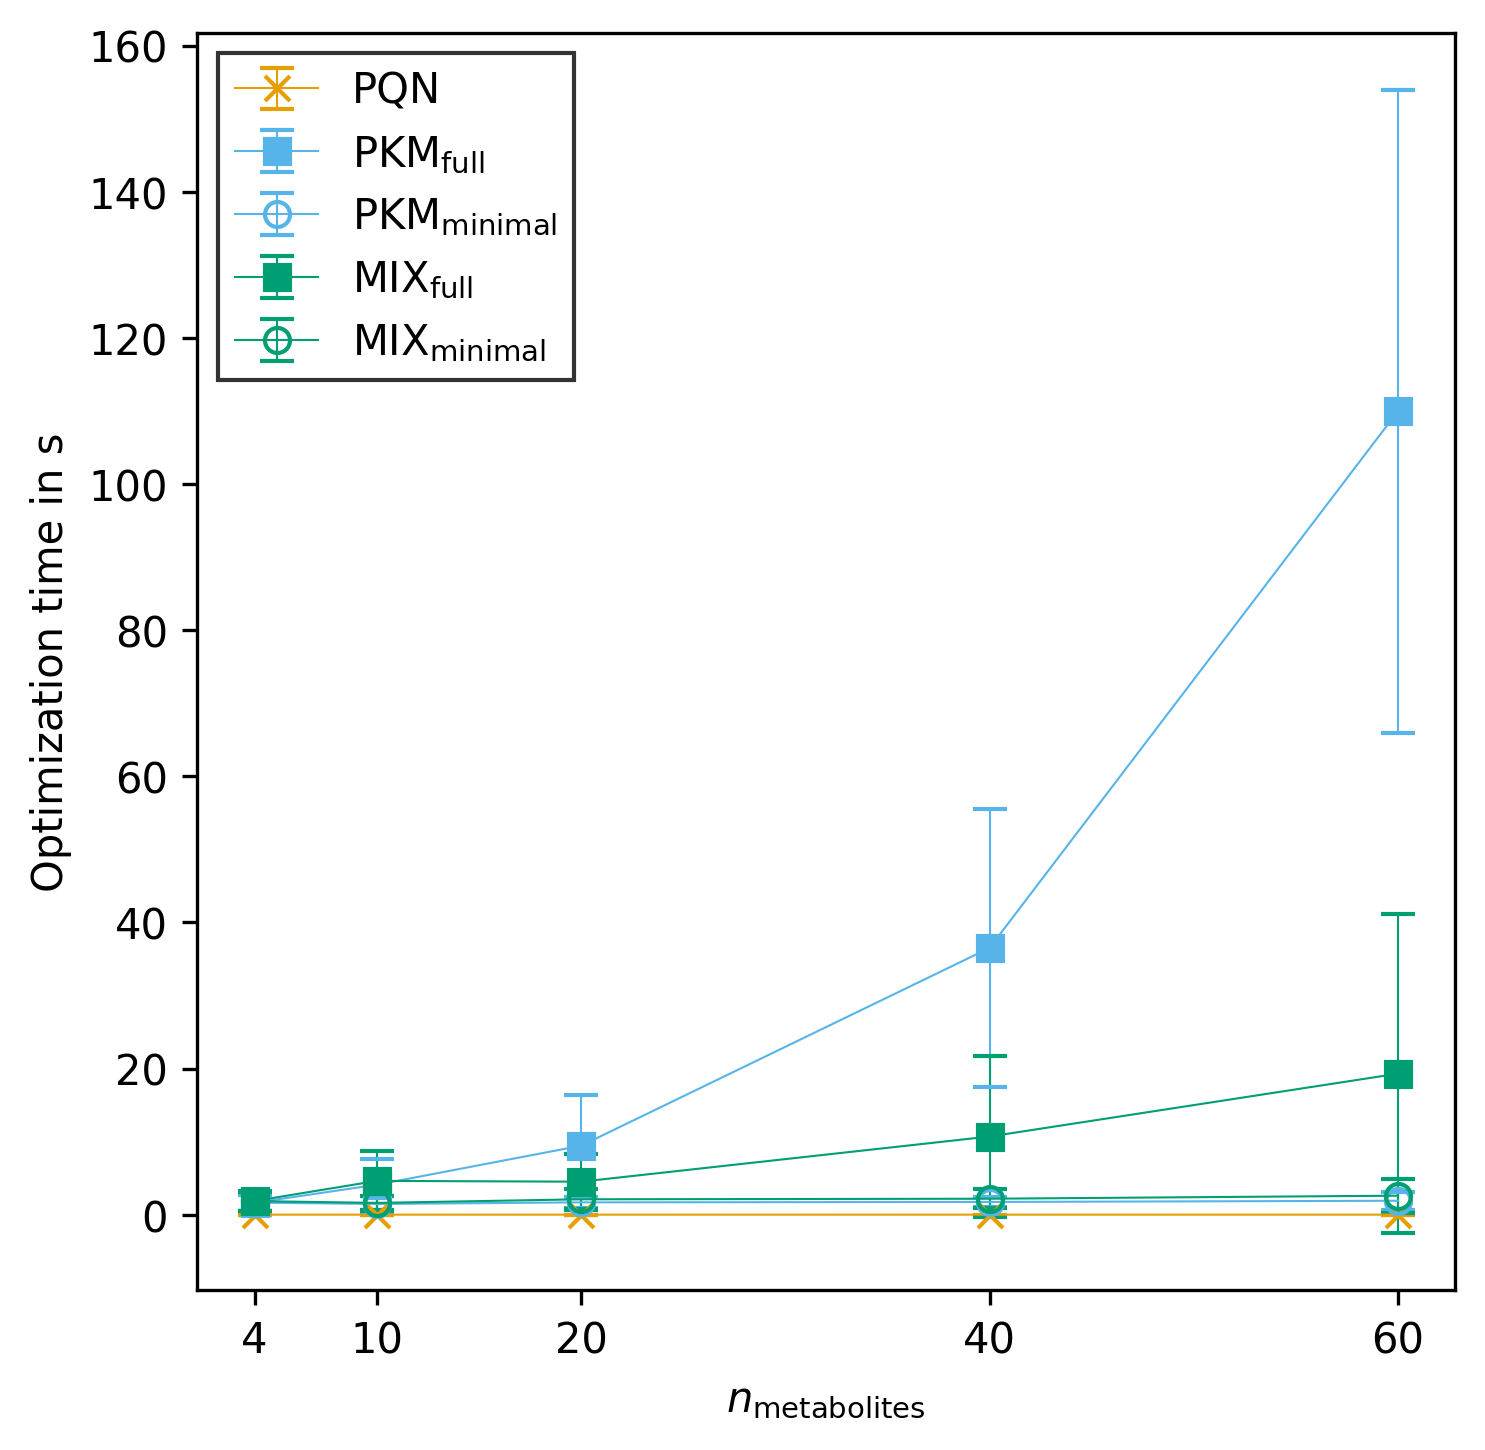

In [15]:
# load data
error_sigma   = .2
path          = 'v3' # you can also chose other simulations: v1, v2
base          = 'synthetic_data/simulation_results'
n_metabolites_list = np.array([4,10,20,40,60])
markers = ['x','s','o','s','o']
colors  = ['b','r','r','y','y']
colors  = ['#E69F00','#56B4E9','#56B4E9','#009E73','#009E73']
fcolors  = ['#E69F00','#56B4E9','none','#009E73','none']
methods = ['PQN','PKM_full','PKM_mini','MIX_full','MIX_mini']
labels  = ['PQN',r'PKM$_{\rmfull}$',r'PKM$_{\rmminimal}$',r'MIX$_{\rmfull}$',r'MIX$_{\rmminimal}$']

total_times = []
total_stds  = []
for n_metabolites in n_metabolites_list:
    with open(f'{base}/{path}_e_{error_sigma}_n_{n_metabolites}.pkl','rb') as file:
        results_time,results_sv,results_model,raw_values = pickle.load(file)
    tmp_times = []
    tmp_stds  = []
    for method in methods:
        tmp_times.append(np.mean(results_time[method]))
        tmp_stds.append(np.std(results_time[method]))
    total_times.append(tmp_times)
    total_stds.append(tmp_stds)
total_times = np.array(total_times)
total_stds  = np.array(total_stds)

# write out dataframes for means and stds 
time_results = pd.DataFrame(index=methods,columns=[f'{i} mean ' for i in n_metabolites_list]+[f'{i} stds ' for i in n_metabolites_list])
time_results.iloc[:,:len(n_metabolites_list)] = total_times.T
time_results.iloc[:,len(n_metabolites_list):] = total_stds.T

# plot figure
plt.figure(dpi=300,figsize=(5,5))
ax = plt.subplot(111,box_aspect=1)

for nr, label in enumerate(methods):
    plt.errorbar(n_metabolites_list,total_times[:,nr],yerr=total_stds[:,nr],color=colors[nr],marker=markers[nr],linewidth=.5,capsize=4,label=labels[nr],zorder=0,mfc=fcolors[nr])
plt.xticks(n_metabolites_list)
plt.xlabel(r'$n_{\rm metabolites}$')
plt.ylabel('Optimization time in s')

######## Concluding Commands
plt.legend(edgecolor='k',fancybox=False) # loc=(1.1,0),
plt.tight_layout()
plt.show()

## Figure 8

In [16]:
from matplotlib.gridspec import GridSpec

with open('synthetic_data/'+f'other_results/noisy_pqn.pkl','rb') as file:
    sv_v_list, results = pickle.load(file)
    
def cv(array):
    return np.std(array)/np.mean(array)

def lin(x,k):
    y = -k*x+k
    return y

def fn_to_nn(fn):
    '''
    Fraction of noisy datapoints to number of noisy metabolites. Number of non-noisy metabolites is 100.
    '''
    nn = 100*fn/(1-fn)
    # has to be int-ed for further processing
    return nn.astype(int)

def log10px(array,x=0):
    '''
    Calculates log10 of (array+x).
    -
    Input
    array    numpy.ndarray.
    x        float. default = 1e-8.
    '''
    return np.log10(array+x)

def log_mean_scaled(array):
    m = array-np.mean(array)
    return m

def standard_scale(array):
    z = (array-np.mean(array))/np.std(array)
    return z

def mean_scaled(array):
    m = array/np.mean(array)
    return m

def options_plot_identiy(*some_arrays,color='k',linestyle='--',linewidth=1,label=False):
    tmp_min = np.min(some_arrays)
    tmp_max = np.max(some_arrays)
    if label:
        plt.plot([tmp_min,tmp_max],[tmp_min,tmp_max],color=color,linestyle=linestyle,linewidth=linewidth,label='Identity')
    else:
        plt.plot([tmp_min,tmp_max],[tmp_min,tmp_max],color=color,linestyle=linestyle,linewidth=linewidth)

from scipy.optimize import curve_fit
from matplotlib import cm

fn = np.linspace(0,.95,20)
noise_levels = fn_to_nn(fn)

log_results = {}
for n_replicate in results:
    log_results[n_replicate] = {}
    for n_noise in results[n_replicate]:
        log_results[n_replicate][n_noise] = log10px(results[n_replicate][n_noise])
log_sv_v_list = log10px(sv_v_list)

comp_abs = {}
comp_sca = {}
for n_noise in [0]+noise_levels:
    comp_abs[n_noise] = []
    comp_sca[n_noise] = []

for n_replicate in log_results:
    tmp = log_results[n_replicate]
    for n_noise in tmp:
        comp_abs[n_noise].append(np.sum(np.abs(log_mean_scaled(tmp[n_noise])-log_mean_scaled(log_sv_v_list[n_replicate]))))
        comp_sca[n_noise].append(np.sum(np.abs(standard_scale(tmp[n_noise])-standard_scale(log_sv_v_list[n_replicate])))*np.std(log_sv_v_list))

abs_means = []
sca_means = []
abs_std = []
sca_std = []
for n_noise in comp_abs:
    abs_means.append(np.mean(comp_abs[n_noise]))
    sca_means.append(np.mean(comp_sca[n_noise]))
    abs_std.append(np.std(comp_abs[n_noise]))
    sca_std.append(np.std(comp_sca[n_noise]))

fn_list = np.array(list(comp_abs.keys()))/(100+np.array(list(comp_abs.keys())))

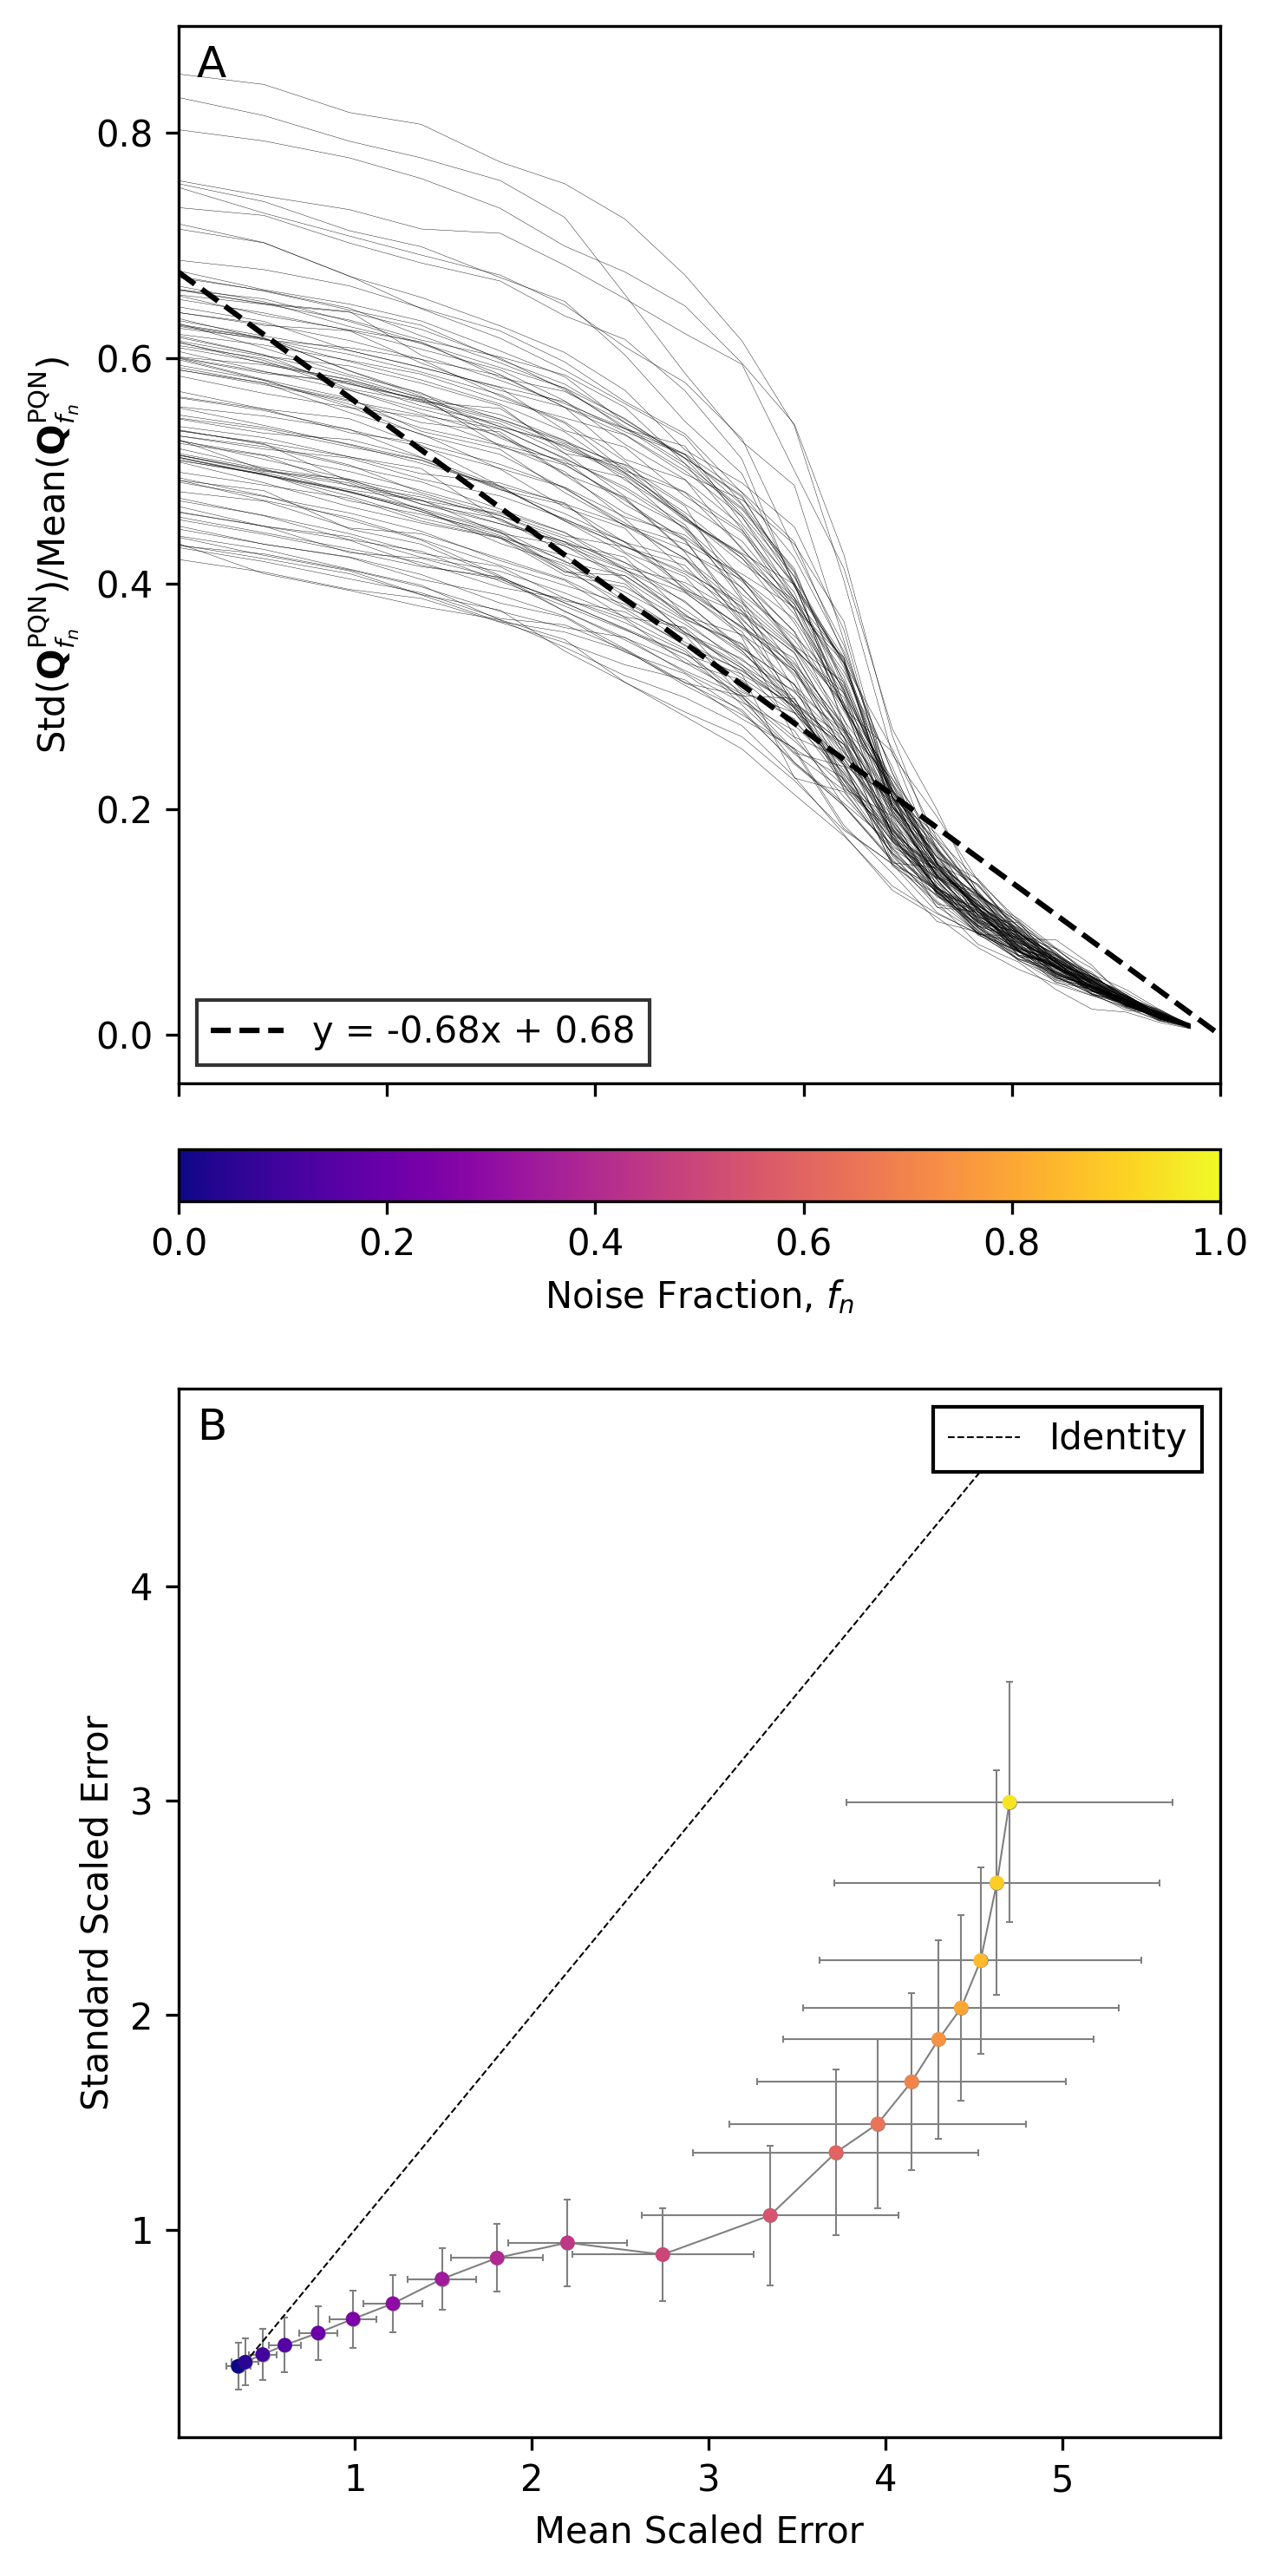

In [17]:
fig = plt.figure(dpi=300,figsize=(5,10))
total_size = 18
limit = 10
gs = GridSpec(total_size, 1, figure=fig)
ax1 = fig.add_subplot(gs[:limit, 0])
# plt.title(r'Steady Decline of CV as $f_n$ increases')
all_x = np.array([])
all_y = np.array([])
for n_replicate in results:
    n_noisy_features = []
    pqn_cv = []
    tmpPQN = results[n_replicate]
    for n_noise in tmpPQN:
        n_noisy_features.append(n_noise)
        pqn_cv.append(cv(tmpPQN[n_noise]))
        pass
    tmp_x = np.array(n_noisy_features)/(np.array(n_noisy_features)+n_metabolites-4)
    tmp_y = pqn_cv
    all_x = np.concatenate([all_x,tmp_x])
    all_y = np.concatenate([all_y,tmp_y])
    plt.plot(tmp_x,tmp_y,color='k',linewidth=.1)
    
p, cov = curve_fit(
    f = lin,
    xdata = all_x,
    ydata = all_y
)
syn_x = np.linspace(0,1,100)
syn_y = lin(syn_x,*p)
plt.plot(syn_x,syn_y,'k--',label='y = -{:.2f}x + {:.2f}'.format(p[0],p[0]))
plt.legend(edgecolor='k',fancybox=False,loc='lower left')
# plt.xlabel(r'Noise Fraction, $f_n$')
ax1.set_xticklabels([])
plt.ylabel(r'Std(${\bf{Q}}^{\rm PQN}_{f_n}$)/Mean(${\bf{Q}}^{\rm PQN}_{f_n}$)')
plt.colorbar(mappable=cm.ScalarMappable(cmap='plasma'),label=r'Noise Fraction, $f_n$',orientation="horizontal",pad=.05)
plt.xlim(0,1)

ax2 = fig.add_subplot(gs[limit:, 0])
plt.plot(abs_means,sca_means,color='grey',linewidth=.5)
for i in range(len(abs_means)):
    plt.errorbar(abs_means[i],sca_means[i],yerr=sca_std[i],xerr=abs_std[i],marker='.',zorder=0,color='grey',linewidth=.5,capsize=1,capthick=.5)
options_plot_identiy(abs_means,sca_means,linewidth=.5,label=True)
plt.xlabel('Mean Scaled Error')#\n'+r'$\sum |Z(\rm log_{10}~ Q^{\rm PQN}_{f_n})-Z(\rm log_{10}~ V_{\rm sweat})|$')
plt.ylabel('Standard Scaled Error')#\n'+r'$\sum |Z(\rm log_{10}~ Q^{\rm PQN}_{f_n})-Z(\rm log_{10}~ V_{\rm sweat})| \cdot \rm Std(\rm log_{10}~ V_{\rm sweat})$')
points = plt.scatter(abs_means,sca_means,marker='.',zorder=5,color=cm.plasma(fn_list))
plt.legend(edgecolor='k',fancybox=False,loc='upper right',facecolor='w',framealpha=1)
# ax1 = fig.add_subplot(gs[6:, 0])

import matplotlib.transforms as mtransforms
for name, ax in zip(['A','B'],[ax1,ax2]):
#     ax.set_title(name, loc='left', pad=-200)
    trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, name, transform=ax.transAxes + trans,
            fontsize='large', verticalalignment='top', fontfamily='sans',
            bbox=dict(facecolor='none', edgecolor='none', pad=3.0))


plt.tight_layout()
plt.show()

In [18]:
print(r'f_n where M(PQN) is better than Z(PQN):')
for i in fn_list[np.array(abs_means) < np.array(sca_means)]:
    print('{:.2f}'.format(i))
print(r'f_n where Z(PQN) is better than M(PQN):')
for i in fn_list[np.array(abs_means) > np.array(sca_means)]:
    print('{:.2f}'.format(i))

f_n where M(PQN) is better than Z(PQN):
0.00
0.05
f_n where Z(PQN) is better than M(PQN):
0.10
0.15
0.20
0.25
0.30
0.35
0.40
0.45
0.50
0.55
0.60
0.65
0.70
0.75
0.80
0.85
0.90
0.95


## Figure 9

In [19]:
f_n_list = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9]
p_df = pd.DataFrame(columns=['PQN'],index=f_n_list,dtype=np.float64)
path = 'v3'

for noise_fraction in f_n_list:
    with open(f'synthetic_data/other_results/comparison_with_noise_results/{path}_fn_{noise_fraction}.pkl','rb') as file:
        results_time,results_sv,results_model,raw_values = pickle.load(file)
        
    diagnosis_func = diagnosis[diagnosis_name]
    # list of all goodness of fit estimates
    tmp_pqn      = []
    tmp_em_full  = []
    tmp_mix_full = []
    tmp_em_mini  = []
    tmp_mix_mini = []
    # read out how many replicates there are in the dataset
    n_replicates = len(results_sv['PQN'])
    # loop over all replicates
    for n_replicate in range(n_replicates):
        sv_vector  = results_sv['TRUE'][n_replicate]
        # loop over all normalization methods
        for method, tmp_list in zip(methods,[tmp_pqn,tmp_em_full,tmp_em_mini,tmp_mix_full,tmp_mix_mini]):
            tmp_sv = results_sv[method][n_replicate]
            tmp_diagnosis = diagnosis_func(sv_vector,tmp_sv)
            tmp_list.append(tmp_diagnosis)

    nr = 0
    for method, tmp_list in zip(methods,[tmp_pqn,tmp_em_full,tmp_em_mini,tmp_mix_full,tmp_mix_mini]):
#         print('{:10} mean = {:5.3f} std = {:5.3f}'.format(method,np.mean(tmp_list),np.std(tmp_list)))
        nr += 1

    tmp_dic = {}
    tmp_loc = {}
    for nr_, (method, list_) in enumerate(zip(methods,[tmp_pqn,tmp_em_full,tmp_mix_full,tmp_em_mini,tmp_mix_mini ])):
        tmp_dic[method] = list_
        tmp_loc[method] = nr_
    j = 'MIX_mini'
#     print(noise_fraction)
    for i in tmp_dic.keys():
        if i == 'PQN':
            test_result = ss.wilcoxon(tmp_dic[i],tmp_dic['MIX_mini'],alternative='greater')
            print('f_n = {:3}, {:5} > {:15} {:8.2e} {}'.format(noise_fraction,i,j,test_result.pvalue,significance_star(test_result.pvalue)))
            p_df.loc[noise_fraction,i] = test_result.pvalue
        else:
            pass


f_n =   0, PQN   > MIX_mini        9.83e-01 -
f_n = 0.1, PQN   > MIX_mini        1.71e-08 ***
f_n = 0.2, PQN   > MIX_mini        2.99e-17 ***
f_n = 0.3, PQN   > MIX_mini        1.95e-18 ***
f_n = 0.4, PQN   > MIX_mini        1.95e-18 ***
f_n = 0.5, PQN   > MIX_mini        1.95e-18 ***
f_n = 0.6, PQN   > MIX_mini        1.95e-18 ***
f_n = 0.7, PQN   > MIX_mini        1.95e-18 ***
f_n = 0.8, PQN   > MIX_mini        2.37e-17 ***
f_n = 0.9, PQN   > MIX_mini        4.10e-10 ***


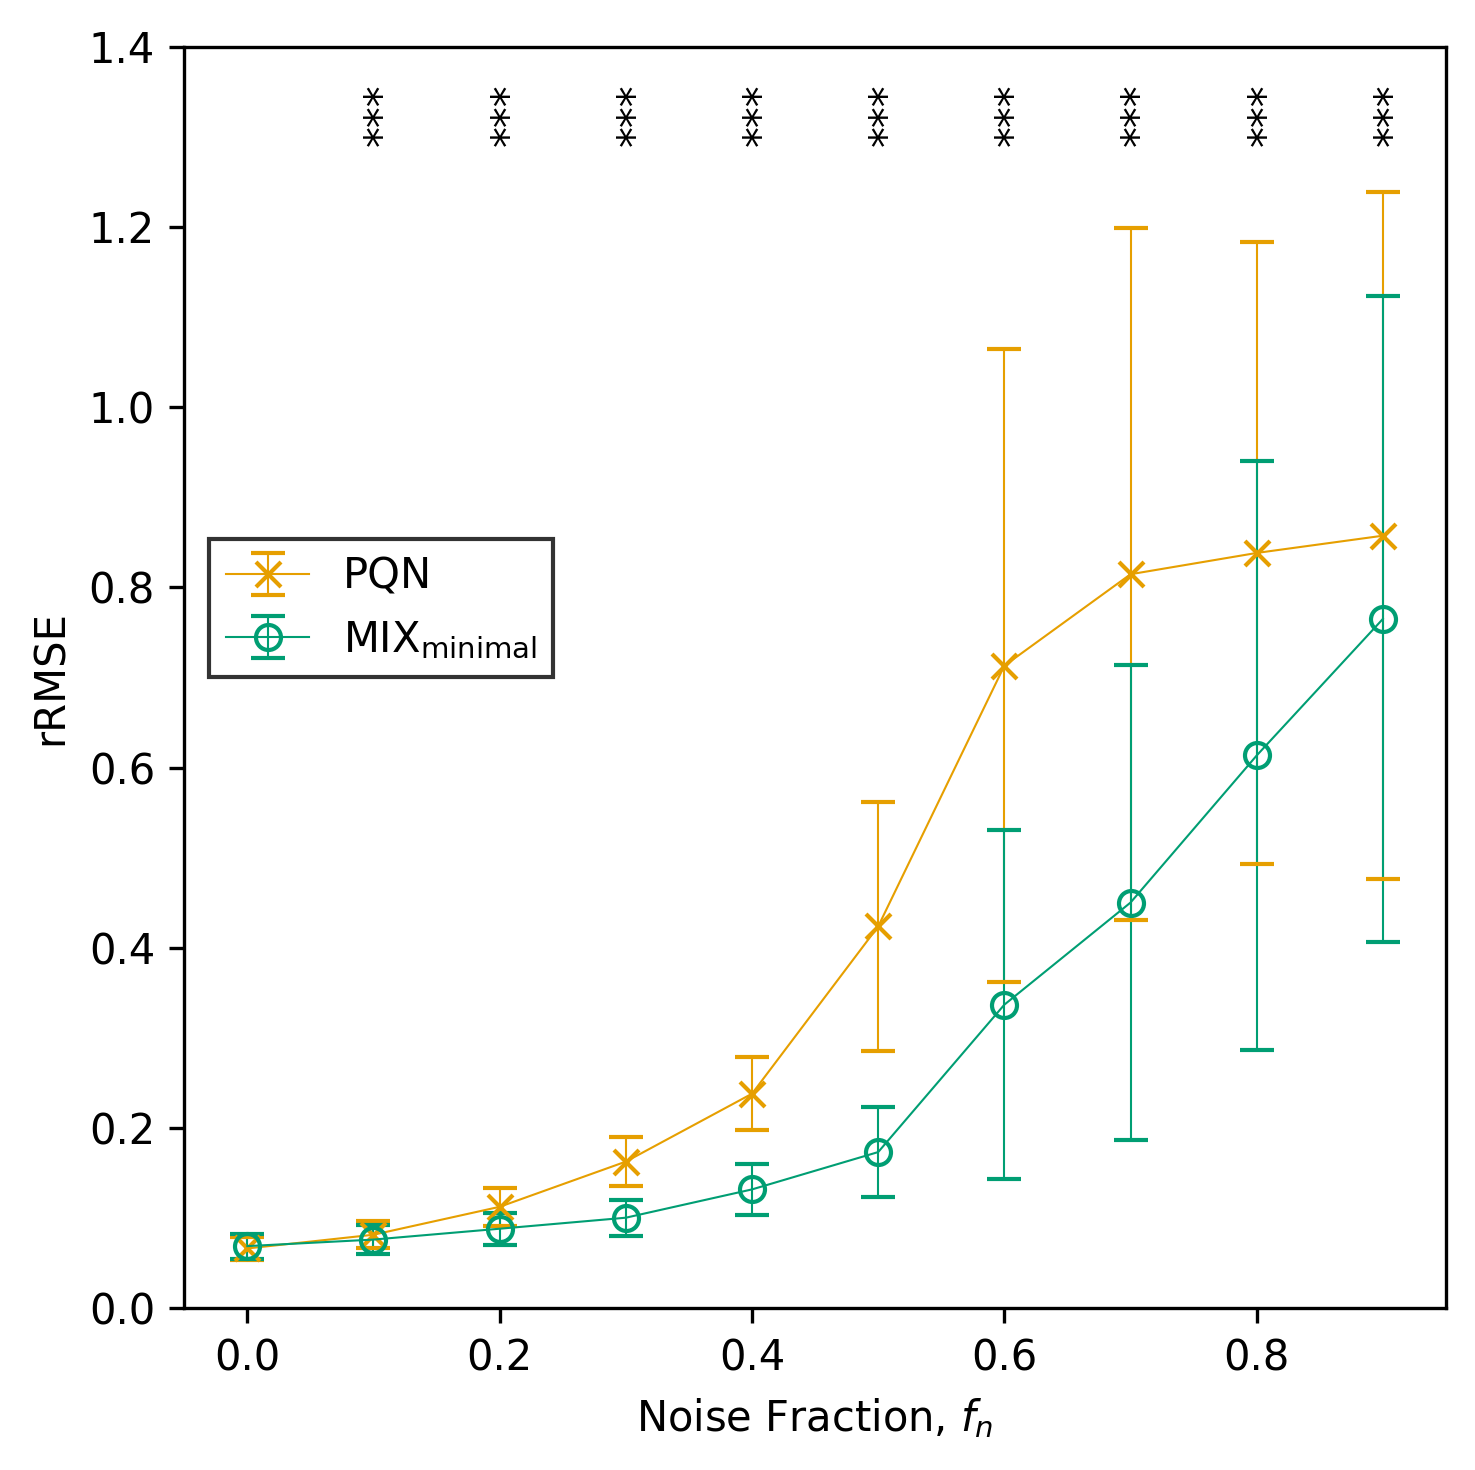

In [20]:
# load data
error_sigma   = .2
path          = 'v3' # v1 for Figure S6, v2 for Figure S7
base          = 'synthetic_data/other_results/comparison_with_noise_results'

plt.figure(dpi=300,figsize=(5,5))
    
markers = ['x','s','o','s','o']
colors  = ['#E69F00','#56B4E9','#56B4E9','#009E73','#009E73']
fcolors  = ['#E69F00','#56B4E9','none','#009E73','none']
methods = ['PQN','PKM_full','PKM_mini','MIX_full','MIX_mini']
labels  = ['PQN',r'PKM$_{\rmfull}$',r'PKM$_{\rmminimal}$',r'MIX$_{\rmfull}$',r'MIX$_{\rmminimal}$']

plt.subplot(111,box_aspect=1)
# plt.title('version = {} \nerror_sigma = {:.1f}'.format(path,error_sigma))
diagnosis_name = 'rRMSE'
plt.ylabel(f'rRMSE')
points = []
stds   = []
for noise_fraction in f_n_list:
    with open(f'{base}/{path}_fn_{noise_fraction}.pkl','rb') as file:
        results_time,results_sv,results_model,raw_values = pickle.load(file)
    tmp, std = plot_points(diagnosis_name,results_sv)
    points.append(tmp)
    stds.append(std)
points = np.array(points)
stds = np.array(stds)

# write out dataframes for means and stds 
# rSD_results = pd.DataFrame(index=methods,columns=[f'{path} {i} mean' for i in n_metabolites_list]+[f'{path} {i} std' for i in n_metabolites_list])
# rSD_results.iloc[:,:len(n_metabolites_list)] = points.T
# rSD_results.iloc[:,len(n_metabolites_list):] = stds.T

for nr, label in enumerate(methods):
    if label in ['PQN','MIX_mini']:
        plt.errorbar(f_n_list,points[:,nr],yerr=stds[:,nr],color=colors[nr],marker=markers[nr],linewidth=.5,capsize=4,label=labels[nr],mfc=fcolors[nr])
plt.xlabel(r'Noise Fraction, $f_n$')
# plt.xticks(f_n_list)
plt.ylim(0,1.4)
plt.xlim(-.05,.95)


for text, fn in zip([significance_star(i) if i < .1 else '' for i in p_df['PQN'].values],p_df.index):
    plt.text(fn-.009,1.3,text,rotation=90)



    ######## Concluding Commands
plt.legend(edgecolor='k',fancybox=False,loc=(0.02,.5))
plt.tight_layout()
plt.show()

# Brunmair_2021 Results

In [21]:
# parameter properties
donors = ['Donor_1','Donor_2', 'Donor_3', 'Donor_4', 'Donor_5', 'Donor_7', 'Donor_8', 'Donor_9', 'Donor_10', 'Donor_16', 'Donor_17', 'Donor_18', 'Donor_19', 'Donor_20', 'Donor_21', 'Donor_22', 'Donor_27', 'Donor_28', 'Donor_29', 'Donor_30', 'Donor_31', 'Donor_32', 'Donor_33', 'Donor_34', 'Donor_35', 'Donor_36', 'Donor_37', 'Donor_38', 'Donor_39', 'Donor_40', 'Donor_41', 'Donor_42', 'Donor_43', 'Donor_44', 'Donor_45', 'Donor_46', 'Donor_47']
metabolites = ['Paraxanthine','Theobromine','Theophylline']
def parse_results(path):
    best_parameters = {}
    for donor in donors:
        tmp_dic = {}
        for metabolite in metabolites:
            # read in file from the output data that was used in the manuscript
            with open(f'real_data/Brunmair_2021/{path}/{donor}_{metabolite}.txt','r') as file:
                lines  = file.readlines()
            parameters = []
            losses     = []
            for line in lines:
                tmp = []
                for l in line.split()[0:-1]:
                    tmp.append(float(l))
                parameters.append(tmp)
                losses.append(float(line.split()[-1]))

            # select fit with lowest loss
            if 'MIX' in path:
                best = parameters[np.argmin(losses)]
            elif 'PKM' in path:
                best = parameters[np.argmin(losses)]
            else:
                print('Parsing Error, could not identify model type. \n Either MIX or PKM should be in path.')
            tmp_dic[metabolite] = best
        best_parameters[donor] = tmp_dic
    return best_parameters

In [22]:
def get_stds(path,verbose=True):
    best_parameters = parse_results(path)
    stds = []
    for donor in donors:
        k = []
        for metabolite in metabolites:
            tmp = best_parameters[donor][metabolite]
            ka = tmp[0]
            ke = tmp[1]+tmp[2]
            k.append([ka,ke])
        k = np.array(k)
        stds.append(np.std(k,axis=0,ddof=1)) #/np.mean(k)
    stds = np.array(stds)
    if verbose:
        print('      ka         ke')
        print('mean',np.mean(stds,axis=0))
        print('std ',np.std( stds,axis=0,ddof=1))
    return stds

def calculate_significances(tmp_dic,tmp_loc):
    # significances
    maximum = 0
    for key in tmp_dic:
        if np.max(tmp_dic[key]) > maximum:
            maximum = np.max(tmp_dic[key])
    height          = maximum*1.1
    bracket_size    = .01
    text_offset     = .01
    height_increase = .05*maximum
    print('------- P VALUES ------')
    for i,j in combinations(tmp_dic.keys(),2):
#         test_result = ss.mannwhitneyu(tmp_dic[i],tmp_dic[j])
        test_result = ss.wilcoxon(tmp_dic[i],tmp_dic[j],alternative='greater')
        print('{:15} {:15} {:8.2e} {}'.format(i,j,test_result.pvalue,significance_star(test_result.pvalue)))
        if test_result.pvalue <= .05:
                plt.plot(np.array([tmp_loc[i],tmp_loc[i],tmp_loc[j],tmp_loc[j]]),
                         [height-maximum*bracket_size,height,height,height-maximum*bracket_size],
                         'k',
                         linewidth=.5
                        )
                plt.text(np.mean([tmp_loc[i],tmp_loc[j]]),
                         height+maximum*text_offset,
                         significance_star(test_result.pvalue),
                         ha='center',
                         va='center',
                         fontsize=8
                        )
                height += height_increase

In [23]:
def get_deviations(path):
    best_parameters = parse_results(path)
    abs_devs = []
    rel_devs = []
    for donor in donors:
        k = []
        for metabolite in metabolites:
            tmp = best_parameters[donor][metabolite]
            ka = tmp[0]
            ke = tmp[1]+tmp[2]
            k.append([ka,ke])
        k = np.array(k)
        means = np.mean(k,axis=0)
        rel_devs.append((k-means[None,:])/means[None,:])
        abs_devs.append((k-means[None,:]))
    rel_devs = np.array(rel_devs)
    abs_devs = np.array(abs_devs)
    return rel_devs,abs_devs

In [24]:
def caf(tt,k1,k2,k3,k4,xxx0):
    y = ((-np.exp(-(k3+k2)*tt)+np.exp(-k1*tt))*k1)/(k3+k2-k1)
    return y

def xxx(tt,k1,k2,k3,k4,xxx0):
    y = (np.exp(-(k1+k4)*tt)*(-np.exp(k4*tt)*k2*k1*(k3+k2-k4)+np.exp((-k3-k2+k1+k4)*tt)*k2*k1*(k1-k4)-np.exp(k1*tt)*(-k3-k2+k1)*((k3-k4)*(k1-k4)*xxx0+k2*(k1+k1*xxx0-k4*xxx0))))/((k3+k2-k1)*(k3+k2-k4)*(k1-k4))
    return y

In [25]:
path_list  = ['PKM_sub_2','MIX_sub_2']
label_list = [r'PKM$_{\rm minimal}$',r'MIX$_{\rm minimal}$']
colors  = ['#56B4E9','#009E73','#009E73']
titles = [r'$k_a^{\rmcaf}$',r'$k_e^{\rmcaf}$']

# parse data
s_list = []
rel_dev_dic = {}
for path in path_list:
    print(path)
    rel_devs,abs_devs = get_deviations(path)
    rel_dev_dic[path] = rel_devs
    
pkm_devs = rel_dev_dic['PKM_sub_2']
# take the absolute deviations
pkm_abs = np.abs(pkm_devs)
# take the mean of the three subnetworks
pkm_means = np.mean(pkm_abs,axis=1)
# sum over ka and ke
pkm_sums = np.sum(pkm_means,axis=1)
# this is of shape len(donors)
mix_devs = rel_dev_dic['MIX_sub_2']
# take the absolute deviations
mix_abs = np.abs(mix_devs)
# take the mean of the three subnetworks
mix_means = np.mean(mix_abs,axis=1)
# sum over ka and ke
mix_sums = np.sum(mix_means,axis=1)
# this is of shape len(donors)

# difference between PKM and MIX
diff = pkm_sums-mix_sums
# check where the median difference is
index = np.where(diff==np.median(diff))[0][0]
# median donor
median_donor = donors[index]
print(median_donor)

PKM_sub_2
MIX_sub_2
Donor_38


## Figure 10 left hand side

PKM_sub_2
      ka         ke
mean [1.38791127 0.01574789]
std  [1.53916923 0.01029908]
MIX_sub_2
      ka         ke
mean [0.50849125 0.00880997]
std  [0.81331516 0.00993634]
------- P VALUES ------
PKM_sub_2       MIX_sub_2       5.75e-04 ***
------- P VALUES ------
PKM_sub_2       MIX_sub_2       1.51e-05 ***


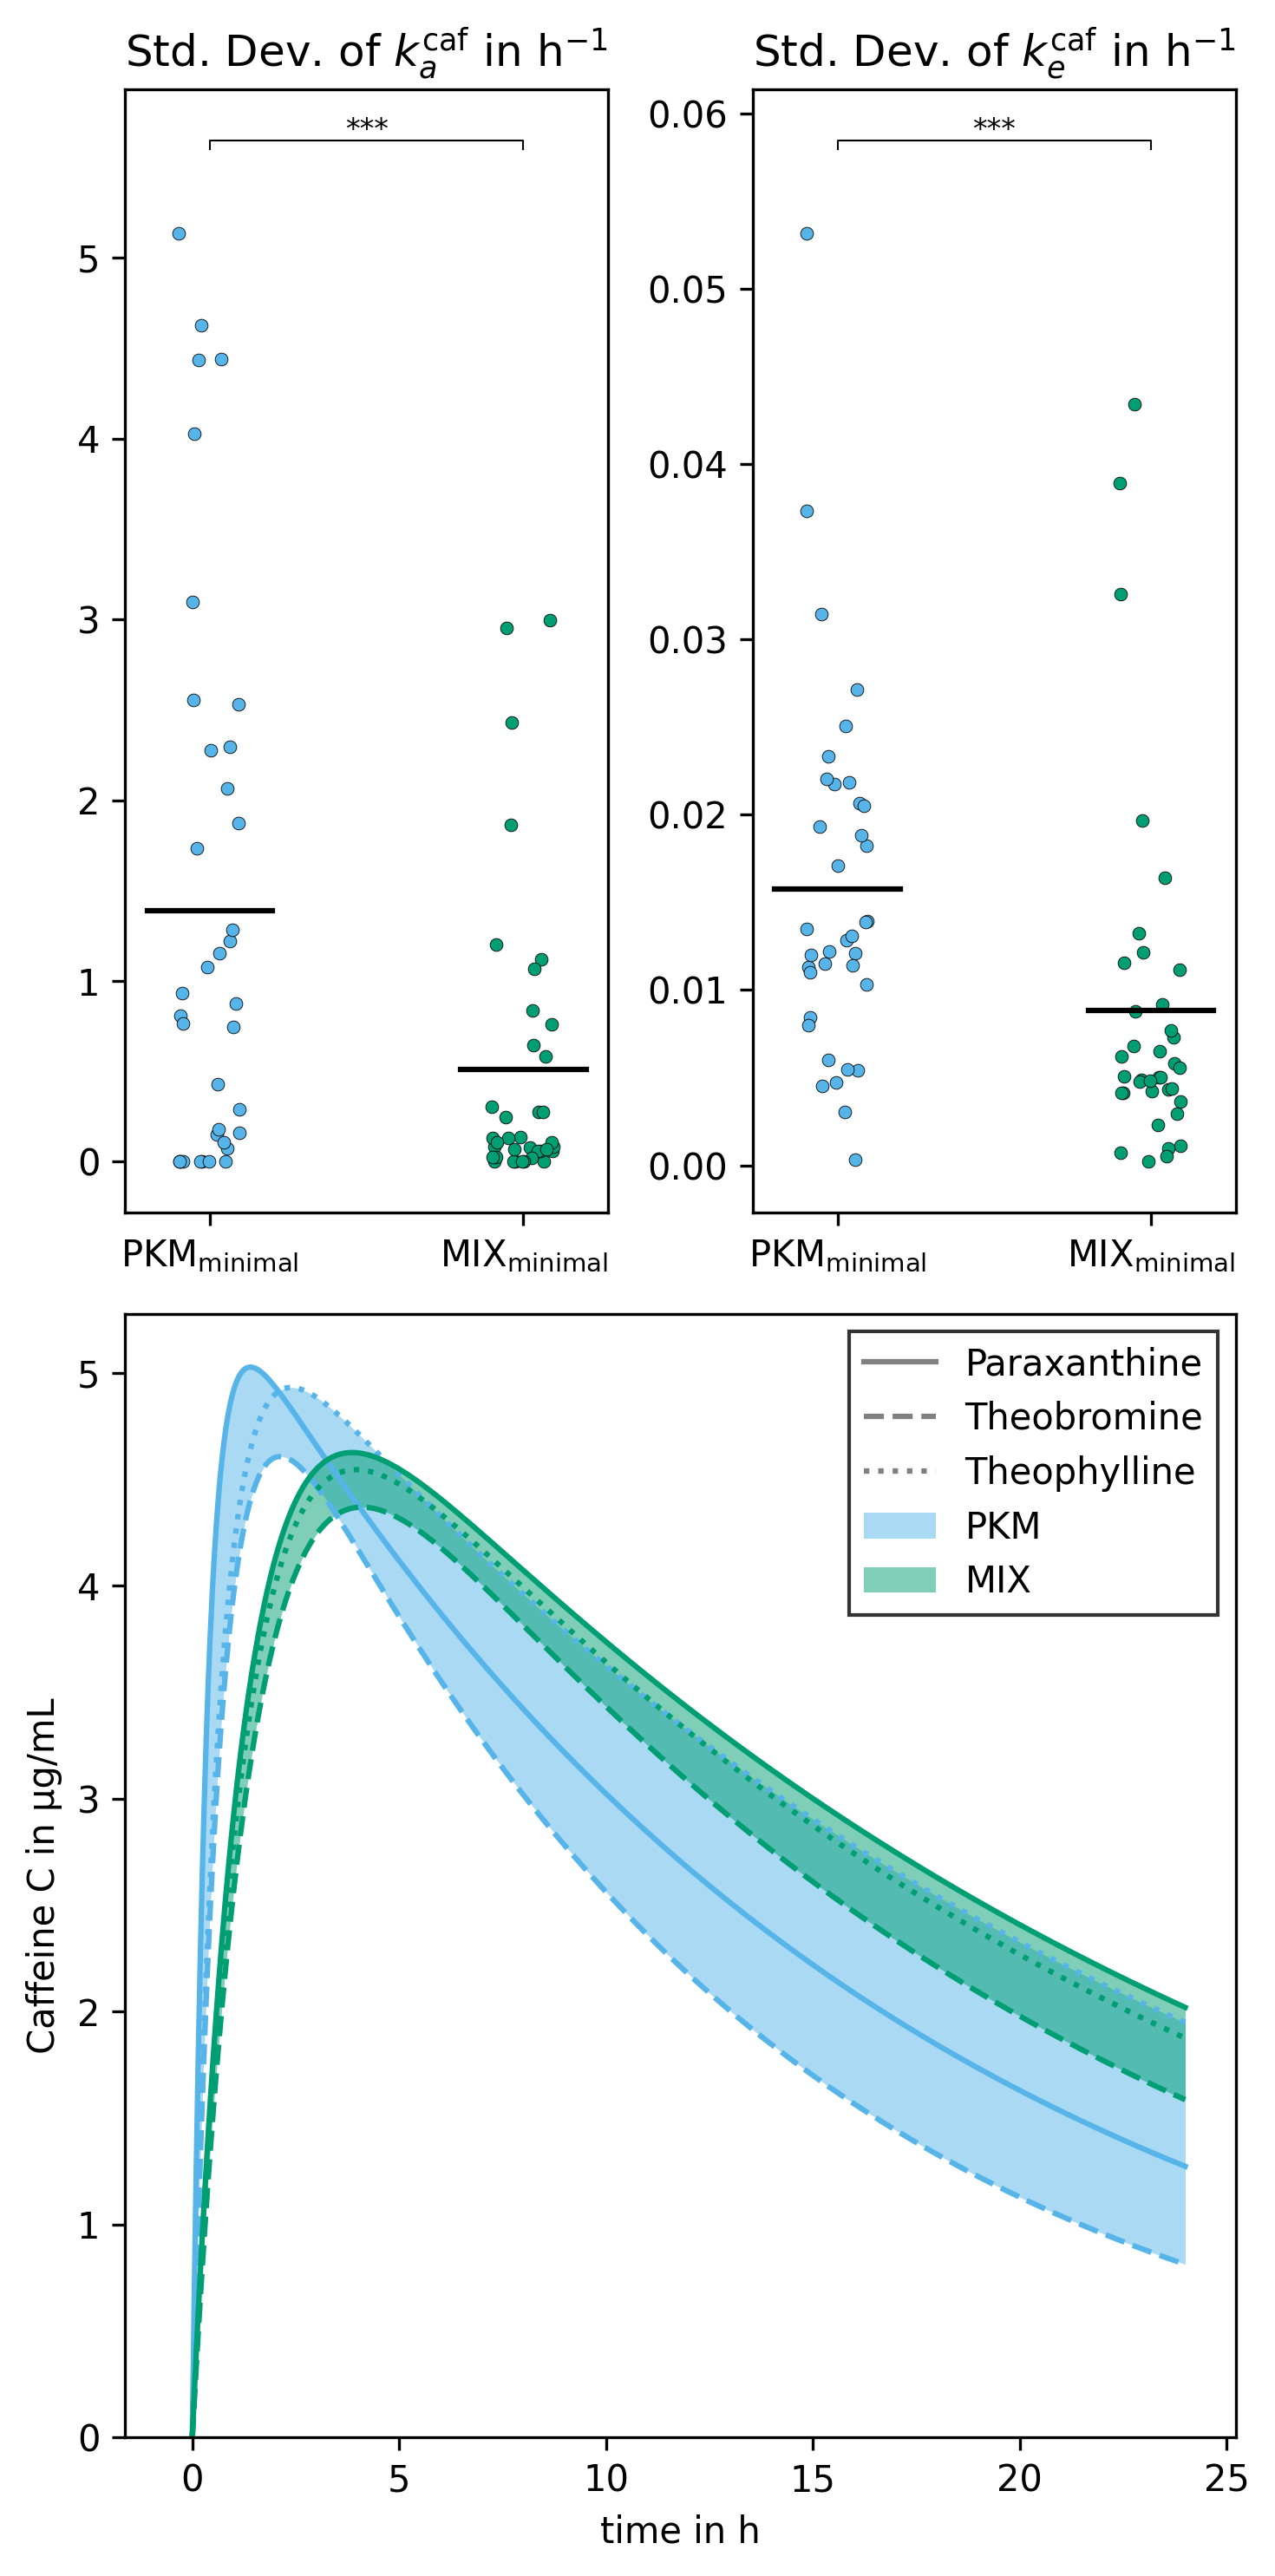

In [26]:
from matplotlib.gridspec import GridSpec

width = .1

path_list  = ['PKM_sub_2','MIX_sub_2']
label_list = [r'PKM$_{\rm minimal}$',r'MIX$_{\rm minimal}$']
colors  = ['#56B4E9','#009E73','#009E73']
titles = [r'$k_a^{\rmcaf}$',r'$k_e^{\rmcaf}$']

# parse data
s_list = []
for path in path_list:
    print(path)
    s_list.append(get_stds(path))

# generate random numbers to make the datapoints more spread out
np.random.seed(13)
rand = np.random.uniform(-width,width,s_list[0].shape[0])

# start figure
fig = plt.figure(dpi=300,figsize=(5,10))
gs = GridSpec(4, 2, figure=fig)

# subplot 1: ka
ax1 = fig.add_subplot(gs[:2, 0])
ax1.set_title(r'Std. Dev. of $k_a^{\rmcaf}$ in h$^{-1}$')
# ax1.set_title(titles[0])
tmp_dic = {}
tmp_loc = {}
for nr in range(len(path_list)):
    tmp_s = s_list[nr]
    ax1.scatter(np.ones(tmp_s.shape[0])*nr+rand,tmp_s[:,0], marker='.',s=50,edgecolor='k',linewidth=.2,color=colors[nr])
    ax1.plot([nr-.2,nr+.2], [np.mean(tmp_s[:,0]), np.mean(tmp_s[:,0])],color='k')
    tmp_dic[path_list[nr]] = tmp_s[:,0]
    tmp_loc[path_list[nr]] = nr

calculate_significances(tmp_dic,tmp_loc)
ax1.set_xticks(range(len(path_list)))
ax1.set_xticklabels(label_list)
fig.tight_layout()

# subplot 2: ke
ax2 = fig.add_subplot(gs[:2, 1])
ax2.set_title(r'Std. Dev. of $k_e^{\rmcaf}$ in h$^{-1}$')
tmp_dic = {}
tmp_loc = {}
for nr in range(len(path_list)):
    tmp_s = s_list[nr]
    ax2.scatter(np.ones(tmp_s.shape[0])*nr+rand,tmp_s[:,1], marker='.',s=50,edgecolor='k',linewidth=.2,color=colors[nr])
    ax2.plot([nr-.2,nr+.2], [np.mean(tmp_s[:,1]), np.mean(tmp_s[:,1])],color='k')
    tmp_dic[path_list[nr]] = tmp_s[:,1]
    tmp_loc[path_list[nr]] = nr
calculate_significances(tmp_dic,tmp_loc)
ax2.set_xticks(range(len(path_list)))
ax2.set_xticklabels(label_list)
fig.tight_layout()

# subplot 3
ax3 = fig.add_subplot(gs[2:,:])
syn_x = np.linspace(0,24,1000)
colors  = ['#56B4E9','#009E73']
styles = {'Paraxanthine':'-','Theobromine':'--','Theophylline':':'}
vdist_avail = 0.579                                        # volume of distribution/ bioavailability of caffeine
dose        = 200*10**3                                    # caffeine dose in µg
body_mass   = {'Donor_16': 72, 'Donor_6': 83, 'Donor_19': 83, 'Donor_17': 52, 'Donor_18': 66, 'Donor_7': 66, 'Donor_3': 57, 'Donor_4': 84, 'Donor_5': 82.5, 'Donor_2': 77, 'Donor_8': 80, 'Donor_9': 83, 'Donor_10': 55, 'Donor_11': 54, 'Donor_1': 70, 'Donor_20': 105, 'Donor_21': 70, 'Donor_22': 64, 'Donor_23': 57, 'Donor_24': 60, 'Donor_25': 80, 'Donor_26': 86, 'Donor_27': 68, 'Donor_28': 82, 'Donor_29': 60, 'Donor_30': 55, 'Donor_31': 80, 'Donor_32': 92, 'Donor_33': 92, 'Donor_34': 71, 'Donor_35': 80, 'Donor_36': 77, 'Donor_37': 66, 'Donor_38': 63, 'Donor_39': 75, 'Donor_40': 75, 'Donor_41': 57, 'Donor_42': 75, 'Donor_43': 99, 'Donor_44': 75, 'Donor_45': 61, 'Donor_46': 52, 'Donor_47': 80}
factor      = dose/(body_mass[median_donor]*vdist_avail*1000)
for path in path_list:
    if 'MIX' in path:
        color = colors[1]
    else:
        color = colors[0]
    best_parameters = parse_results(path)
    curves = []
    for best in best_parameters[median_donor]:
        plt.plot(syn_x,caf(syn_x,*best_parameters[median_donor][best][:5])*factor,color=color,linestyle=styles[best])
        curves.append(caf(syn_x,*best_parameters[median_donor][best][:5])*factor)
    min_ = []
    max_ = []
    for a,b,c in zip(curves[0],curves[1],curves[2]):
        min_.append(np.min([a,b,c]))
        max_.append(np.max([a,b,c]))
    area = plt.fill_between(syn_x,min_,max_,color=color,linewidth=0,alpha=.5)
# legend
ax3.bar(0,0,color=colors[0],label='PKM',alpha=.5)
ax3.bar(0,0,color=colors[1],label='MIX',alpha=.5)
ax3.plot(0,0,color='grey',linestyle='-',label='Paraxanthine')
ax3.plot(0,0,color='grey',linestyle='--',label='Theobromine')
ax3.plot(0,0,color='grey',linestyle=':',label='Theophylline')
ax3.legend(fancybox=False,edgecolor='k')
ax3.set_ylabel('Caffeine C in µg/mL')
ax3.set_xlabel('time in h')

# wrap up
plt.tight_layout()
plt.show()

# Panitchpakdi_2021 Results

In [27]:
import extended_model as em
import pickle

In [28]:
with open('real_data/Panitchpakdi_2021/Sub_2_plasma.pkl','rb') as file:
    results = pickle.load(file)

In [29]:
mix_ka_stds = []
mix_ke_stds = []
pkm_ka_stds = []
pkm_ke_stds = []
mix_devs = []
pkm_devs = []
for donor in results:
    mix_ka = []
    mix_ke = []
    pkm_ka = []
    pkm_ke = []
    for metabolite in results[donor]:
        mix, pkm, factors = results[donor][metabolite]
        mix_ka.append(mix.get_kinetic_parameters()[0])
        mix_ke.append(mix.get_kinetic_parameters()[1])
        pkm_ka.append(pkm.get_kinetic_parameters()[0])
        pkm_ke.append(pkm.get_kinetic_parameters()[1])
    mix_ka_stds.append(np.std(mix_ka,ddof=1))
    mix_ke_stds.append(np.std(mix_ke,ddof=1))
    pkm_ka_stds.append(np.std(pkm_ka,ddof=1))
    pkm_ke_stds.append(np.std(pkm_ke,ddof=1))
    
#     mix_ka_stds.append(np.std(mix_ka,ddof=1)/np.mean(mix_ka))
#     mix_ke_stds.append(np.std(mix_ke,ddof=1)/np.mean(mix_ke))
#     pkm_ka_stds.append(np.std(pkm_ka,ddof=1)/np.mean(pkm_ka))
#     pkm_ke_stds.append(np.std(pkm_ke,ddof=1)/np.mean(pkm_ke))

    mix_devs.append(np.sum(([np.abs(np.array(mix_ka)-np.mean(mix_ka)),np.abs(np.array(mix_ke)-np.mean(mix_ke))])))
    pkm_devs.append(np.sum(([np.abs(np.array(pkm_ka)-np.mean(pkm_ka)),np.abs(np.array(pkm_ke)-np.mean(pkm_ke))])))
    
# difference between PKM and MIX
diff = np.array(pkm_devs)-np.array(mix_devs)
# check where the median difference is
index = np.argmin(np.abs(diff-np.median(diff)))
# median donor
median_donor = list(results.keys())[index]
print(median_donor)

191007


## Figure 10 right hand side

------- P VALUES ------
PKM_sub_2       MIX_sub_2       1.95e-03 **
------- P VALUES ------
PKM_sub_2       MIX_sub_2       3.22e-02 *


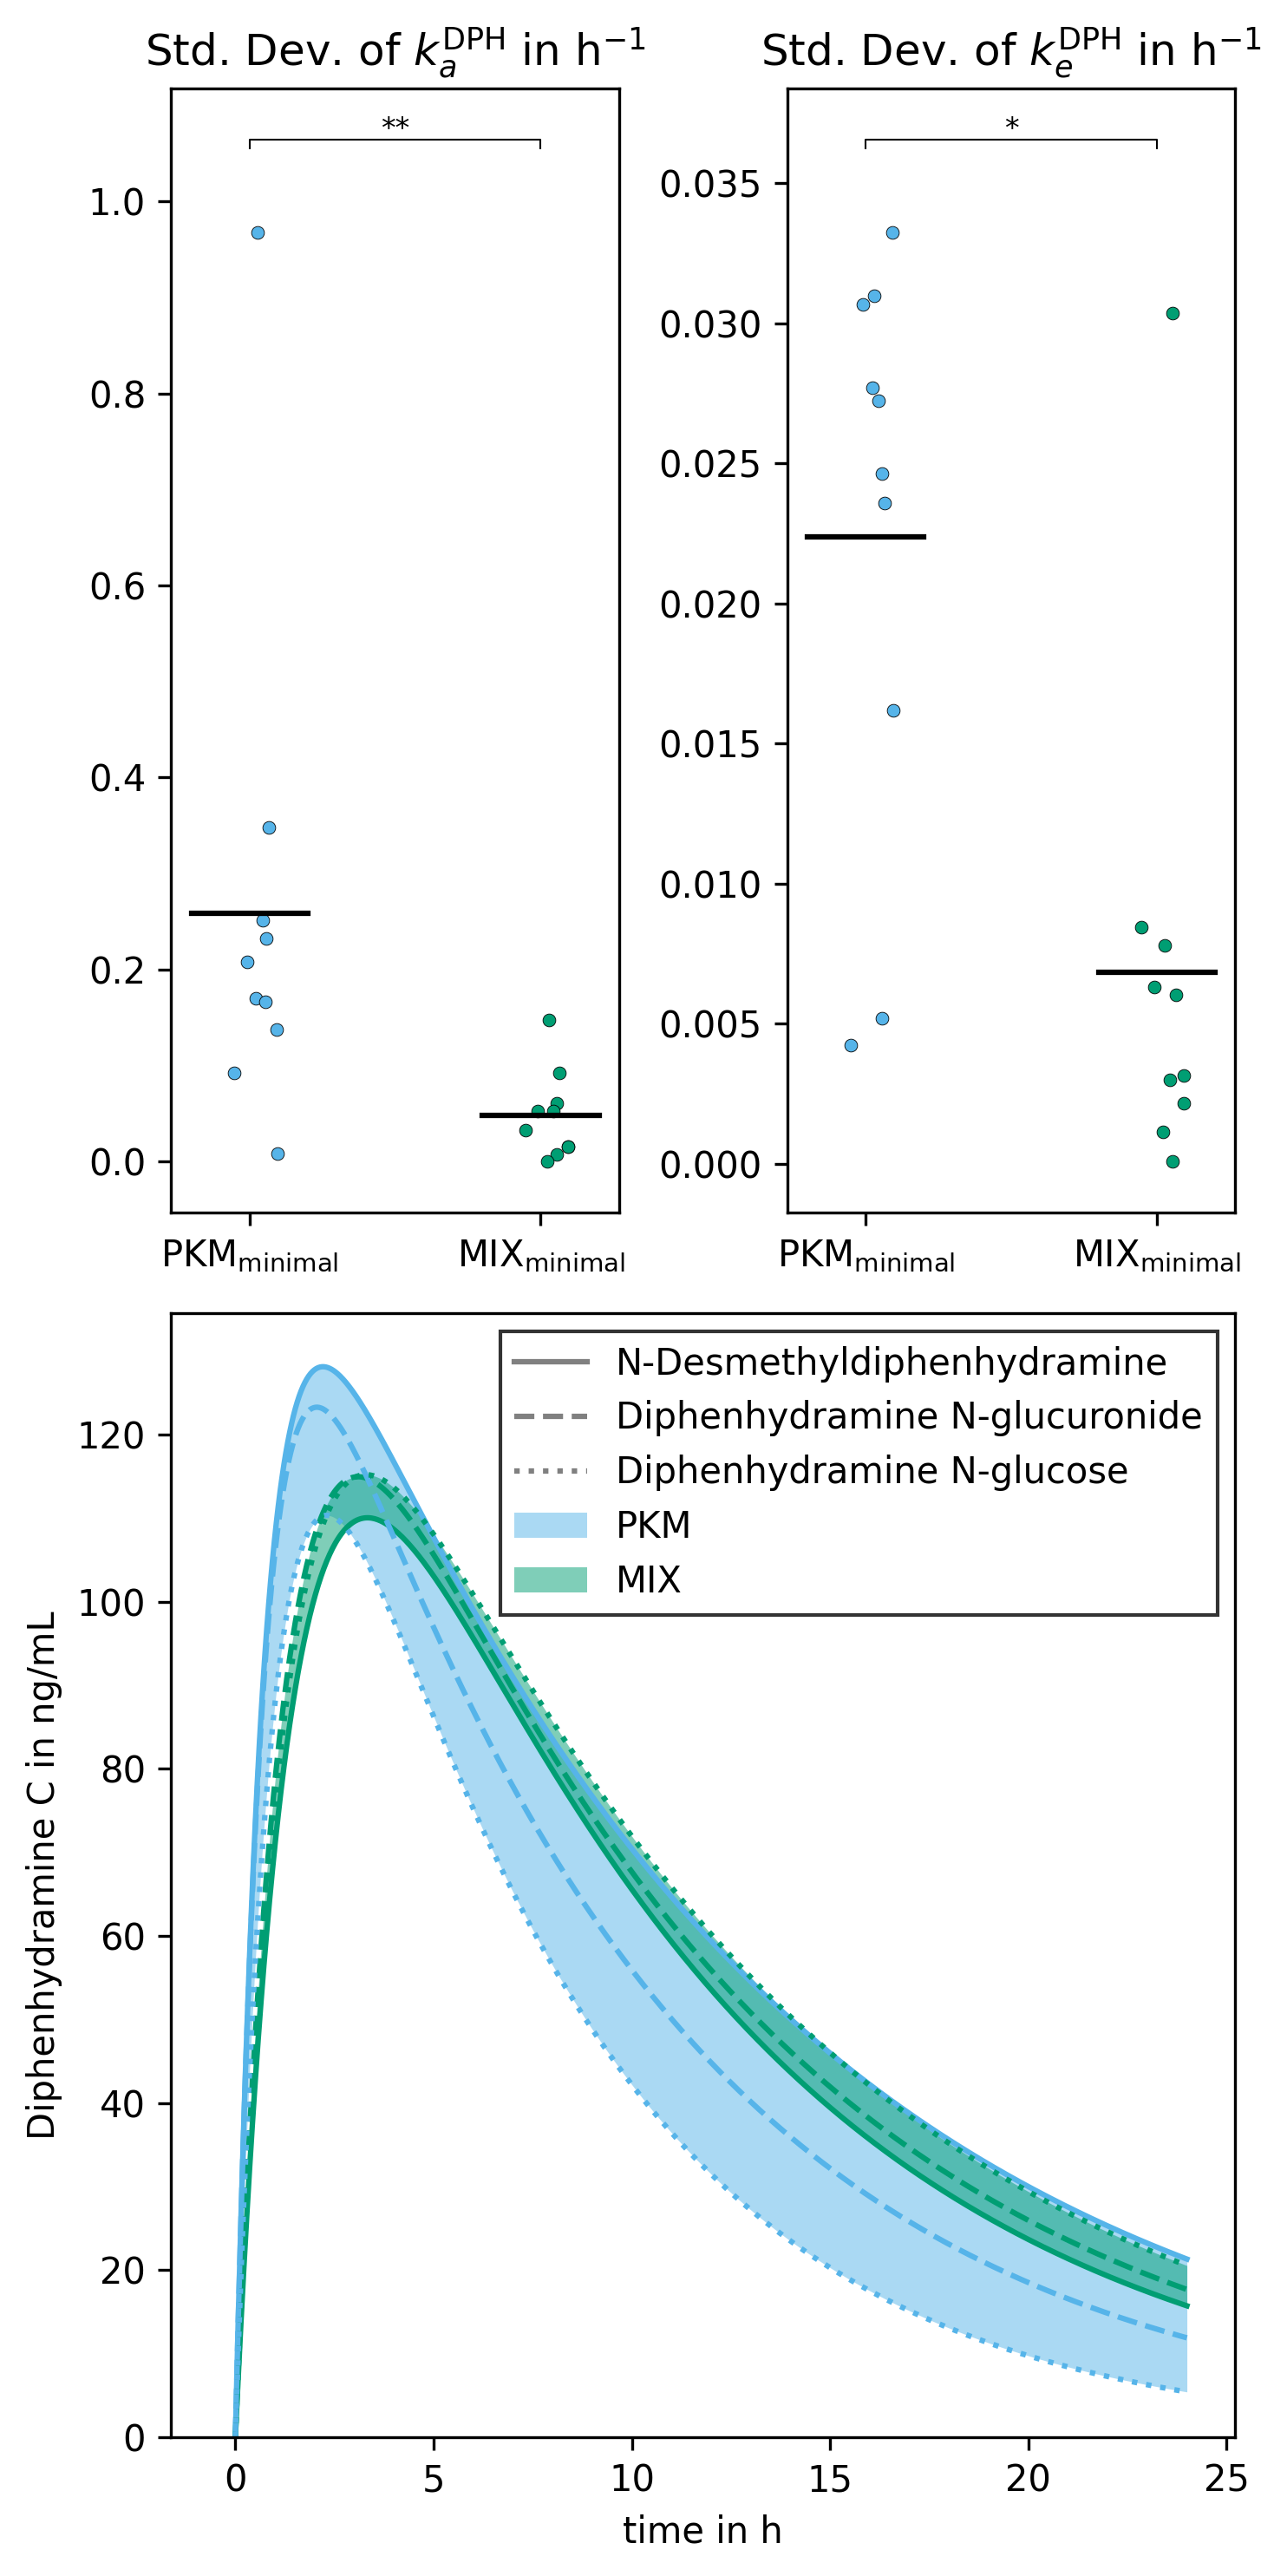

In [30]:
from matplotlib.gridspec import GridSpec

width = .1

path_list  = ['PKM_sub_2','MIX_sub_2']
label_list = [r'PKM$_{\rm minimal}$',r'MIX$_{\rm minimal}$']
colors  = ['#56B4E9','#009E73','#009E73']
titles = [r'$k_a^{\rmcaf}$',r'$k_e^{\rmcaf}$']

# generate random numbers to make the datapoints more spread out
np.random.seed(13)
rand = np.random.uniform(-width,width,len(pkm_ka_stds))

# start figure
fig = plt.figure(dpi=300,figsize=(5,10))
gs = GridSpec(4, 2, figure=fig)

# subplot 1: ka
ax1 = fig.add_subplot(gs[:2, 0])
ax1.set_title(r'Std. Dev. of $k_a^{\rmDPH}$ in h$^{-1}$')
# ax1.set_title(titles[0])
tmp_dic = {}
tmp_loc = {}
for nr, tmp in enumerate([pkm_ka_stds,mix_ka_stds]):
    ax1.scatter(np.ones(len(pkm_ka_stds))*nr+rand,tmp, marker='.',s=50,edgecolor='k',linewidth=.2,color=colors[nr])
    ax1.plot([nr-.2,nr+.2], [np.mean(tmp), np.mean(tmp)],color='k')
    tmp_dic[path_list[nr]] = tmp
    tmp_loc[path_list[nr]] = nr

calculate_significances(tmp_dic,tmp_loc)
ax1.set_xticks(range(len(path_list)))
ax1.set_xticklabels(label_list)
fig.tight_layout()

# subplot 2: ke
ax2 = fig.add_subplot(gs[:2, 1])
ax2.set_title(r'Std. Dev. of $k_e^{\rmDPH}$ in h$^{-1}$')
tmp_dic = {}
tmp_loc = {}
for nr, tmp in enumerate([pkm_ke_stds,mix_ke_stds]):
    ax2.scatter(np.ones(len(pkm_ke_stds))*nr+rand,tmp, marker='.',s=50,edgecolor='k',linewidth=.2,color=colors[nr])
    ax2.plot([nr-.2,nr+.2], [np.mean(tmp), np.mean(tmp)],color='k')
    tmp_dic[path_list[nr]] = tmp
    tmp_loc[path_list[nr]] = nr

calculate_significances(tmp_dic,tmp_loc)
ax2.set_xticks(range(len(path_list)))
ax2.set_xticklabels(label_list)
fig.tight_layout()

# subplot 3
ax3 = fig.add_subplot(gs[2:,:])
syn_x = np.linspace(0,24,1000)
colors  = ['#56B4E9','#009E73']
styles = {'NDM-DPH':'-','DPH-N-glucuronide':'--','DPH-N-glucose':':'}

mix_curves = []
pkm_curves = []
mix_ks = []
pkm_ks = []
mix_sv = []
pkm_sv = []
for metabolite in results[median_donor]:
    tmp_mix, tmp_pkm, tmp_factors = results[median_donor][metabolite]
    mix_y = tmp_mix.get_C_tensor(syn_x,tmp_mix.parameters)[0]*tmp_factors['DPH_ng/mL']
    pkm_y = tmp_pkm.plot(syn_x,*tmp_pkm.parameters)[0::2]*tmp_factors['DPH_ng/mL']
    plt.plot(syn_x,mix_y,color=colors[1],linestyle=styles[metabolite])
    plt.plot(syn_x,pkm_y,color=colors[0],linestyle=styles[metabolite])
    mix_curves.append(mix_y)
    pkm_curves.append(pkm_y)
    mix_ks.append(tmp_mix.get_kinetic_parameters()[:3])
    pkm_ks.append(tmp_pkm.get_kinetic_parameters()[:3])
    mix_sv.append(tmp_mix.get_sweat_volumes())
    pkm_sv.append(tmp_pkm.get_sweat_volumes())
#         break
for curves,color in zip([pkm_curves,mix_curves],colors):
    min_ = []
    max_ = []
    for a,b,c in zip(curves[0],curves[1],curves[2]):
        min_.append(np.min([a,b,c]))
        max_.append(np.max([a,b,c]))
    area = plt.fill_between(syn_x,min_,max_,color=color,linewidth=0,alpha=.5)

# legend
ax3.bar(0,0,color=colors[0],label='PKM',alpha=.5)
ax3.bar(0,0,color=colors[1],label='MIX',alpha=.5)
ax3.plot(0,0,color='grey',linestyle='-',label='N-Desmethyldiphenhydramine')
ax3.plot(0,0,color='grey',linestyle='--',label='Diphenhydramine N-glucuronide')
ax3.plot(0,0,color='grey',linestyle=':',label='Diphenhydramine N-glucose')
ax3.legend(fancybox=False,edgecolor='k')
ax3.set_ylabel('Diphenhydramine C in ng/mL')
ax3.set_xlabel('time in h')

# wrap up
plt.tight_layout()
plt.show()

# Supplementary Figures

## Figure S1

Figure S1 was not done with Python/ Matplotlib

## Figure S2

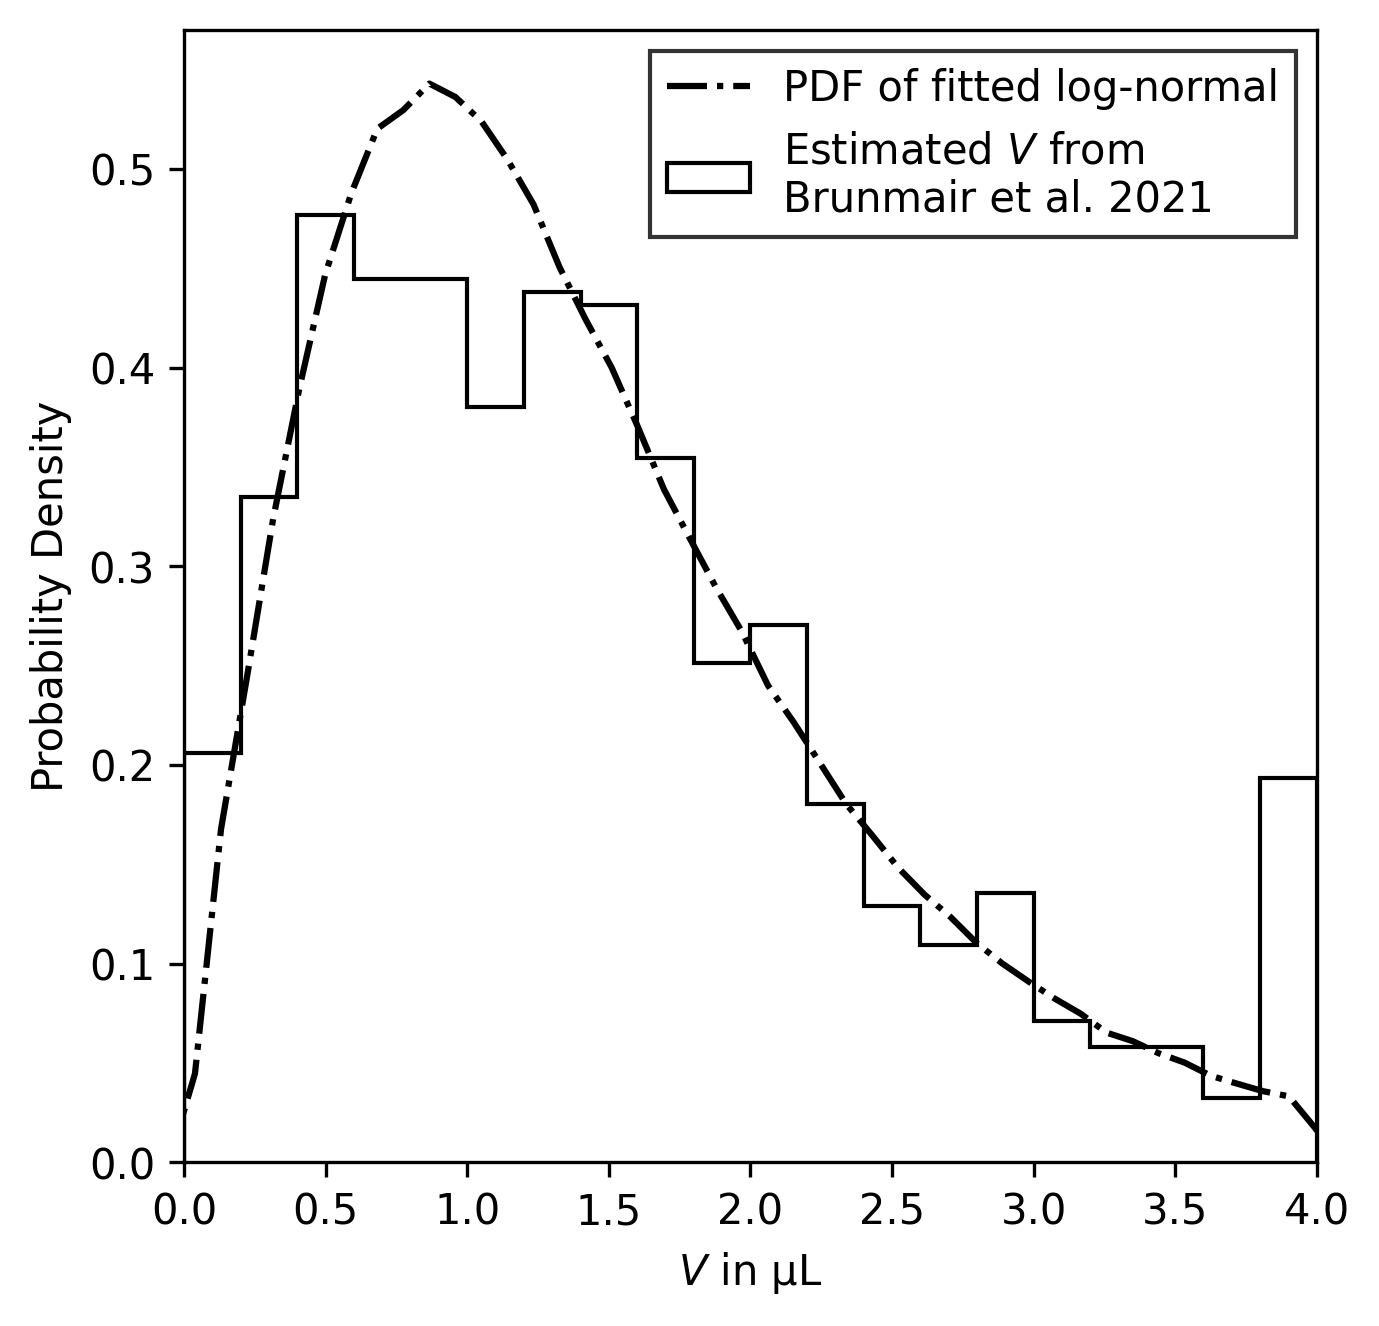

In [31]:
df = pd.read_csv('real_data/Brunmair_2021/data/combined_sv.csv',index_col=0)

# fit a lognormal distribution through the data
p = ss.lognorm.fit(df['sv']) # shape, loc, scale
plt.figure(dpi=300,figsize=(5,5))
plt.subplot(111,box_aspect=1)

# truncated PDF
sample = ss.lognorm.rvs(*p,size=10**6)
sample = sample[(sample >= .05) & (sample <= 4)]
count, bins = np.histogram(sample,range=(-.1,4.5),bins=50,density=True)
plt.plot((bins[1:]+bins[:-1])/2,count,'k-.',label=r'PDF of fitted log-normal')

plt.hist(df['sv'],range=(0,4),bins=20,histtype='step',density=True,color='k',label=r'Estimated $V$ from'+'\nBrunmair et al. 2021')
plt.xlim(0,4)
plt.legend(edgecolor='k',fancybox=False,loc='upper right')
plt.ylabel('Probability Density')
plt.xlabel(r'$V$ in µL')
plt.show()

## Figure S3

In [32]:
def plot_points_lambda(diagnosis_name,results_sv):
    diagnosis_func = diagnosis[diagnosis_name]
    maximum = 0
    # list of all goodness of fit estimates
    tmp_pqn      = []
    tmp_em_full  = []
    tmp_mix_full = []
    tmp_em_mini  = []
    tmp_mix_mini = []
    # read out how many replicates there are in the dataset
    n_replicates = len(results_sv['original'])
    # loop over all replicates
    for n_replicate in range(n_replicates):
        sv_vector  = results_sv['TRUE'][n_replicate]
        # loop over all normalization methods
        for method, tmp_list in zip(methods,[tmp_pqn,tmp_em_full,tmp_em_mini,tmp_mix_full,tmp_mix_mini]):
            tmp_sv = results_sv[method][n_replicate]
            tmp_diagnosis = diagnosis_func(sv_vector,tmp_sv)
            tmp_list.append(tmp_diagnosis)
    
    means = []
    stds   = []
    for tmp_list in [tmp_pqn,tmp_em_full,tmp_em_mini,tmp_mix_full,tmp_mix_mini]:
        means.append(np.mean(tmp_list))
        stds.append(np.std(tmp_list))
    return means, stds

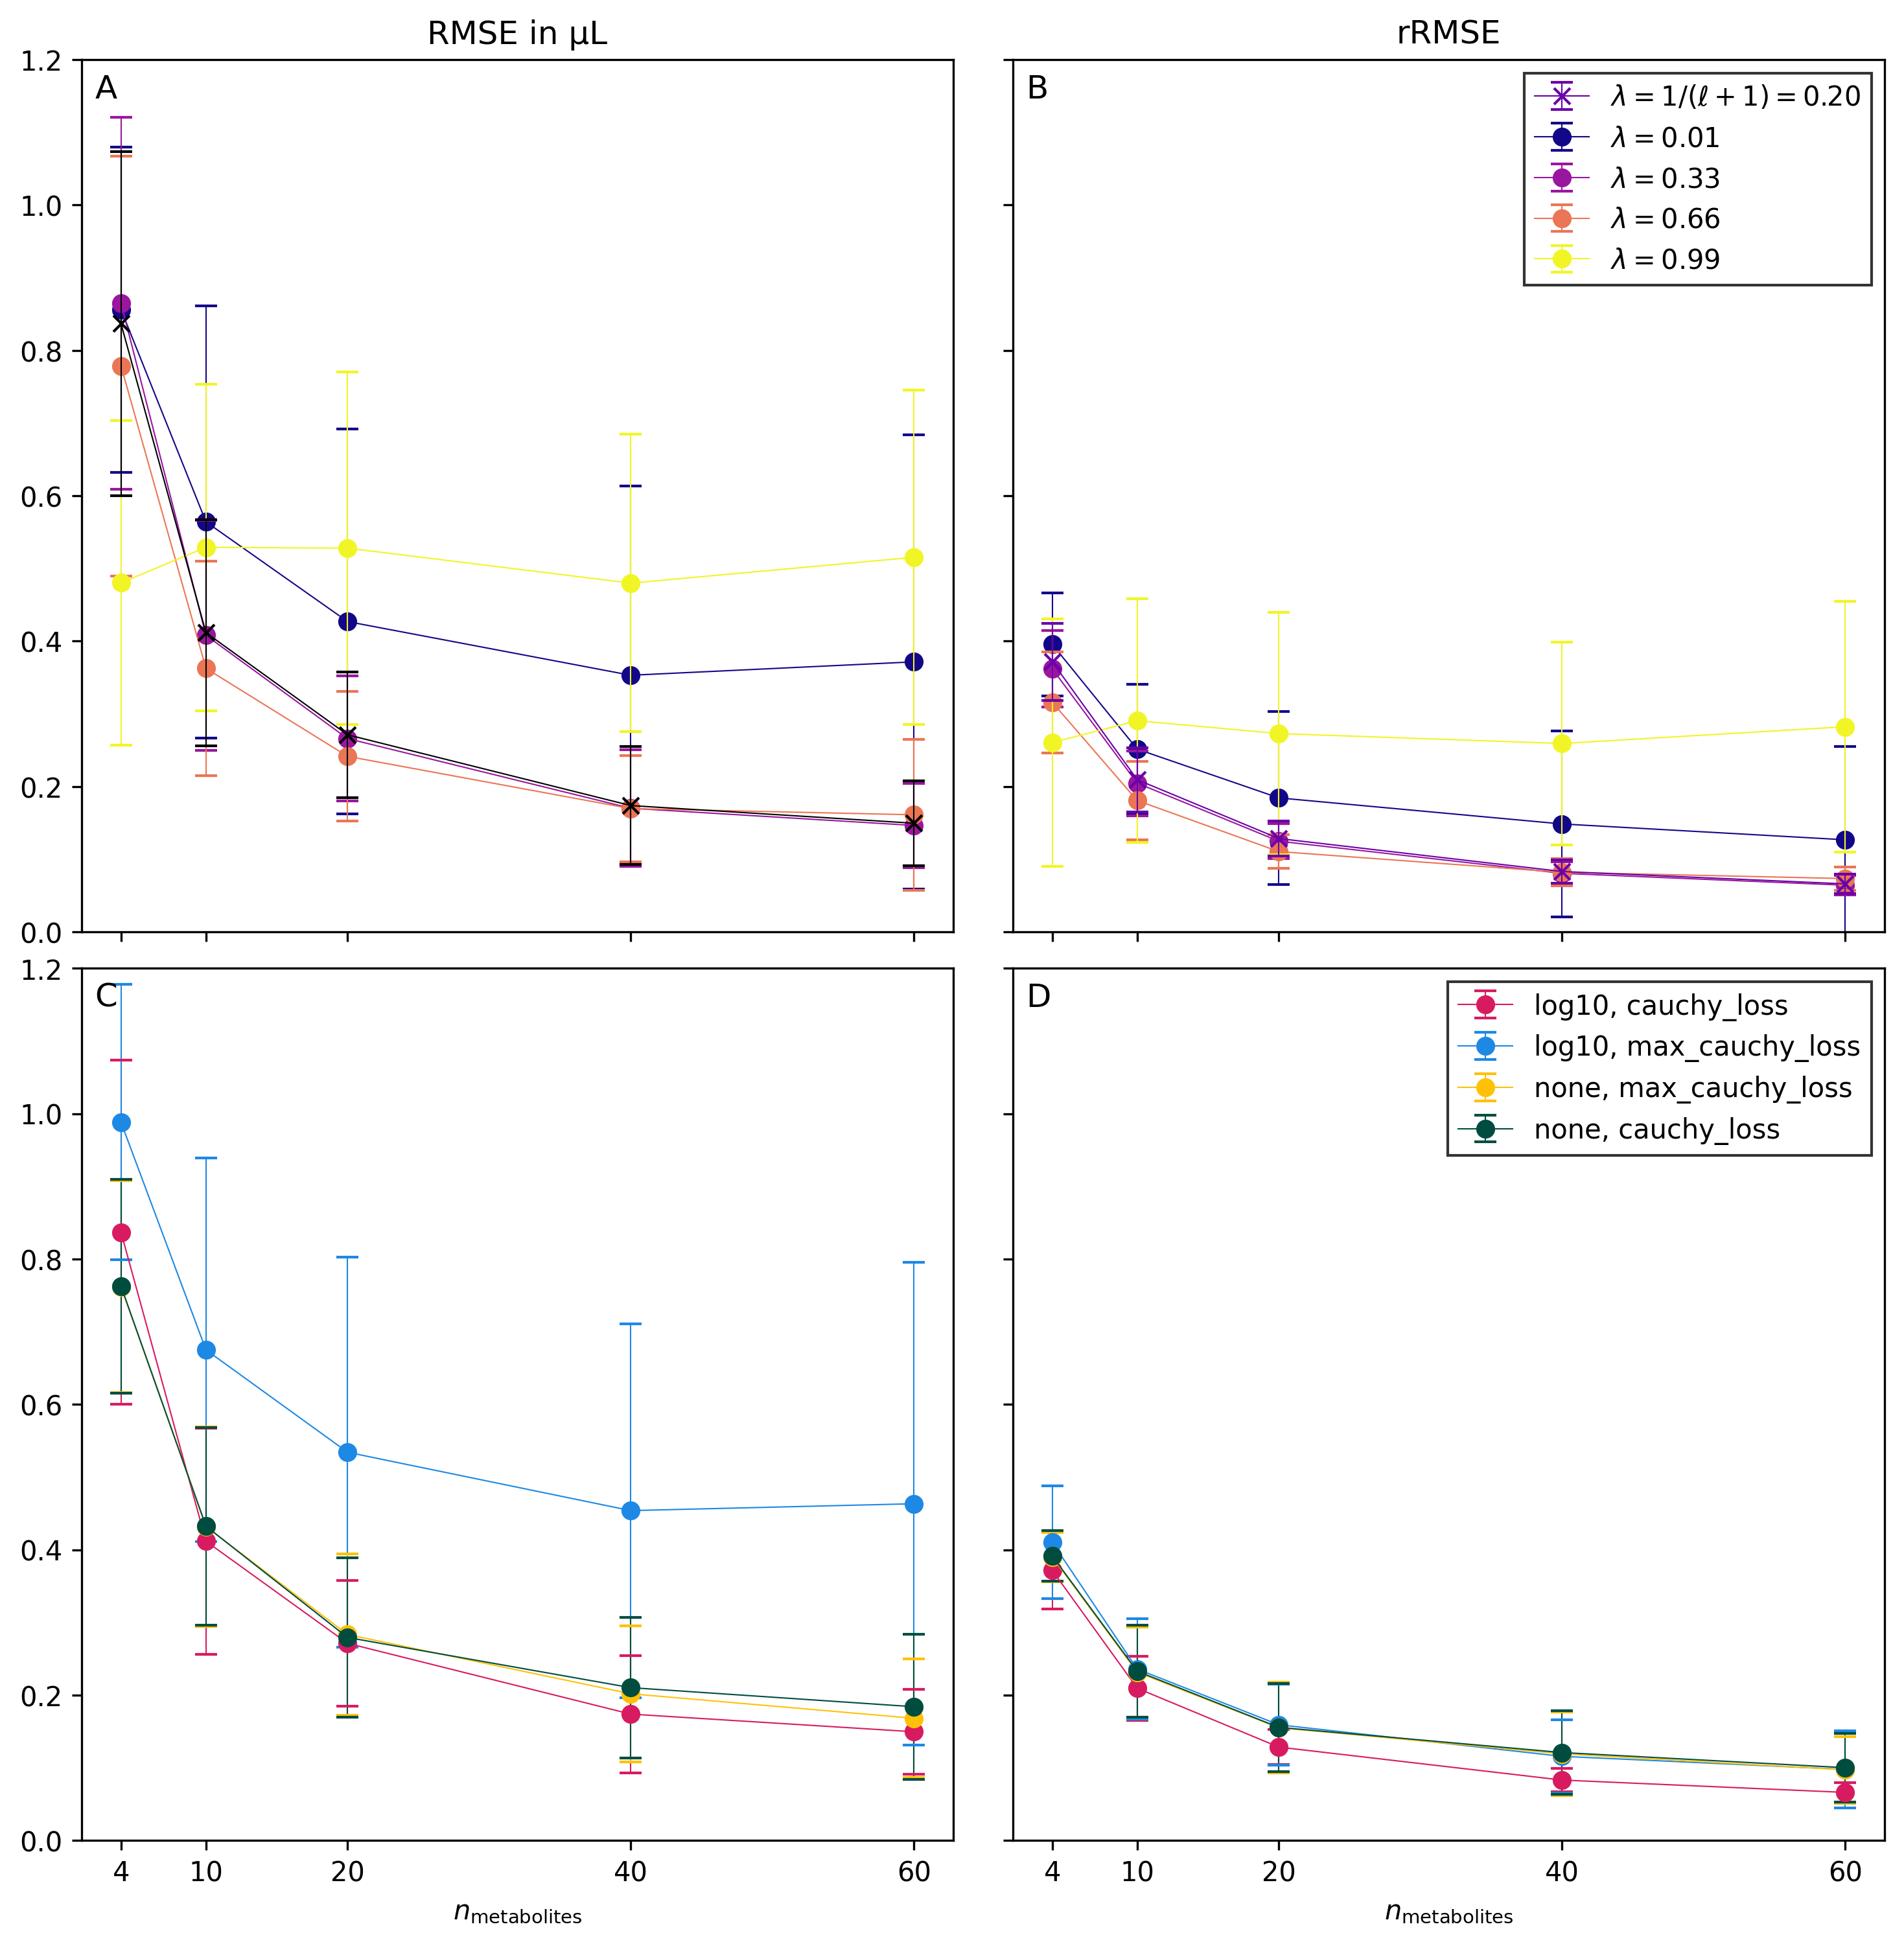

In [33]:
sys.modules['LOG_extended_model'] = sys.modules['extended_model']

# load data
error_sigma   = .2
path          = 'v3' # v1 for Figure S6, v2 for Figure S7
base          = 'synthetic_data/other_results/lambda_results'
n_metabolites_list = np.array([4,10,20,40,60])
plt.figure(dpi=300,figsize=(10,10))


######## Subplot 1
markers = ['x','o','o','o','o']
colors  = ['k',cm.plasma(.01),cm.plasma(0.33),cm.plasma(0.66),cm.plasma(0.99)]
fcolors = ['k',cm.plasma(.01),cm.plasma(0.33),cm.plasma(0.66),cm.plasma(0.99)]
methods = ['original','0.01','0.33','0.66','0.99']
labels  = [r'1/($n_{\rm metabolites} + 1$)','0.01','0.33','0.66','0.99']
ax1 = plt.subplot(221,box_aspect=1)
# plt.title('version = {} \nerror_sigma = {:.1f}'.format(path,error_sigma))
diagnosis_name = 'RMSE'
plt.title(f'{diagnosis_name} in μL')
points = []
stds   = []
for n_metabolites in n_metabolites_list:
    with open(f'{base}/{path}_e_{error_sigma}_n_{n_metabolites}.pkl','rb') as file:
        results_time,results_sv,results_model,raw_values = pickle.load(file)
    tmp, std = plot_points_lambda(diagnosis_name,results_sv)
    points.append(tmp)
    stds.append(std)
points = np.array(points)
stds = np.array(stds)

# write out dataframes for means and stds 
SD_results = pd.DataFrame(index=methods,columns=[f'{path} {i} mean' for i in n_metabolites_list]+[f'{path} {i} std' for i in n_metabolites_list])
SD_results.iloc[:,:len(n_metabolites_list)] = points.T
SD_results.iloc[:,len(n_metabolites_list):] = stds.T

for nr, label in enumerate(methods):
    if nr == 0:
        order = 10
    else:
        order = nr
    plt.errorbar(n_metabolites_list,points[:,nr],yerr=stds[:,nr],color=colors[nr],marker=markers[nr],linewidth=.5,capsize=4,label=labels[nr],mfc=fcolors[nr],zorder=order)
# plt.xlabel(r'$n_{\rm metabolites}$')
plt.xticks(n_metabolites_list,[])
plt.ylim(0,1.2)

####### Subplot 2
markers = ['x','o','o','o','o']
colors  = [cm.plasma(.2),cm.plasma(.01),cm.plasma(0.33),cm.plasma(0.66),cm.plasma(0.99)]
fcolors = [cm.plasma(.2),cm.plasma(.01),cm.plasma(0.33),cm.plasma(0.66),cm.plasma(0.99)]
methods = ['original','0.01','0.33','0.66','0.99']
labels  = [r'$\lambda = 1/(\ell + 1) = 0.20$',r'$\lambda = $0.01',r'$\lambda = 0.33$',r'$\lambda = 0.66$',r'$\lambda = 0.99$']

ax2 = plt.subplot(222,box_aspect=1)
# plt.title('version = {} \nerror_sigma = {:.1f}'.format(path,error_sigma))
diagnosis_name = 'rRMSE'
plt.title(f'rRMSE')
points = []
stds   = []
for n_metabolites in n_metabolites_list:
    with open(f'{base}/{path}_e_{error_sigma}_n_{n_metabolites}.pkl','rb') as file:
        results_time,results_sv,results_model,raw_values = pickle.load(file)
    tmp, std = plot_points_lambda(diagnosis_name,results_sv)
    points.append(tmp)
    stds.append(std)
points = np.array(points)
stds = np.array(stds)

# write out dataframes for means and stds 
rSD_results = pd.DataFrame(index=methods,columns=[f'{path} {i} mean' for i in n_metabolites_list]+[f'{path} {i} std' for i in n_metabolites_list])
rSD_results.iloc[:,:len(n_metabolites_list)] = points.T
rSD_results.iloc[:,len(n_metabolites_list):] = stds.T

for nr, label in enumerate(methods):
    if nr == 0:
        order = 10
    else:
        order = nr
    plt.errorbar(n_metabolites_list,points[:,nr],yerr=stds[:,nr],color=colors[nr],marker=markers[nr],linewidth=.5,capsize=4,label=labels[nr],mfc=fcolors[nr],zorder=order)
# plt.xlabel(r'$n_{\rm metabolites}$')
plt.xticks(n_metabolites_list,[])
plt.ylim(0,1.2)

######## Concluding Commands
plt.legend(edgecolor='k',fancybox=False)#,title=r'$\lambda$')
plt.tight_layout()


# load data
error_sigma   = .2
path          = 'v3' # v1 for Figure S6, v2 for Figure S7
base          = 'synthetic_data/other_results/L_T_results'
n_metabolites_list = np.array([4,10,20,40,60])

######## Subplot 1
markers = ['x','o','o','o','o']
colors  = ['#E69F00','#D81B60','#1E88E5','#FFC107','#004D40']
fcolors  = ['#E69F00','#D81B60','#1E88E5','#FFC107','#004D40']
methods = ['PQN','MIX_abs_log','MIX_max_log','MIX_max','MIX_abs']
labels = ['PQN','MIX_abs_log','MIX_max_log','MIX_max','MIX_abs']
ax3 = plt.subplot(223,box_aspect=1)
# plt.title('version = {} \nerror_sigma = {:.1f}'.format(path,error_sigma))
diagnosis_name = 'SD'
# plt.ylabel(f'{diagnosis_name} in μL')
points = []
stds   = []
for n_metabolites in n_metabolites_list:
    with open(f'{base}/{path}_e_{error_sigma}_n_{n_metabolites}.pkl','rb') as file:
        results_time,results_sv,results_model,raw_values = pickle.load(file)
    tmp, std = plot_points(diagnosis_name,results_sv)
    points.append(tmp)
    stds.append(std)
points = np.array(points)
stds = np.array(stds)

# write out dataframes for means and stds 
SD_results = pd.DataFrame(index=methods,columns=[f'{path} {i} mean' for i in n_metabolites_list]+[f'{path} {i} std' for i in n_metabolites_list])
SD_results.iloc[:,:len(n_metabolites_list)] = points.T
SD_results.iloc[:,len(n_metabolites_list):] = stds.T

for nr, label in enumerate(methods):
    if nr == 0:
        pass
    else:
        plt.errorbar(n_metabolites_list,points[:,nr],yerr=stds[:,nr],color=colors[nr],marker=markers[nr],linewidth=.5,capsize=4,label=labels[nr],mfc=fcolors[nr])
plt.xlabel(r'$n_{\rm metabolites}$')
plt.xticks(n_metabolites_list)
plt.ylim(0,1.2)

######## Subplot 2
markers = ['x','o','o','o','o']
colors  = ['#E69F00','#D81B60','#1E88E5','#FFC107','#004D40']
fcolors  = ['#E69F00','#D81B60','#1E88E5','#FFC107','#004D40']
methods = ['PQN','MIX_abs_log','MIX_max_log','MIX_max','MIX_abs']
labels = ['PQN','log10, cauchy_loss','log10, max_cauchy_loss','none, max_cauchy_loss','none, cauchy_loss']

ax4 = plt.subplot(224,box_aspect=1)
# plt.title('version = {} \nerror_sigma = {:.1f}'.format(path,error_sigma))
diagnosis_name = 'ratio_SD'
# plt.ylabel(f'rSD')
points = []
stds   = []
for n_metabolites in n_metabolites_list:
    with open(f'{base}/{path}_e_{error_sigma}_n_{n_metabolites}.pkl','rb') as file:
        results_time,results_sv,results_model,raw_values = pickle.load(file)
    tmp, std = plot_points(diagnosis_name,results_sv)
    points.append(tmp)
    stds.append(std)
points = np.array(points)
stds = np.array(stds)

# write out dataframes for means and stds 
rSD_results = pd.DataFrame(index=methods,columns=[f'{path} {i} mean' for i in n_metabolites_list]+[f'{path} {i} std' for i in n_metabolites_list])
rSD_results.iloc[:,:len(n_metabolites_list)] = points.T
rSD_results.iloc[:,len(n_metabolites_list):] = stds.T

for nr, label in enumerate(methods):
    if nr == 0:
        pass
    else:
        plt.errorbar(n_metabolites_list,points[:,nr],yerr=stds[:,nr],color=colors[nr],marker=markers[nr],linewidth=.5,capsize=4,label=labels[nr],mfc=fcolors[nr])
plt.xlabel(r'$n_{\rm metabolites}$')
plt.xticks(n_metabolites_list)
plt.ylim(0,1.2)

ax2.set_yticklabels([])
ax4.set_yticklabels([])

import matplotlib.transforms as mtransforms
for name, ax in zip(['A','B','C','D'],[ax1,ax2,ax3,ax4]):
#     ax.set_title(name, loc='left', pad=-200)
    trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, name, transform=ax.transAxes + trans,
            fontsize='large', verticalalignment='top', fontfamily='sans',
            bbox=dict(facecolor='none', edgecolor='none', pad=3.0))


######## Concluding Commands
plt.legend(edgecolor='k',fancybox=False)#,title='Transformation, Loss')
plt.tight_layout()
plt.show()

## Figure S4

In [34]:
donors = ['Donor_23','Donor_1', 'Donor_10', 'Donor_16', 'Donor_17', 'Donor_18', 'Donor_19', 'Donor_2', 'Donor_20', 'Donor_21', 'Donor_22', 'Donor_27', 'Donor_28', 'Donor_29', 'Donor_3', 'Donor_30', 'Donor_31', 'Donor_32', 'Donor_33', 'Donor_34', 'Donor_35', 'Donor_36', 'Donor_37', 'Donor_38', 'Donor_39', 'Donor_4', 'Donor_40', 'Donor_41', 'Donor_42', 'Donor_43', 'Donor_44', 'Donor_45', 'Donor_46', 'Donor_47', 'Donor_5', 'Donor_7', 'Donor_8', 'Donor_9']
list_mean = []
list_std  = []

for donor in donors:
    tmp_data = pd.read_csv(f'real_data/Brunmair_2021/data/{donor}.csv',index_col=0)
    tmp_sv = df[df['donor']==donor]
    # normalize by the estimated sweat volume from Brunmair et al. 2021
    norm_data = tmp_data.copy()
    for time in tmp_data['time'].unique():
        norm_data.loc[norm_data['time']==time,norm_data.columns[1:]] = norm_data.loc[norm_data['time']==time,norm_data.columns[1:]]/tmp_sv.loc[tmp_sv['time']==time,'sv'].values[0]
    # calculate mean and SD from every donor - metabolite combination
    list_mean.append(np.mean(norm_data)[1:].values)
    list_std.append(np.std(norm_data)[1:].values)
list_mean = np.concatenate(list_mean)
list_std = np.concatenate(list_std)

Distribution of Means: (2.148317832564606, 0.001778753379700152, 1.2405420068515842)
Distribution of Stds: (2.2167838444949517, 0.001120628341967606, 0.8430842457133452)


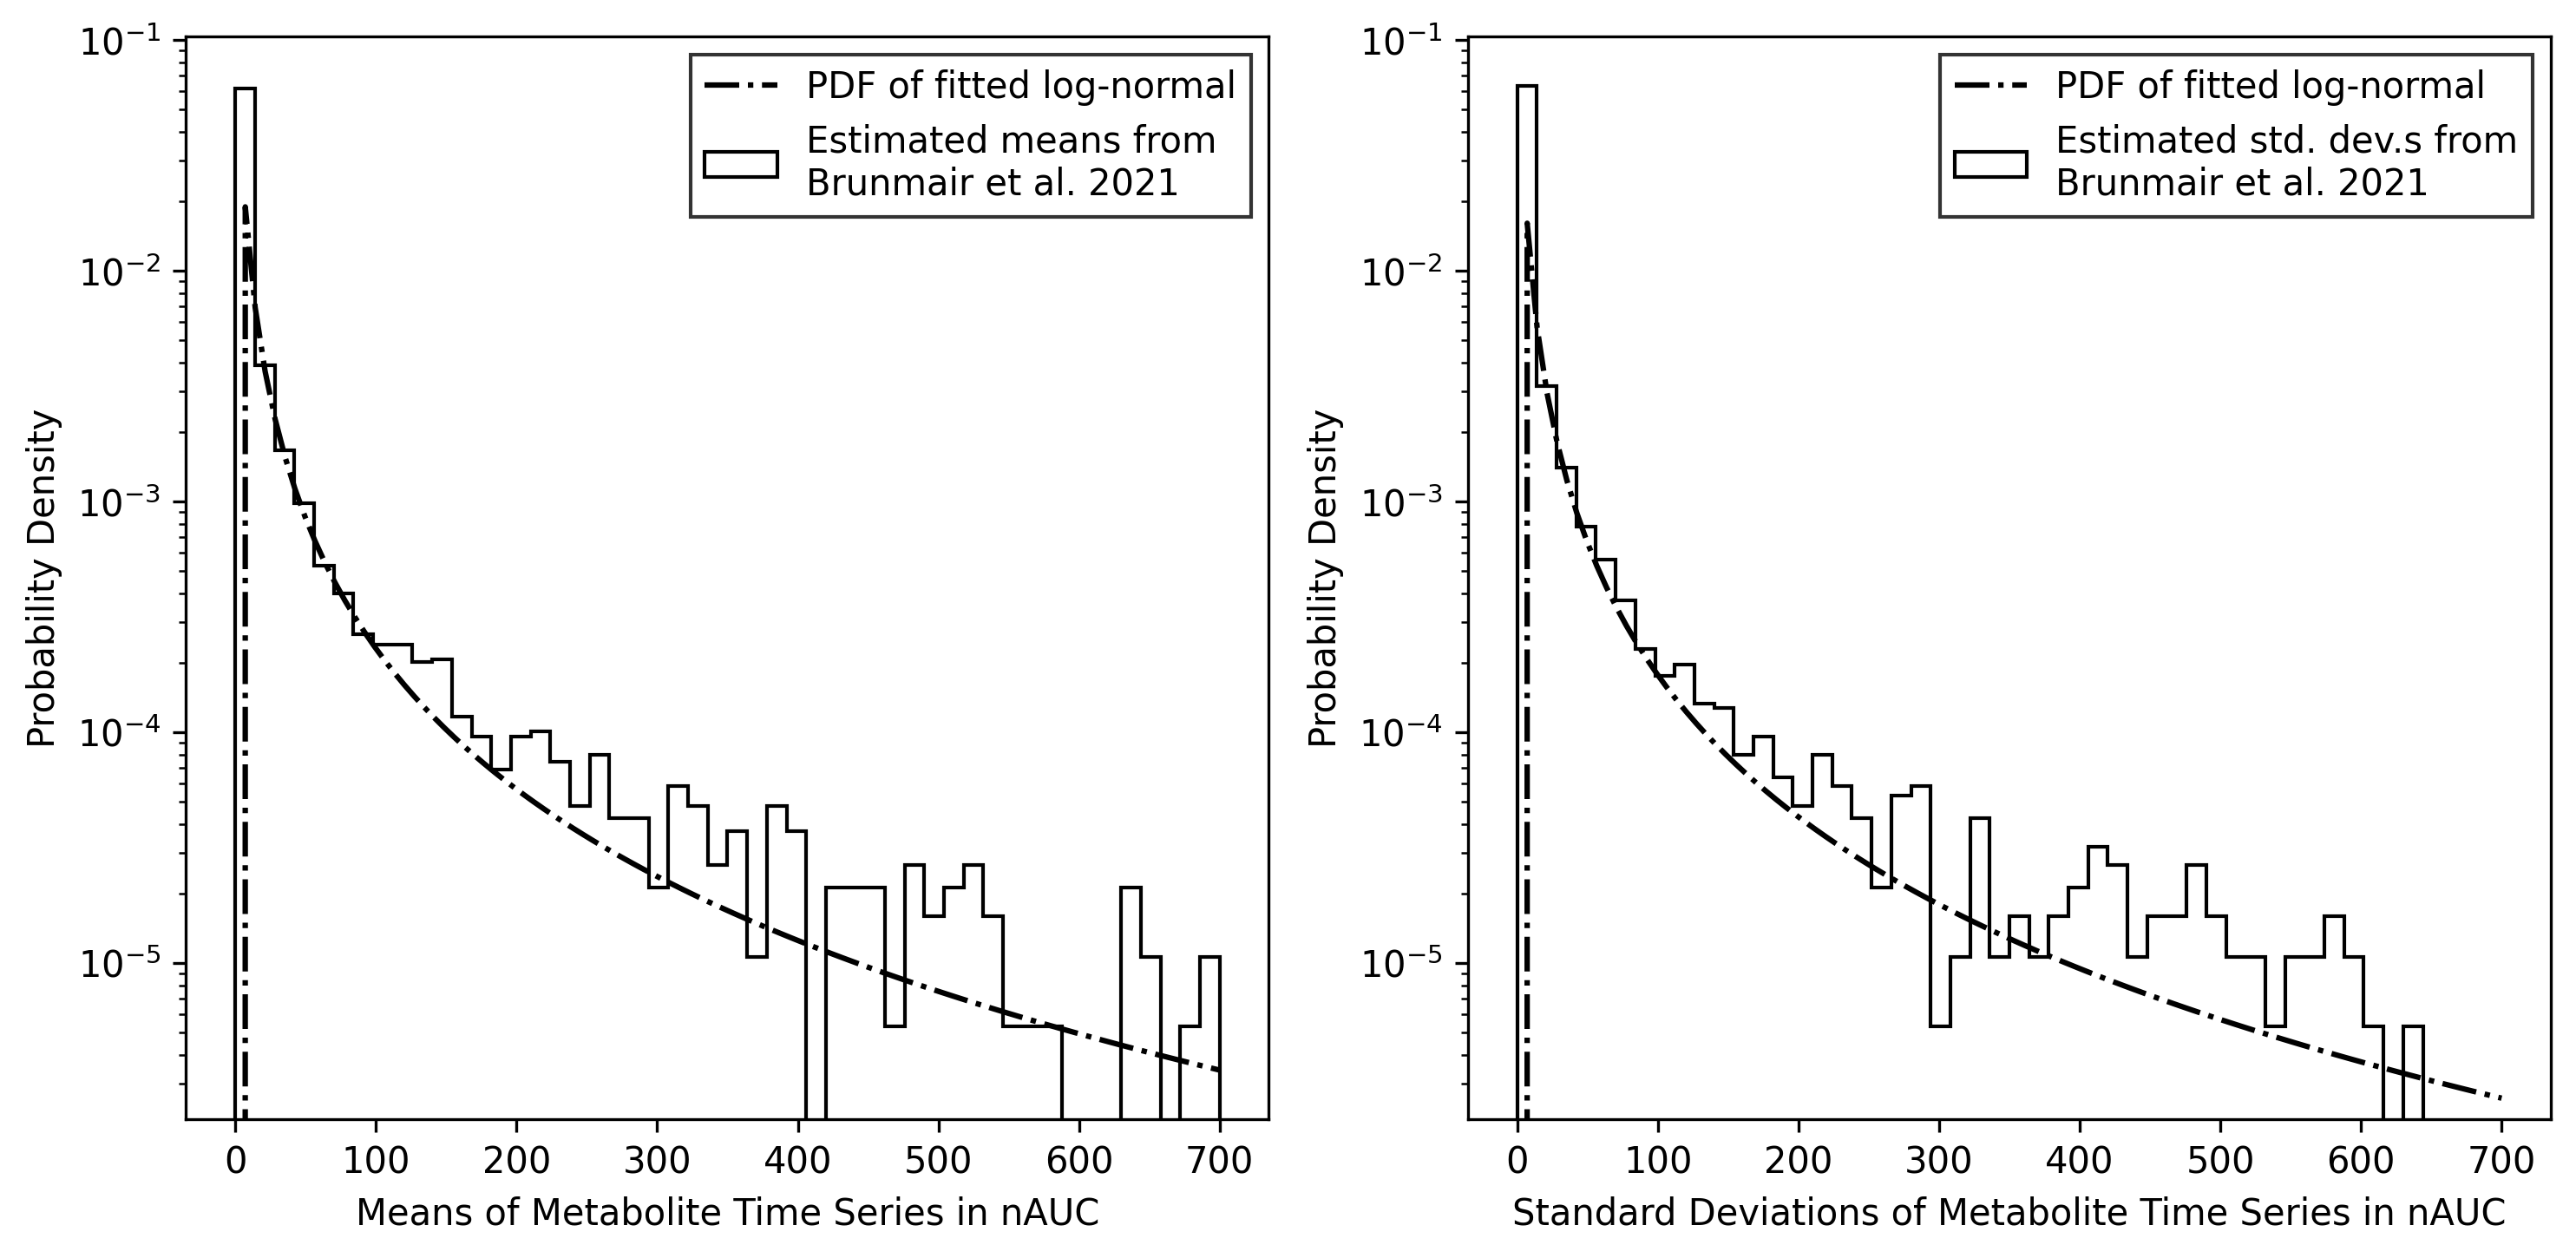

In [35]:
plt.figure(dpi=300,figsize=(10,5))

## SUBPLOT 1
## distribution of means
ax = plt.subplot(121,box_aspect=1)
p = ss.lognorm.fit(list_mean) # shape, loc, scale
print('Distribution of Means:',p)
# fitted PDF
max_ = 700
ls = np.linspace(0,max_,100)
plt.plot(ls,ss.lognorm.pdf(ls,*p),'k-.',label='PDF of fitted log-normal')
plt.hist(list_mean,histtype='step',range=(0,max_),density=True,bins=50,color='k',label='Estimated means from\nBrunmair et al. 2021')
plt.yscale('log')
plt.ylabel('Probability Density')
plt.xlabel('Means of Metabolite Time Series in nAUC')
plt.legend(edgecolor='k',fancybox=False,loc='upper right')

## SUBPLOT 2
## distribution of SDs
plt.subplot(122,box_aspect=1,sharex=ax,sharey=ax)
p = ss.lognorm.fit(list_std) # shape, loc, scale
print('Distribution of Stds:',p)
# fitted PDF
ls = np.linspace(0,max_,100)
plt.plot(ls,ss.lognorm.pdf(ls,*p),'k-.',label='PDF of fitted log-normal')
# measured data
plt.hist(list_std,histtype='step',range=(0,max_),density=True,bins=50,color='k',label='Estimated std. dev.s from\nBrunmair et al. 2021')
plt.yscale('log')
plt.ylabel('Probability Density')
plt.xlabel('Standard Deviations of Metabolite Time Series in nAUC')
plt.legend(edgecolor='k',fancybox=False,loc='upper right')
plt.tight_layout()
plt.show()

## Figure S5

Figure S5 was not done with Python/ Matplotlib

## Figure S6

Figure S6 was not done with Python/ Matplotlib

## Figure S7

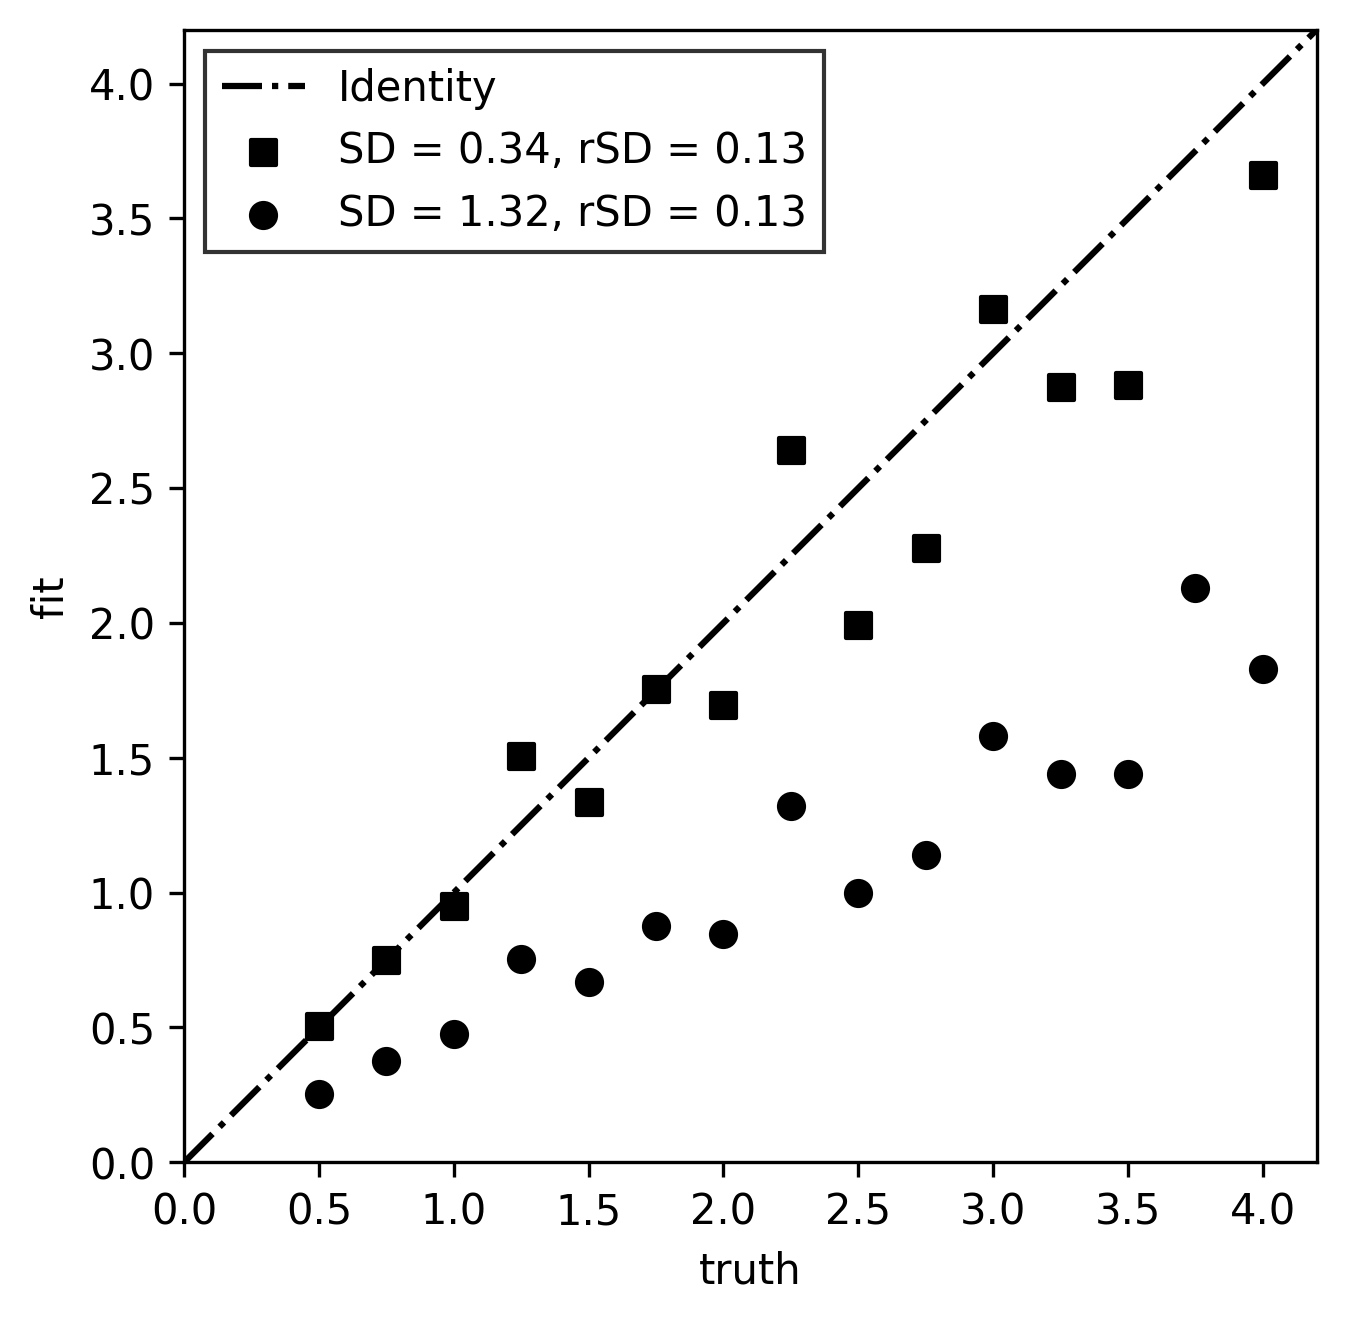

In [36]:
def SD(true,fit):
    return np.sqrt(np.sum((true-fit)**2)/len(true))

def ratio_SD(true,fit):
    y = fit/true
    return np.std(y/np.mean(y))

true = np.linspace(0.5,4,15)
e = np.random.normal(1,.2,15)
fit1 = true*e
fit2 = true*e*.5

plt.figure(dpi=300,figsize=(5,5))
ax = plt.subplot(111,box_aspect=1)

plt.scatter(true,fit1,label='SD = {:.2f}, rSD = {:.2f}'.format(SD(true,fit1),ratio_SD(true,fit1)),color='k',marker='s')
plt.scatter(true,fit2,label='SD = {:.2f}, rSD = {:.2f}'.format(SD(true,fit2),ratio_SD(true,fit2)),color='k',marker='o')
plt.plot((0,4.2),(0,4.2),'k-.',label='Identity')

plt.legend(edgecolor='k',fancybox=False,loc='upper left')
plt.xlim(0,4.2)
plt.ylim(0,4.2)
plt.xlabel('truth')
plt.ylabel('fit')
plt.show()

## Figure S8

In [37]:
def plot_pairwise_performance(diagnosis_name,results_sv,with_pqn=True,set_max=False):
    diagnosis_func = diagnosis[diagnosis_name]
    maximum = 0
    # list of all goodness of fit estimates
    tmp_pqn      = []
    tmp_em_full  = []
    tmp_mix_full = []
    tmp_em_mini  = []
    tmp_mix_mini = []
    # read out how many replicates there are in the dataset
    n_replicates = len(results_sv['PQN'])
    # loop over all replicates
    for n_replicate in range(n_replicates):
        sv_vector  = results_sv['TRUE'][n_replicate]
        # loop over all normalization methods
        for method, tmp_list in zip(['PQN','PKM_full','PKM_mini','MIX_full','MIX_mini'],[tmp_pqn,tmp_em_full,tmp_em_mini,tmp_mix_full,tmp_mix_mini]):
            tmp_sv = results_sv[method][n_replicate]
            tmp_diagnosis = diagnosis_func(sv_vector,tmp_sv)
            tmp_list.append(tmp_diagnosis)
        
    # plot the diagnosis parameters
    rand = np.random.uniform(-.1,.1,n_replicates)
    nr = 0
    rfcs = []
    for method, tmp_list in zip(['PKM_mini','PKM_full','MIX_mini','MIX_full','PQN'],[tmp_em_mini,tmp_em_full,tmp_mix_mini,tmp_mix_full,tmp_pqn]):
        if method == 'PQN' and with_pqn==False:
            pass
        else:
            # relative fold change
            rfc = np.array(tmp_list)/np.array(tmp_em_mini)*100
            rfcs.append(rfc)
            # mean relative fold change
            mrfc = np.mean(rfc)
            plt.scatter(np.ones(n_replicates)*nr+rand,rfc,color=colors[nr],marker='.',s=20,edgecolor='k',linewidth=.2)
            plt.plot([nr-.2,nr+.2],[mrfc,mrfc],color='k')
            print('{:10} mean = {:5.3f} std = {:5.3f}'.format(method,mrfc,np.std(rfc)))
        nr += 1
        

    # significances
    if method == 'PQN' and with_pqn==False:
        tmp_dic = {'PKM_mini':tmp_em_mini,'PKM_full':tmp_em_full,'MIX_mini':tmp_mix_mini,'MIX_full':tmp_mix_full}
    else:
        tmp_dic = {'PKM_mini':tmp_em_mini,'PKM_full':tmp_em_full,'MIX_mini':tmp_mix_mini,'MIX_full':tmp_mix_full,'PQN':tmp_pqn}
    tmp_loc = {'PQN':4,'PKM_mini':0,'PKM_full':1,'MIX_mini':2,'MIX_full':3}
    if np.max(rfcs) > maximum:
        maximum = np.max(rfcs)
    if set_max == False:
        pass
    else:
        maximum = set_max
    height          = maximum*1.1
    bracket_size    = .01
    text_offset     = .01
    height_increase = .05*maximum
    print('------- P VALUES ------')
    p_df = pd.DataFrame(columns=tmp_loc.keys(),index=tmp_loc.keys(),dtype=np.float64)
    for i,j in combinations(tmp_dic.keys(),2):
#         test_result = ss.mannwhitneyu(tmp_dic[i],tmp_dic[j])
        test_result = ss.wilcoxon(tmp_dic[i],tmp_dic[j])
        print('{:15} {:15} {:8.2e} {}'.format(i,j,test_result.pvalue,significance_star(test_result.pvalue)))
        p_df.loc[i,j] = test_result.pvalue
        if test_result.pvalue <= .05:
            if i == 'PQN' and with_pqn == False:
                pass
            else:
                plt.plot(np.array([tmp_loc[i],tmp_loc[i],tmp_loc[j],tmp_loc[j]]),
                         [height-maximum*bracket_size,height,height,height-maximum*bracket_size],
                         'k',
                         linewidth=.5
                        )
                plt.text(np.mean([tmp_loc[i],tmp_loc[j]]),
                         height+maximum*text_offset,
                         significance_star(test_result.pvalue),
                         ha='center',
                         va='center',
                         fontsize=8
                        )
                height += height_increase
    return nr, p_df

PKM_mini   mean = 100.000 std = 0.000
PKM_full   mean = 37.650 std = 22.694
MIX_mini   mean = 21.381 std = 13.926
MIX_full   mean = 125.297 std = 69.500
------- P VALUES ------
PKM_mini        PKM_full        5.77e-18 ***
PKM_mini        MIX_mini        3.90e-18 ***
PKM_mini        MIX_full        1.85e-02 *
PKM_full        MIX_mini        2.02e-13 ***
PKM_full        MIX_full        1.64e-17 ***
MIX_mini        MIX_full        4.02e-18 ***
PKM_mini   mean = 100.000 std = 0.000
PKM_full   mean = 34.885 std = 16.461
MIX_mini   mean = 22.709 std = 11.064
MIX_full   mean = 92.402 std = 73.703
PQN        mean = 21.636 std = 10.448
------- P VALUES ------
PKM_mini        PKM_full        3.90e-18 ***
PKM_mini        MIX_mini        3.90e-18 ***
PKM_mini        MIX_full        3.23e-04 ***
PKM_mini        PQN             3.90e-18 ***
PKM_full        MIX_mini        1.51e-16 ***
PKM_full        MIX_full        1.14e-15 ***
PKM_full        PQN             1.74e-17 ***
MIX_mini        MIX_full  

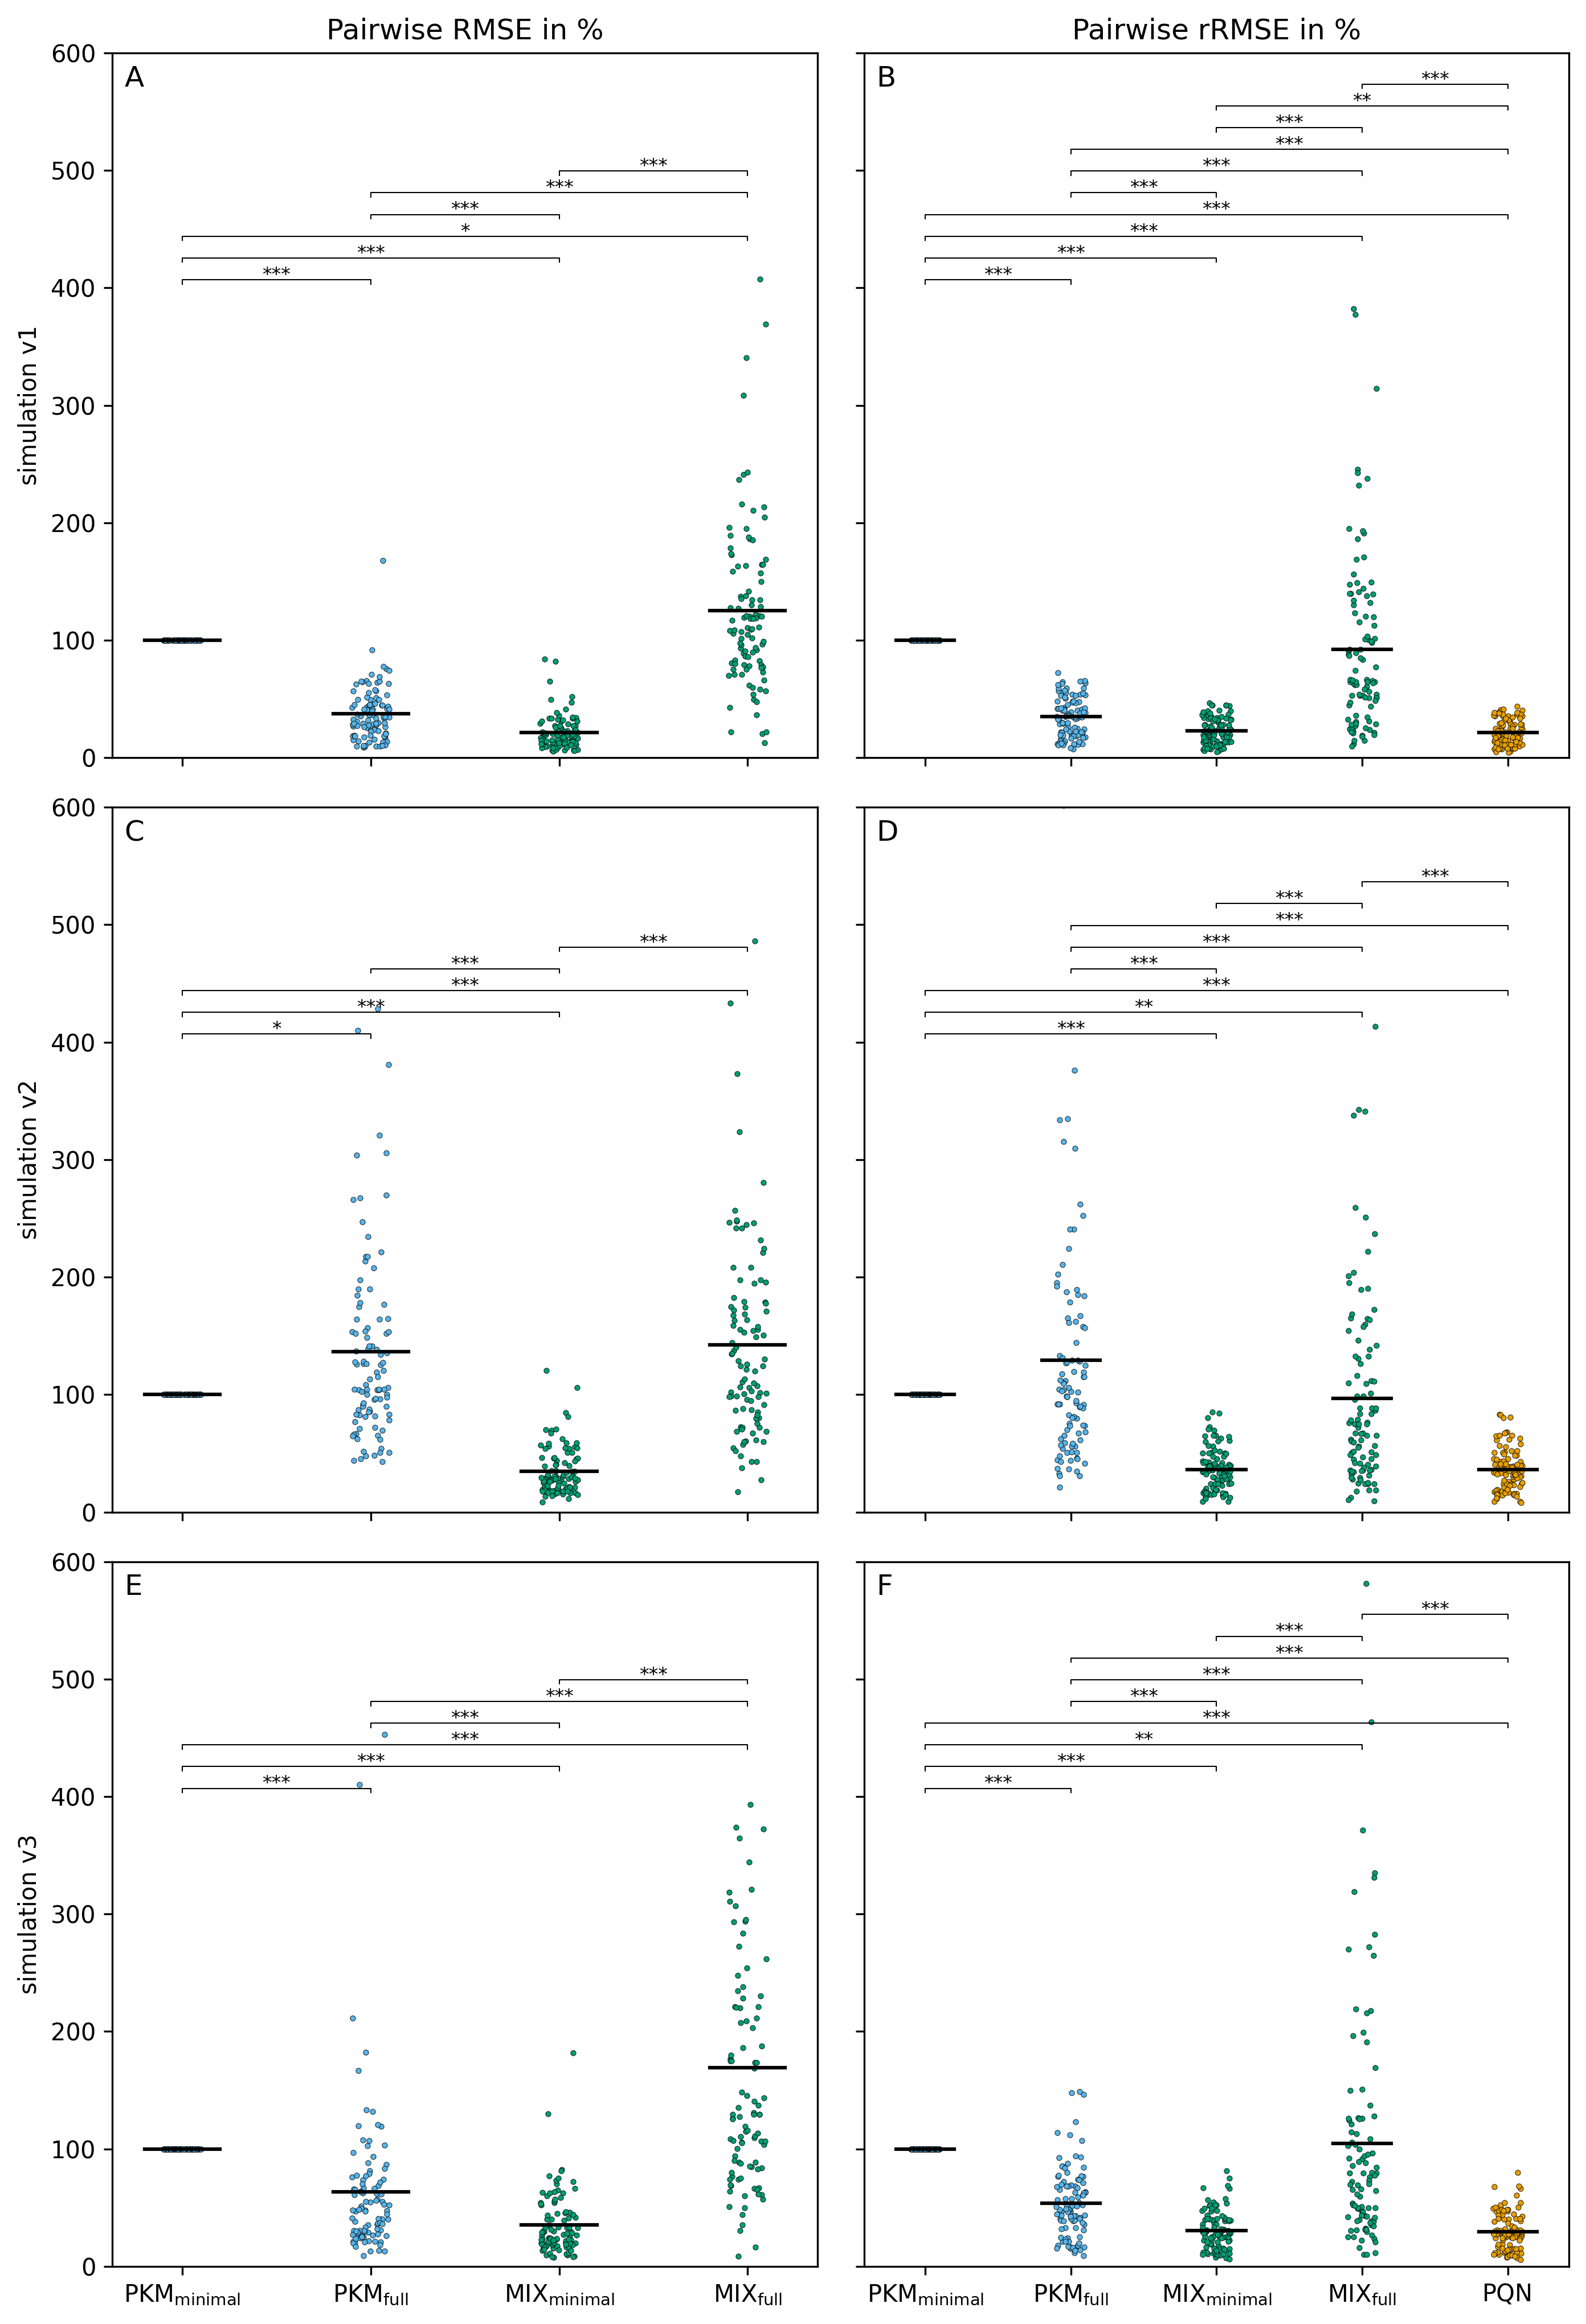

In [38]:
plt.figure(dpi=300,figsize=(9.5,13.7))
n_plot = 0
ax_list = []
y_max_list = []
for path in ['v1','v2','v3']:
    error_sigma   = .2
    n_metabolites = 60
    base          = 'synthetic_data/simulation_results'
    colors  = ['#56B4E9','#56B4E9','#009E73','#009E73','#E69F00']
    with open(f'{base}/{path}_e_{error_sigma}_n_{n_metabolites}.pkl','rb') as file:
        results_time,results_sv,results_model,raw_values = pickle.load(file)

    labels  = [r'PKM$_{\rmminimal}$',r'PKM$_{\rmfull}$',r'MIX$_{\rmminimal}$',r'MIX$_{\rmfull}$']
    rlabels  = [r'PKM$_{\rmminimal}$',r'PKM$_{\rmfull}$',r'MIX$_{\rmminimal}$',r'MIX$_{\rmfull}$','PQN']

    for diagnosis_name, labels in zip(['RMSE','rRMSE'],[labels,rlabels]):
        n_plot += 1
        # plot figure
        ax = plt.subplot(3,2,n_plot,box_aspect=1)
        ax_list.append(ax)
        if diagnosis_name == 'rRMSE':
            with_pqn = True 
        else:
            with_pqn = False
        nr,p_df = plot_pairwise_performance(diagnosis_name,results_sv,set_max=370,with_pqn=with_pqn)
        # save a csv with the p values
        p_df.T.to_csv(f'p_values_{diagnosis_name}_{path}.csv')
        plt.plot(0,0,color='b',label='PQN')
        plt.plot(0,0,color='r',label='PKM')
        plt.plot(0,0,color='y',label='MIX')
        if diagnosis_name == 'RMSE':
            plt.xticks(range(0,nr-1),labels)
        else:
            plt.xticks(range(0,nr),labels)
        plt.tight_layout()
        y_min,y_max = ax.get_ylim()
        x_min,x_max = ax.get_xlim()
        y_max_list.append(y_max)
        
ax_list[0].set_title('Pairwise RMSE in %')
ax_list[1].set_title('Pairwise rRMSE in %')
ax_list[0].set_ylabel('simulation v1')
ax_list[2].set_ylabel('simulation v2')
ax_list[4].set_ylabel('simulation v3')
y_max = np.max(y_max_list)
y_max = 600
for ax in ax_list:
    ax.set_ylim(0,y_max)
for ax in ax_list[:-2]:
    ax.set_xticklabels([])
for i in [1,3,5]:
    ax_list[i].set_yticklabels([])

import matplotlib.transforms as mtransforms
for name, ax in zip(['A','B','C','D','E','F','G'],ax_list):
#     ax.set_title(name, loc='left', pad=-200)
    trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, name, transform=ax.transAxes + trans,
            fontsize='large', verticalalignment='top', fontfamily='sans',
            bbox=dict(facecolor='w', edgecolor='none', pad=3.0))

    
plt.tight_layout()
plt.show()

## Figure S9, S10

see Figure 6

## Figure S11

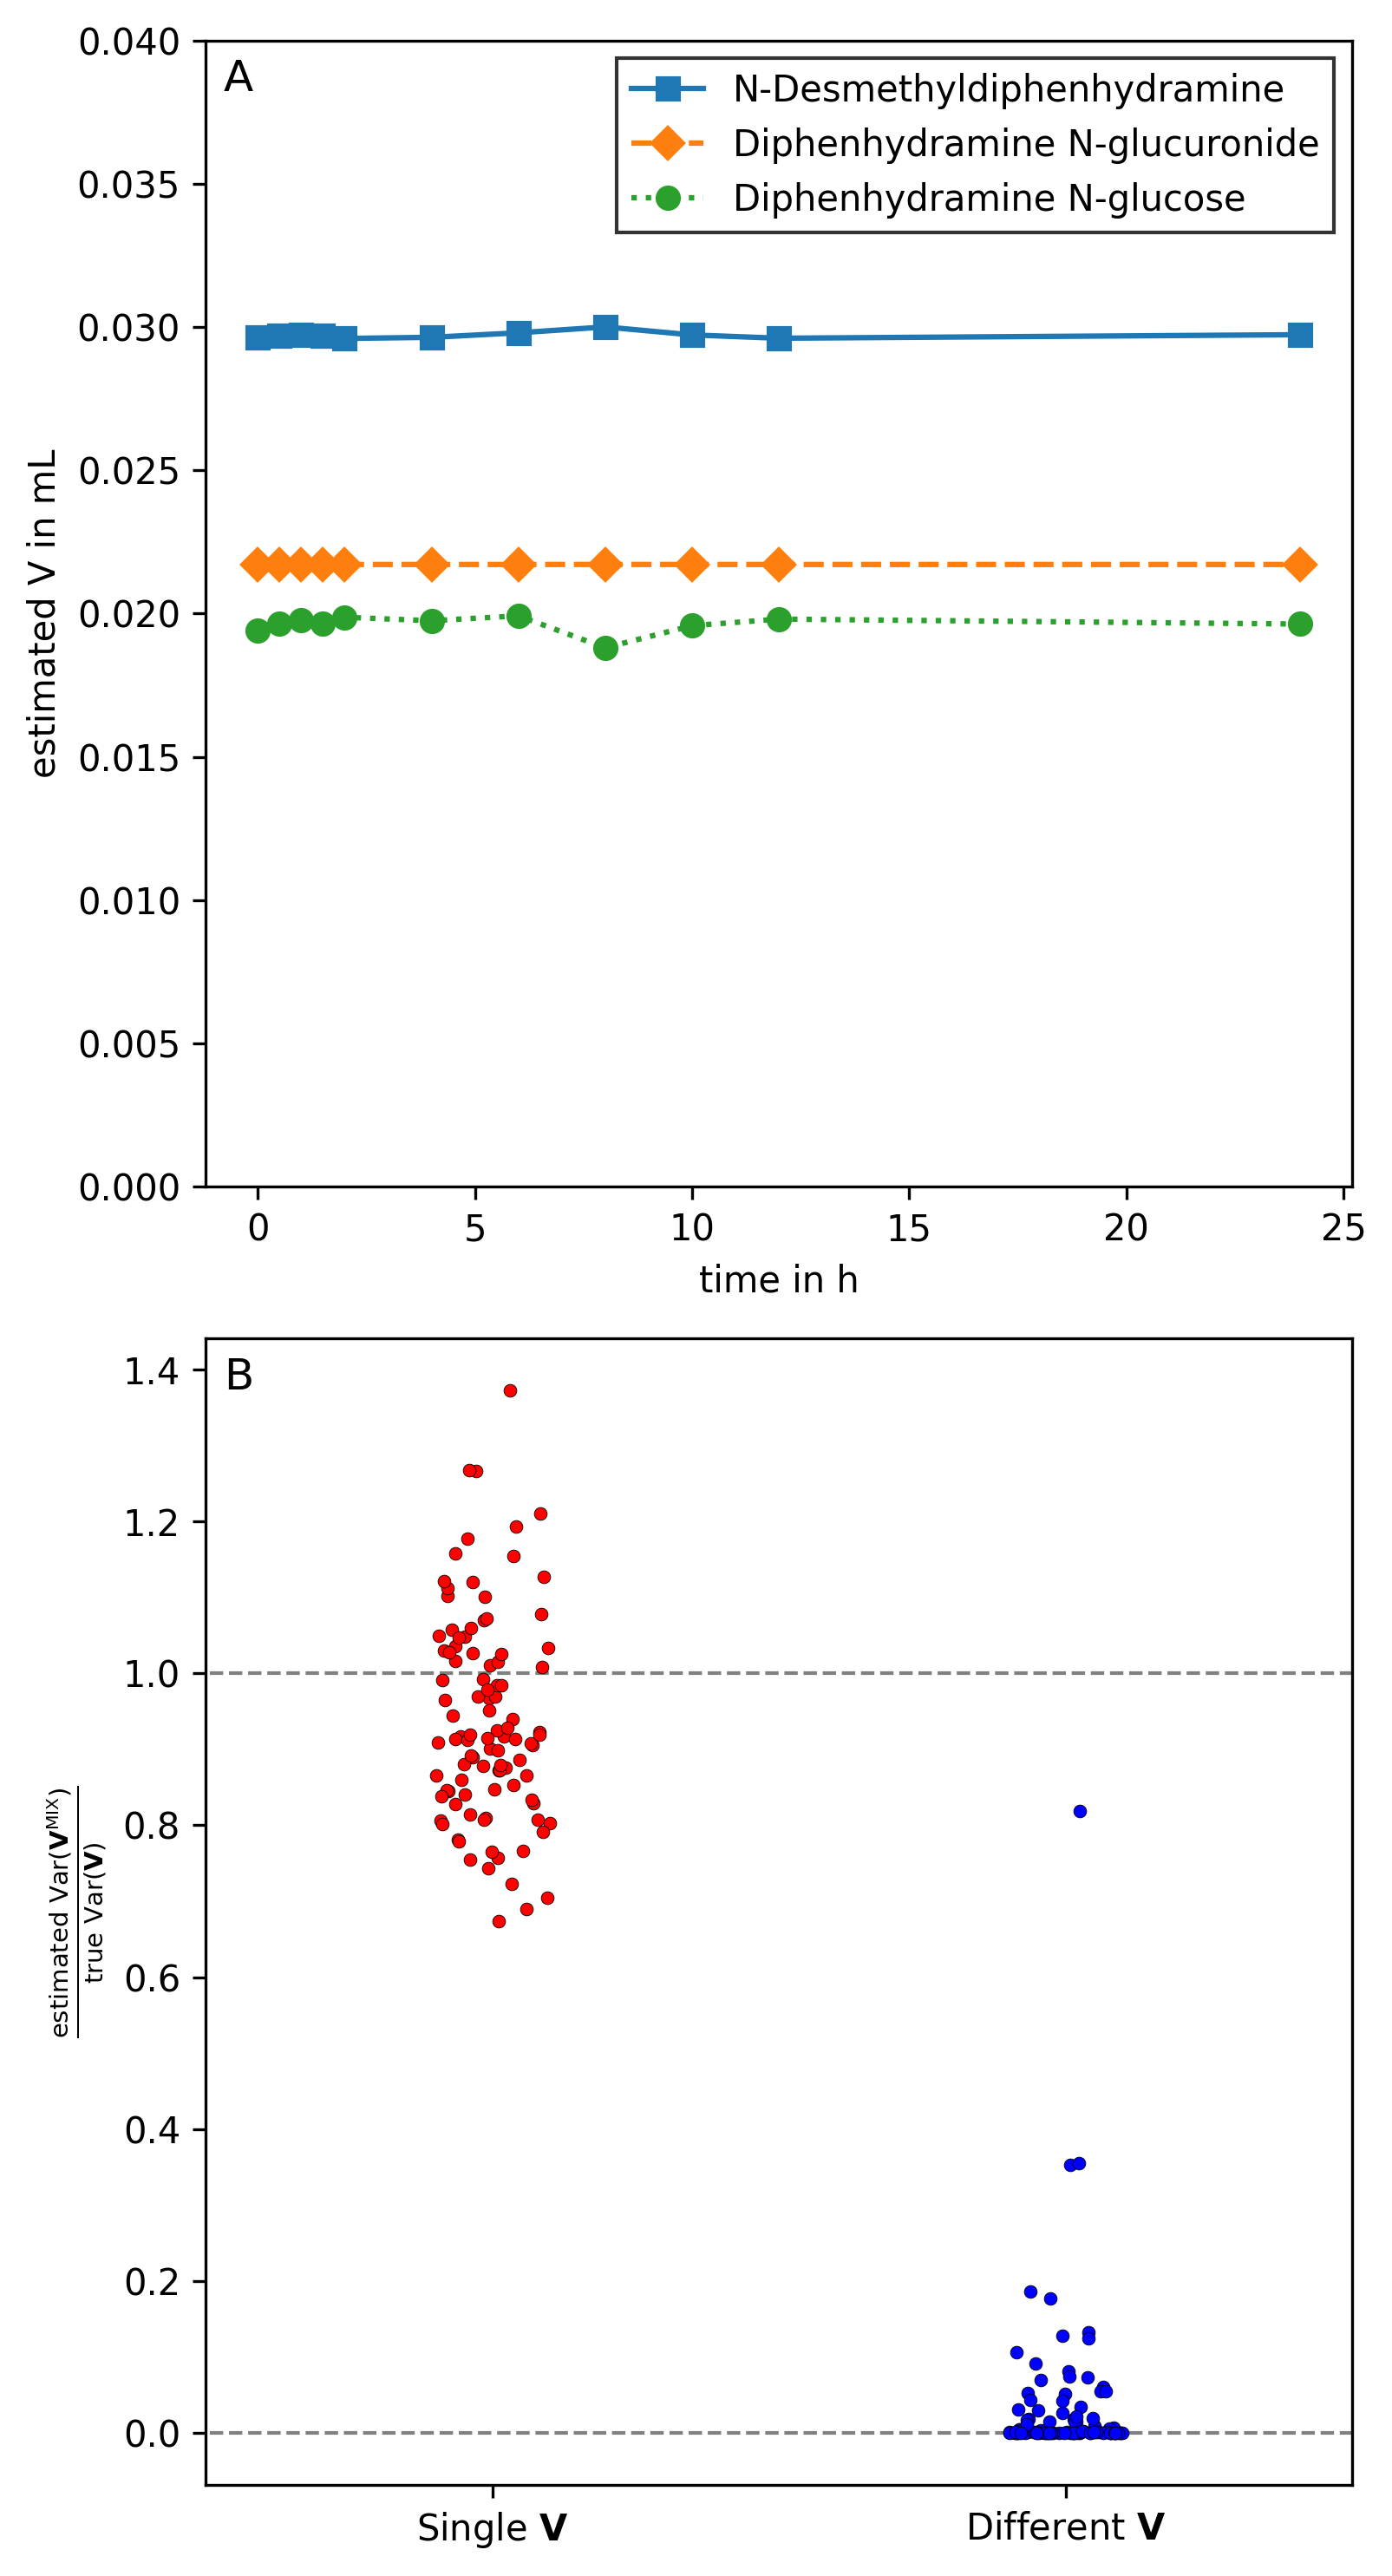

In [39]:
names = ['N-Desmethyldiphenhydramine','Diphenhydramine N-glucuronide','Diphenhydramine N-glucose']
types = ['-','--',':']
marks = ['s','D','o']

fig = plt.figure(dpi=300,figsize=(5.7,10))

ax1 = plt.subplot(211,box_aspect=1)
for nr, sub_metabolite in enumerate(results['191009'].keys()):
    tmp_model = results['191009'][sub_metabolite][0]
    plt.plot(tmp_model.time,tmp_model.get_sweat_volumes(),marker=marks[nr],label=names[nr],linestyle=types[nr])
#     break
plt.ylim(0,.04)
plt.ylabel('estimated V in mL')
plt.xlabel('time in h')
plt.legend(fancybox=False,edgecolor='k')


####### SUBPLOT 2
ax2 = plt.subplot(212,box_aspect=1)

with open(f'synthetic_data/other_results/lambda_variance_indep.pkl','rb') as file:
    results_sv, results_model, raw_values = pickle.load(file)
noise_levels = results_model[0].keys()
lambda_vals = results_model.keys()
n_replicates = len(results_sv[0][0])

raw_vars = np.array([np.var(np.concatenate([raw_values['SV1'][i],raw_values['SV2'][i]])) for i in range(len(raw_values['SV1']))])
n_noise = 0
# plt.title(r'Independent $\mathbf{V}_{\rm sweat}$ for PQN and PKM terms')

means = []
lambda_vals = [.2]
lambda_ = .2
tmp_vars = []
for idx,tmp_sv in enumerate(results_sv[lambda_][n_noise]):
    tmp_vars.append(np.var(tmp_sv)/raw_vars[idx])
location = 1
plt.scatter(np.ones(len(tmp_vars))*location+np.random.uniform(-.1,.1,len(tmp_vars)),tmp_vars,color='b',zorder=10,marker='.',s=50,edgecolor='k',linewidth=.2)
means.append(np.mean(tmp_vars))
plt.plot(lambda_vals,means,color='k')


with open(f'synthetic_data/other_results/lambda_variance_dep.pkl','rb') as file:
    results_sv, results_model, raw_values = pickle.load(file)
noise_levels = results_model[0].keys()
lambda_vals = results_model.keys()
raw_vars = np.array([np.var(i) for i in raw_values['SV1']])
means = []
lambda_vals = [.2]
lambda_ = .2
tmp_vars = []
for idx,tmp_sv in enumerate(results_sv[lambda_][n_noise]):
    tmp_vars.append(np.var(tmp_sv)/raw_vars[idx])
location = 0
plt.scatter(np.ones(len(tmp_vars))*location+np.random.uniform(-.1,.1,len(tmp_vars)),tmp_vars,color='r',zorder=10,marker='.',s=50,edgecolor='k',linewidth=.2)
means.append(np.mean(tmp_vars))
plt.plot(lambda_vals,means,color='k')




plt.plot([-1,2],[1,1],'--',linewidth=1,color='grey')
plt.plot([-1,2],[0,0],'--',linewidth=1,color='grey')
plt.xlim(-.5,1.5)
plt.xticks([0,1],[r'Single $\mathbf{V}$',r'Different $\mathbf{V}$'])

plt.ylabel(r'$\frac{\rm estimated~ Var(\mathbf{V}^{\rm MIX})}{\rm true~ Var(\mathbf{V})}$')

import matplotlib.transforms as mtransforms
for name, ax in zip(['A','B'],[ax1,ax2]):
#     ax.set_title(name, loc='left', pad=-200)
    trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, name, transform=ax.transAxes + trans,
            fontsize='large', verticalalignment='top', fontfamily='sans',
            bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
    
    
######## Concluding Commands
plt.tight_layout()
plt.show()  